# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

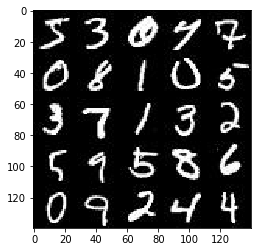

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

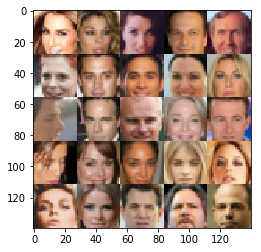

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1


/Users/sneg/tools/miniconda2/envs/deeplearning/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder (tf.float32, shape=[None, image_width, image_height, image_channels], name='input_real')
    input_z = tf.placeholder (tf.float32, shape=[None, z_dim], name='input_z')
    learning_rate = tf.placeholder (tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    keep_prob=0.7

    with tf.variable_scope ('discriminator', reuse=reuse):
        # input is 28x28x3
        h0 = tf.layers.conv2d (images, 64, 5, strides=1, use_bias=False, padding='same')
        h0 = tf.layers.batch_normalization (h0, training=True)
        h0 = tf.maximum (alpha * h0, h0)
        # 28x28x64 now
        
        h1 = tf.layers.conv2d (h0, 128, 5, strides=2, use_bias=False, padding='same')
        h1 = tf.layers.batch_normalization (h1, training=True)
        h1 = tf.maximum (alpha * h1, h1)
        # 14x14x128 now
        
        h2 = tf.layers.conv2d (h1, 512, 5, strides=2, use_bias=False, padding='same')
        h2 = tf.layers.batch_normalization (h2, training=True)
        h2 = tf.maximum (alpha * h2, h2)
        # 7x7x512 now
        
        h3 = tf.layers.conv2d (h2, 1024, 5, strides=2, use_bias=False, padding='same')
        h3 = tf.layers.batch_normalization (h3, training=True)
        h3 = tf.maximum (alpha * h3, h3)
        # 4x4x1024 now

        h3 = tf.nn.dropout (h3, keep_prob=keep_prob)

        flat = tf.reshape (h3, (-1, 4*4*1024))
        logits = tf.layers.dense (flat, 1, activation=None)
        out = tf.sigmoid (logits)

#        print ('H0: {}. '.format (h0.get_shape().as_list()),
#               'H1: {}. '.format (h1.get_shape().as_list()),
#               'H2: {}. '.format (h2.get_shape().as_list()),
#               'H3: {}. '.format (h3.get_shape().as_list()),
#               'Logits: {}. '.format (logits.get_shape().as_list()))

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    
    with tf.variable_scope ('generator', reuse=is_train==False):
        h0 = tf.layers.dense (z, 7*7*1024, activation=None)
        h0 = tf.reshape (h0, [-1, 7, 7, 1024])
        h0 = tf.layers.batch_normalization (h0, training=is_train)
        h0 = tf.maximum (alpha * h0, h0)
        # 7x7x1024 now
                
        h1 = tf.layers.conv2d_transpose (h0, 512, 5, strides=1, use_bias=False, padding='same')
        h1 = tf.layers.batch_normalization (h1, training=is_train)
        h1 = tf.maximum (alpha * h1, h1)
        # 7x7x512 now
        
        h2 = tf.layers.conv2d_transpose (h1, 256, 5, strides=2, use_bias=False, padding='same')
        h2 = tf.layers.batch_normalization (h2, training=is_train)
        h2 = tf.maximum (alpha * h2, h2)
        # 14x14x256 now
        
        h3 = tf.layers.conv2d_transpose (h2, 64, 5, strides=2, use_bias=False, padding='same')
        h3 = tf.layers.batch_normalization (h3, training=is_train)
        h3 = tf.maximum (alpha * h3, h3)
        # 28x28x64 now
        
        logits = tf.layers.conv2d_transpose (h3, out_channel_dim, 5, strides=1, use_bias=True, padding='same')
        out = tf.tanh (logits)
        # 28x28x3 now
        
#        print ('H0: {}. '.format (h0.get_shape().as_list()),
#               'H1: {}. '.format (h1.get_shape().as_list()),
#               'H2: {}. '.format (h2.get_shape().as_list()),
#               'H3: {}. '.format (h3.get_shape().as_list()),
#               'Logits: {}. '.format (logits.get_shape().as_list()))
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator (input_z, out_channel_dim, is_train=True)
    
    smooth = 0.1
    
    disc_model_real, disc_logits_real = discriminator (input_real, reuse=False)
    disc_model_fake, disc_logits_fake = discriminator (gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_real, labels=tf.ones_like(disc_logits_real) * (1 - smooth)))

    disc_loss_fake = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_fake, labels=tf.zeros_like(disc_logits_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    gen_loss = tf.reduce_mean (tf.nn.sigmoid_cross_entropy_with_logits (
        logits=disc_logits_fake, labels=tf.ones_like(disc_logits_fake)))

    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    trainable = tf.trainable_variables()
    disc_vars = [var for var in trainable if var.name.startswith ('discriminator')]
    gen_vars  = [var for var in trainable if var.name.startswith ('generator')]
    
    d_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='discriminator')
    g_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='generator')

    with tf.control_dependencies(d_update_ops):    
        disc_opt = tf.train.AdamOptimizer (learning_rate, beta1=beta1).minimize (d_loss, var_list=disc_vars)
        
    with tf.control_dependencies(g_update_ops):    
        gen_opt  = tf.train.AdamOptimizer (learning_rate, beta1=beta1).minimize (g_loss, var_list=gen_vars)
    
    return disc_opt, gen_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

In [11]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,1), nrows=1, ncols=7, sharey=True, sharex=True)
#    fig, axes = plt.subplots(figsize=(7,7), nrows=1, ncols=6, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    
    return fig, axes

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [16]:
import matplotlib.pyplot as plt
import pickle as pkl

if not os.path.exists('./checkpoints'):
    os.makedirs('./checkpoints')

def train(epoch_count, batch_size, z_dim, lr, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    out_channel_dim = data_shape[3]
    input_real, input_z, learning_rate = model_inputs (data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss (input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt (d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform (-1, 1, size=(16, z_dim))
    samples = []
    losses = []
    step = 0
       
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                batch_images = batch_images * 2
                batch_z = np.random.uniform (-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run (d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning_rate: lr})
                _ = sess.run (g_opt, feed_dict={input_z: batch_z, learning_rate: lr})
                _ = sess.run (g_opt, feed_dict={input_z: batch_z, learning_rate: lr})
                _ = sess.run (g_opt, feed_dict={input_z: batch_z, learning_rate: lr})

                if step % 10 == 0: 
                    train_loss_d = sess.run (d_loss, feed_dict={input_real: batch_images, input_z: batch_z})
                    train_loss_g = sess.run (g_loss, feed_dict={input_z: batch_z})
                    losses.append ((train_loss_d, train_loss_g))
            
                    print ("Epoch: {}/{}. ".format (epoch_i + 1, epoch_count),
                            "Step: {:4d}. ".format (step),
                            "Discriminator: {:.4f}. ".format (train_loss_d),
                            "Generator: {:.4f}.".format (train_loss_g))
            
                if step % 100 == 0:
                    gen_samples = sess.run (
                        generator (input_z, out_channel_dim, is_train=False),
                        feed_dict = {input_z: sample_z})
                    samples.append (gen_samples)
#                    _ = view_samples (len(samples) - 1, samples)
#                    plt.show()
                    show_generator_output(sess, 2, input_z, out_channel_dim, data_image_mode)

                if step % 1000 == 0:
                    show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)
        
        show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)
#        saver.save (sess, './checkpoints/generator.ckpt')
        saver.save (sess, './checkpoints/generator_celeb.ckpt')

    with open('train_losses.pkl', 'wb') as f:
        pkl.dump (losses, f)

    with open('train_samples.pkl', 'wb') as f:
        pkl.dump (samples, f)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch: 1/2.  Step:   10.  Discriminator: 8.2281.  Generator: 18.0591.
Epoch: 1/2.  Step:   20.  Discriminator: 4.2207.  Generator: 0.1174.
Epoch: 1/2.  Step:   30.  Discriminator: 4.3624.  Generator: 0.0640.
Epoch: 1/2.  Step:   40.  Discriminator: 3.9799.  Generator: 0.0446.
Epoch: 1/2.  Step:   50.  Discriminator: 3.7876.  Generator: 0.5618.
Epoch: 1/2.  Step:   60.  Discriminator: 2.6842.  Generator: 0.2254.
Epoch: 1/2.  Step:   70.  Discriminator: 2.4161.  Generator: 0.4911.
Epoch: 1/2.  Step:   80.  Discriminator: 2.1903.  Generator: 0.6575.
Epoch: 1/2.  Step:   90.  Discriminator: 2.1270.  Generator: 0.3661.
Epoch: 1/2.  Step:  100.  Discriminator: 2.3403.  Generator: 0.8736.


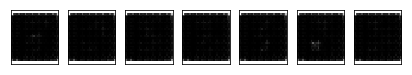

Epoch: 1/2.  Step:  110.  Discriminator: 2.4238.  Generator: 0.4361.
Epoch: 1/2.  Step:  120.  Discriminator: 2.1933.  Generator: 0.2367.
Epoch: 1/2.  Step:  130.  Discriminator: 2.1867.  Generator: 0.7734.
Epoch: 1/2.  Step:  140.  Discriminator: 2.2348.  Generator: 0.6197.
Epoch: 1/2.  Step:  150.  Discriminator: 1.7381.  Generator: 0.6555.
Epoch: 1/2.  Step:  160.  Discriminator: 2.1471.  Generator: 1.0851.
Epoch: 1/2.  Step:  170.  Discriminator: 2.4549.  Generator: 0.1594.
Epoch: 1/2.  Step:  180.  Discriminator: 2.5495.  Generator: 0.2274.
Epoch: 1/2.  Step:  190.  Discriminator: 2.3403.  Generator: 0.2126.
Epoch: 1/2.  Step:  200.  Discriminator: 1.8732.  Generator: 0.5715.


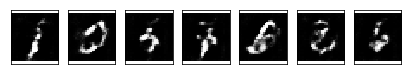

Epoch: 1/2.  Step:  210.  Discriminator: 2.1377.  Generator: 1.0707.
Epoch: 1/2.  Step:  220.  Discriminator: 1.9260.  Generator: 0.4379.
Epoch: 1/2.  Step:  230.  Discriminator: 1.8483.  Generator: 0.6037.
Epoch: 1/2.  Step:  240.  Discriminator: 1.9103.  Generator: 0.4349.
Epoch: 1/2.  Step:  250.  Discriminator: 1.5022.  Generator: 0.7530.
Epoch: 1/2.  Step:  260.  Discriminator: 1.6851.  Generator: 0.4550.
Epoch: 1/2.  Step:  270.  Discriminator: 1.8324.  Generator: 0.3639.
Epoch: 1/2.  Step:  280.  Discriminator: 1.9569.  Generator: 0.3967.
Epoch: 1/2.  Step:  290.  Discriminator: 1.7909.  Generator: 0.4366.
Epoch: 1/2.  Step:  300.  Discriminator: 2.2641.  Generator: 0.2104.


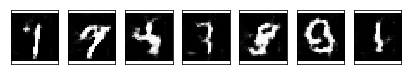

Epoch: 1/2.  Step:  310.  Discriminator: 1.8000.  Generator: 0.6864.
Epoch: 1/2.  Step:  320.  Discriminator: 2.0419.  Generator: 0.2529.
Epoch: 1/2.  Step:  330.  Discriminator: 1.9256.  Generator: 0.4971.
Epoch: 1/2.  Step:  340.  Discriminator: 1.9147.  Generator: 0.3780.
Epoch: 1/2.  Step:  350.  Discriminator: 2.2413.  Generator: 0.9700.
Epoch: 1/2.  Step:  360.  Discriminator: 1.5041.  Generator: 0.6569.
Epoch: 1/2.  Step:  370.  Discriminator: 1.8548.  Generator: 0.3158.
Epoch: 1/2.  Step:  380.  Discriminator: 1.5766.  Generator: 0.6474.
Epoch: 1/2.  Step:  390.  Discriminator: 1.6976.  Generator: 1.5273.
Epoch: 1/2.  Step:  400.  Discriminator: 1.8890.  Generator: 0.4651.


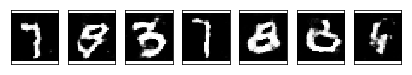

Epoch: 1/2.  Step:  410.  Discriminator: 2.8899.  Generator: 0.1131.
Epoch: 1/2.  Step:  420.  Discriminator: 1.8284.  Generator: 0.4090.
Epoch: 1/2.  Step:  430.  Discriminator: 1.6958.  Generator: 0.4402.
Epoch: 1/2.  Step:  440.  Discriminator: 2.1843.  Generator: 0.2956.
Epoch: 1/2.  Step:  450.  Discriminator: 1.6404.  Generator: 0.3814.
Epoch: 1/2.  Step:  460.  Discriminator: 1.7139.  Generator: 1.2507.
Epoch: 1/2.  Step:  470.  Discriminator: 1.5708.  Generator: 0.6482.
Epoch: 1/2.  Step:  480.  Discriminator: 1.7641.  Generator: 0.9978.
Epoch: 1/2.  Step:  490.  Discriminator: 1.8540.  Generator: 0.4539.
Epoch: 1/2.  Step:  500.  Discriminator: 2.1478.  Generator: 0.2230.


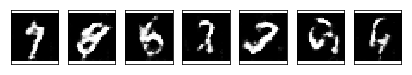

Epoch: 1/2.  Step:  510.  Discriminator: 2.0297.  Generator: 0.3177.
Epoch: 1/2.  Step:  520.  Discriminator: 1.8518.  Generator: 0.4527.
Epoch: 1/2.  Step:  530.  Discriminator: 1.5195.  Generator: 0.5598.
Epoch: 1/2.  Step:  540.  Discriminator: 1.7459.  Generator: 0.4389.
Epoch: 1/2.  Step:  550.  Discriminator: 1.5791.  Generator: 0.8711.
Epoch: 1/2.  Step:  560.  Discriminator: 1.6381.  Generator: 0.8113.
Epoch: 1/2.  Step:  570.  Discriminator: 1.9076.  Generator: 0.2394.
Epoch: 1/2.  Step:  580.  Discriminator: 1.9356.  Generator: 0.3424.
Epoch: 1/2.  Step:  590.  Discriminator: 1.2878.  Generator: 0.6498.
Epoch: 1/2.  Step:  600.  Discriminator: 2.2382.  Generator: 0.2342.


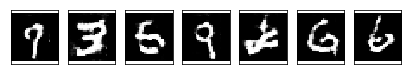

Epoch: 1/2.  Step:  610.  Discriminator: 1.6810.  Generator: 0.4901.
Epoch: 1/2.  Step:  620.  Discriminator: 1.8819.  Generator: 0.6841.
Epoch: 1/2.  Step:  630.  Discriminator: 1.6196.  Generator: 0.4676.
Epoch: 1/2.  Step:  640.  Discriminator: 1.6166.  Generator: 0.5942.
Epoch: 1/2.  Step:  650.  Discriminator: 2.1831.  Generator: 0.2553.
Epoch: 1/2.  Step:  660.  Discriminator: 1.8529.  Generator: 1.6686.
Epoch: 1/2.  Step:  670.  Discriminator: 1.6424.  Generator: 0.5363.
Epoch: 1/2.  Step:  680.  Discriminator: 1.4299.  Generator: 1.1201.
Epoch: 1/2.  Step:  690.  Discriminator: 1.7054.  Generator: 0.3078.
Epoch: 1/2.  Step:  700.  Discriminator: 1.4723.  Generator: 0.6807.


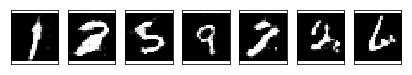

Epoch: 1/2.  Step:  710.  Discriminator: 2.4456.  Generator: 0.1913.
Epoch: 1/2.  Step:  720.  Discriminator: 1.7215.  Generator: 0.4256.
Epoch: 1/2.  Step:  730.  Discriminator: 1.8398.  Generator: 0.4316.
Epoch: 1/2.  Step:  740.  Discriminator: 1.3655.  Generator: 1.0300.
Epoch: 1/2.  Step:  750.  Discriminator: 2.8528.  Generator: 0.1214.
Epoch: 1/2.  Step:  760.  Discriminator: 1.1298.  Generator: 0.9984.
Epoch: 1/2.  Step:  770.  Discriminator: 1.4376.  Generator: 0.6290.
Epoch: 1/2.  Step:  780.  Discriminator: 1.6949.  Generator: 0.9093.
Epoch: 1/2.  Step:  790.  Discriminator: 1.5122.  Generator: 0.6869.
Epoch: 1/2.  Step:  800.  Discriminator: 1.7435.  Generator: 0.7879.


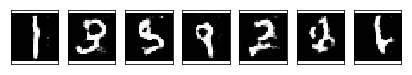

Epoch: 1/2.  Step:  810.  Discriminator: 1.4524.  Generator: 1.0848.
Epoch: 1/2.  Step:  820.  Discriminator: 1.5578.  Generator: 0.5141.
Epoch: 1/2.  Step:  830.  Discriminator: 1.2766.  Generator: 1.2432.
Epoch: 1/2.  Step:  840.  Discriminator: 1.4477.  Generator: 1.3105.
Epoch: 1/2.  Step:  850.  Discriminator: 1.7609.  Generator: 0.4346.
Epoch: 1/2.  Step:  860.  Discriminator: 1.4625.  Generator: 0.8805.
Epoch: 1/2.  Step:  870.  Discriminator: 1.5390.  Generator: 0.6509.
Epoch: 1/2.  Step:  880.  Discriminator: 1.6017.  Generator: 0.5375.
Epoch: 1/2.  Step:  890.  Discriminator: 1.8449.  Generator: 0.3059.
Epoch: 1/2.  Step:  900.  Discriminator: 1.6746.  Generator: 0.3667.


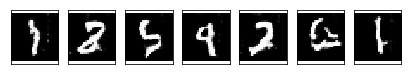

Epoch: 1/2.  Step:  910.  Discriminator: 1.7822.  Generator: 0.5710.
Epoch: 1/2.  Step:  920.  Discriminator: 1.9856.  Generator: 0.2943.
Epoch: 1/2.  Step:  930.  Discriminator: 2.1872.  Generator: 0.1511.
Epoch: 1/2.  Step:  940.  Discriminator: 1.5609.  Generator: 0.4345.
Epoch: 1/2.  Step:  950.  Discriminator: 1.6821.  Generator: 0.4805.
Epoch: 1/2.  Step:  960.  Discriminator: 1.5276.  Generator: 0.6641.
Epoch: 1/2.  Step:  970.  Discriminator: 1.6503.  Generator: 0.6190.
Epoch: 1/2.  Step:  980.  Discriminator: 1.4122.  Generator: 0.8304.
Epoch: 1/2.  Step:  990.  Discriminator: 1.6890.  Generator: 0.3799.
Epoch: 1/2.  Step: 1000.  Discriminator: 1.6948.  Generator: 0.3781.


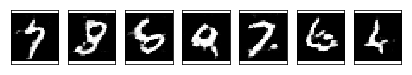

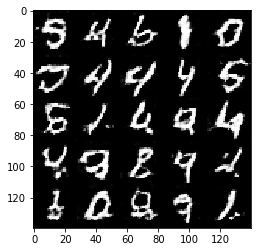

Epoch: 1/2.  Step: 1010.  Discriminator: 1.3224.  Generator: 0.8484.
Epoch: 1/2.  Step: 1020.  Discriminator: 2.5191.  Generator: 0.1595.
Epoch: 1/2.  Step: 1030.  Discriminator: 1.5433.  Generator: 0.7560.
Epoch: 1/2.  Step: 1040.  Discriminator: 1.8538.  Generator: 0.3098.
Epoch: 1/2.  Step: 1050.  Discriminator: 2.1106.  Generator: 0.2165.
Epoch: 1/2.  Step: 1060.  Discriminator: 2.3908.  Generator: 0.1824.
Epoch: 1/2.  Step: 1070.  Discriminator: 1.5232.  Generator: 0.6072.
Epoch: 1/2.  Step: 1080.  Discriminator: 1.7755.  Generator: 0.5979.
Epoch: 1/2.  Step: 1090.  Discriminator: 1.4126.  Generator: 0.6642.
Epoch: 1/2.  Step: 1100.  Discriminator: 1.4176.  Generator: 0.6320.


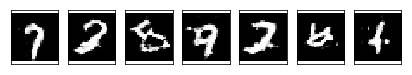

Epoch: 1/2.  Step: 1110.  Discriminator: 1.6610.  Generator: 0.3503.
Epoch: 1/2.  Step: 1120.  Discriminator: 1.7392.  Generator: 1.4169.
Epoch: 1/2.  Step: 1130.  Discriminator: 2.0399.  Generator: 0.2353.
Epoch: 1/2.  Step: 1140.  Discriminator: 1.4818.  Generator: 0.6888.
Epoch: 1/2.  Step: 1150.  Discriminator: 2.4093.  Generator: 2.1743.
Epoch: 1/2.  Step: 1160.  Discriminator: 2.1359.  Generator: 0.2829.
Epoch: 1/2.  Step: 1170.  Discriminator: 1.6535.  Generator: 0.4037.
Epoch: 1/2.  Step: 1180.  Discriminator: 1.9490.  Generator: 0.3327.
Epoch: 1/2.  Step: 1190.  Discriminator: 1.3143.  Generator: 0.6387.
Epoch: 1/2.  Step: 1200.  Discriminator: 1.4343.  Generator: 0.7026.


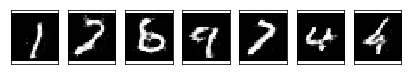

Epoch: 1/2.  Step: 1210.  Discriminator: 1.2996.  Generator: 1.0198.
Epoch: 1/2.  Step: 1220.  Discriminator: 1.9248.  Generator: 0.2921.
Epoch: 1/2.  Step: 1230.  Discriminator: 1.7110.  Generator: 0.7057.
Epoch: 1/2.  Step: 1240.  Discriminator: 1.5181.  Generator: 1.8971.
Epoch: 1/2.  Step: 1250.  Discriminator: 1.6794.  Generator: 0.4273.
Epoch: 1/2.  Step: 1260.  Discriminator: 1.6730.  Generator: 0.3719.
Epoch: 1/2.  Step: 1270.  Discriminator: 1.4600.  Generator: 0.6495.
Epoch: 1/2.  Step: 1280.  Discriminator: 2.1597.  Generator: 0.2489.
Epoch: 1/2.  Step: 1290.  Discriminator: 1.8701.  Generator: 0.3994.
Epoch: 1/2.  Step: 1300.  Discriminator: 2.1227.  Generator: 0.2677.


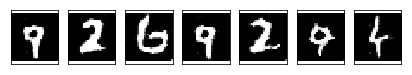

Epoch: 1/2.  Step: 1310.  Discriminator: 1.1847.  Generator: 1.0001.
Epoch: 1/2.  Step: 1320.  Discriminator: 1.5146.  Generator: 0.6691.
Epoch: 1/2.  Step: 1330.  Discriminator: 1.5242.  Generator: 0.5596.
Epoch: 1/2.  Step: 1340.  Discriminator: 1.6399.  Generator: 0.4668.
Epoch: 1/2.  Step: 1350.  Discriminator: 1.5924.  Generator: 2.1349.
Epoch: 1/2.  Step: 1360.  Discriminator: 2.2801.  Generator: 0.3840.
Epoch: 1/2.  Step: 1370.  Discriminator: 1.9954.  Generator: 0.3311.
Epoch: 1/2.  Step: 1380.  Discriminator: 1.3200.  Generator: 0.6736.
Epoch: 1/2.  Step: 1390.  Discriminator: 1.1888.  Generator: 0.8121.
Epoch: 1/2.  Step: 1400.  Discriminator: 1.3432.  Generator: 0.7359.


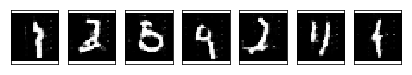

Epoch: 1/2.  Step: 1410.  Discriminator: 1.4493.  Generator: 0.9787.
Epoch: 1/2.  Step: 1420.  Discriminator: 2.4560.  Generator: 0.1733.
Epoch: 1/2.  Step: 1430.  Discriminator: 1.5692.  Generator: 1.3378.
Epoch: 1/2.  Step: 1440.  Discriminator: 1.9738.  Generator: 0.3517.
Epoch: 1/2.  Step: 1450.  Discriminator: 2.6172.  Generator: 0.1621.
Epoch: 1/2.  Step: 1460.  Discriminator: 1.4381.  Generator: 1.2409.
Epoch: 1/2.  Step: 1470.  Discriminator: 2.0619.  Generator: 0.2381.
Epoch: 1/2.  Step: 1480.  Discriminator: 1.5719.  Generator: 0.4924.
Epoch: 1/2.  Step: 1490.  Discriminator: 2.1800.  Generator: 0.3291.
Epoch: 1/2.  Step: 1500.  Discriminator: 1.7698.  Generator: 0.4007.


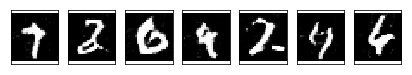

Epoch: 1/2.  Step: 1510.  Discriminator: 1.8414.  Generator: 0.9178.
Epoch: 1/2.  Step: 1520.  Discriminator: 1.3899.  Generator: 0.7709.
Epoch: 1/2.  Step: 1530.  Discriminator: 2.5097.  Generator: 0.1653.
Epoch: 1/2.  Step: 1540.  Discriminator: 1.8934.  Generator: 0.3404.
Epoch: 1/2.  Step: 1550.  Discriminator: 1.4539.  Generator: 0.5209.
Epoch: 1/2.  Step: 1560.  Discriminator: 1.3594.  Generator: 0.8442.
Epoch: 1/2.  Step: 1570.  Discriminator: 2.0225.  Generator: 0.2784.
Epoch: 1/2.  Step: 1580.  Discriminator: 2.0117.  Generator: 0.2775.
Epoch: 1/2.  Step: 1590.  Discriminator: 1.3275.  Generator: 0.5934.
Epoch: 1/2.  Step: 1600.  Discriminator: 1.6597.  Generator: 0.4801.


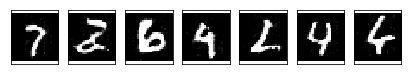

Epoch: 1/2.  Step: 1610.  Discriminator: 1.4104.  Generator: 0.5649.
Epoch: 1/2.  Step: 1620.  Discriminator: 2.2056.  Generator: 0.2713.
Epoch: 1/2.  Step: 1630.  Discriminator: 1.8042.  Generator: 0.5043.
Epoch: 1/2.  Step: 1640.  Discriminator: 1.5327.  Generator: 0.5983.
Epoch: 1/2.  Step: 1650.  Discriminator: 1.2716.  Generator: 1.0998.
Epoch: 1/2.  Step: 1660.  Discriminator: 1.8158.  Generator: 0.3936.
Epoch: 1/2.  Step: 1670.  Discriminator: 1.8577.  Generator: 0.3965.
Epoch: 1/2.  Step: 1680.  Discriminator: 1.1408.  Generator: 0.8461.
Epoch: 1/2.  Step: 1690.  Discriminator: 1.6425.  Generator: 0.5451.
Epoch: 1/2.  Step: 1700.  Discriminator: 1.7128.  Generator: 0.4896.


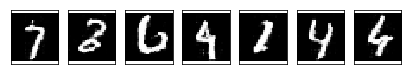

Epoch: 1/2.  Step: 1710.  Discriminator: 1.6666.  Generator: 0.4806.
Epoch: 1/2.  Step: 1720.  Discriminator: 1.6772.  Generator: 0.4424.
Epoch: 1/2.  Step: 1730.  Discriminator: 1.5451.  Generator: 0.4997.
Epoch: 1/2.  Step: 1740.  Discriminator: 1.6313.  Generator: 0.5599.
Epoch: 1/2.  Step: 1750.  Discriminator: 1.5181.  Generator: 0.4835.
Epoch: 1/2.  Step: 1760.  Discriminator: 1.6437.  Generator: 0.4212.
Epoch: 1/2.  Step: 1770.  Discriminator: 2.6387.  Generator: 0.1414.
Epoch: 1/2.  Step: 1780.  Discriminator: 1.4196.  Generator: 0.7926.
Epoch: 1/2.  Step: 1790.  Discriminator: 2.0095.  Generator: 0.2837.
Epoch: 1/2.  Step: 1800.  Discriminator: 1.4651.  Generator: 0.5323.


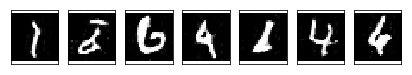

Epoch: 1/2.  Step: 1810.  Discriminator: 1.5784.  Generator: 0.5455.
Epoch: 1/2.  Step: 1820.  Discriminator: 1.9006.  Generator: 0.2834.
Epoch: 1/2.  Step: 1830.  Discriminator: 1.8050.  Generator: 0.3130.
Epoch: 1/2.  Step: 1840.  Discriminator: 1.4549.  Generator: 0.5506.
Epoch: 1/2.  Step: 1850.  Discriminator: 1.9768.  Generator: 0.3222.
Epoch: 1/2.  Step: 1860.  Discriminator: 2.7482.  Generator: 0.1227.
Epoch: 1/2.  Step: 1870.  Discriminator: 2.1224.  Generator: 0.3062.
Epoch: 2/2.  Step: 1880.  Discriminator: 1.8866.  Generator: 0.4636.
Epoch: 2/2.  Step: 1890.  Discriminator: 1.2996.  Generator: 0.8778.
Epoch: 2/2.  Step: 1900.  Discriminator: 1.3423.  Generator: 1.0577.


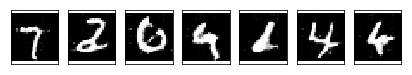

Epoch: 2/2.  Step: 1910.  Discriminator: 1.1762.  Generator: 1.0031.
Epoch: 2/2.  Step: 1920.  Discriminator: 1.4627.  Generator: 0.4840.
Epoch: 2/2.  Step: 1930.  Discriminator: 1.7610.  Generator: 0.5891.
Epoch: 2/2.  Step: 1940.  Discriminator: 1.5629.  Generator: 0.8476.
Epoch: 2/2.  Step: 1950.  Discriminator: 1.5032.  Generator: 1.4095.
Epoch: 2/2.  Step: 1960.  Discriminator: 1.7800.  Generator: 0.2883.
Epoch: 2/2.  Step: 1970.  Discriminator: 2.8916.  Generator: 0.1266.
Epoch: 2/2.  Step: 1980.  Discriminator: 1.9934.  Generator: 0.6851.
Epoch: 2/2.  Step: 1990.  Discriminator: 1.3913.  Generator: 0.5012.
Epoch: 2/2.  Step: 2000.  Discriminator: 1.2392.  Generator: 1.5643.


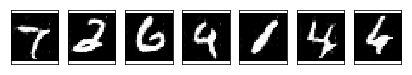

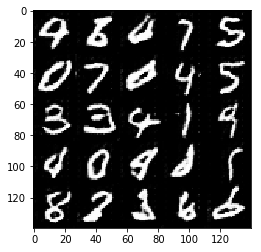

Epoch: 2/2.  Step: 2010.  Discriminator: 1.6687.  Generator: 0.5042.
Epoch: 2/2.  Step: 2020.  Discriminator: 1.5535.  Generator: 0.4609.
Epoch: 2/2.  Step: 2030.  Discriminator: 1.5434.  Generator: 0.4989.
Epoch: 2/2.  Step: 2040.  Discriminator: 1.6832.  Generator: 0.3926.
Epoch: 2/2.  Step: 2050.  Discriminator: 2.2411.  Generator: 0.2482.
Epoch: 2/2.  Step: 2060.  Discriminator: 1.8131.  Generator: 0.2997.
Epoch: 2/2.  Step: 2070.  Discriminator: 1.8890.  Generator: 0.6951.
Epoch: 2/2.  Step: 2080.  Discriminator: 2.5895.  Generator: 0.1552.
Epoch: 2/2.  Step: 2090.  Discriminator: 1.5002.  Generator: 0.6080.
Epoch: 2/2.  Step: 2100.  Discriminator: 1.2742.  Generator: 1.0315.


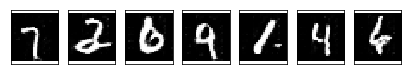

Epoch: 2/2.  Step: 2110.  Discriminator: 1.7258.  Generator: 0.5392.
Epoch: 2/2.  Step: 2120.  Discriminator: 1.6948.  Generator: 0.5101.
Epoch: 2/2.  Step: 2130.  Discriminator: 2.1166.  Generator: 0.2194.
Epoch: 2/2.  Step: 2140.  Discriminator: 1.7484.  Generator: 0.5464.
Epoch: 2/2.  Step: 2150.  Discriminator: 2.2233.  Generator: 0.2518.
Epoch: 2/2.  Step: 2160.  Discriminator: 2.2995.  Generator: 0.1823.
Epoch: 2/2.  Step: 2170.  Discriminator: 2.4730.  Generator: 0.1914.
Epoch: 2/2.  Step: 2180.  Discriminator: 1.7384.  Generator: 0.9204.
Epoch: 2/2.  Step: 2190.  Discriminator: 1.8236.  Generator: 0.3448.
Epoch: 2/2.  Step: 2200.  Discriminator: 1.4046.  Generator: 0.5199.


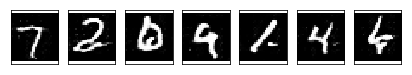

Epoch: 2/2.  Step: 2210.  Discriminator: 1.6856.  Generator: 0.3747.
Epoch: 2/2.  Step: 2220.  Discriminator: 1.6297.  Generator: 0.4399.
Epoch: 2/2.  Step: 2230.  Discriminator: 1.5442.  Generator: 0.6386.
Epoch: 2/2.  Step: 2240.  Discriminator: 1.7455.  Generator: 0.4266.
Epoch: 2/2.  Step: 2250.  Discriminator: 1.9318.  Generator: 0.3603.
Epoch: 2/2.  Step: 2260.  Discriminator: 1.5156.  Generator: 0.4933.
Epoch: 2/2.  Step: 2270.  Discriminator: 3.0664.  Generator: 0.1249.
Epoch: 2/2.  Step: 2280.  Discriminator: 2.2357.  Generator: 0.2242.
Epoch: 2/2.  Step: 2290.  Discriminator: 1.8841.  Generator: 0.3055.
Epoch: 2/2.  Step: 2300.  Discriminator: 1.4599.  Generator: 0.5769.


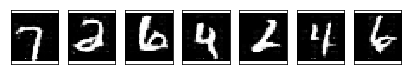

Epoch: 2/2.  Step: 2310.  Discriminator: 1.2160.  Generator: 1.1046.
Epoch: 2/2.  Step: 2320.  Discriminator: 1.8740.  Generator: 0.3133.
Epoch: 2/2.  Step: 2330.  Discriminator: 1.7599.  Generator: 0.4041.
Epoch: 2/2.  Step: 2340.  Discriminator: 2.6169.  Generator: 0.1753.
Epoch: 2/2.  Step: 2350.  Discriminator: 1.3072.  Generator: 0.6869.
Epoch: 2/2.  Step: 2360.  Discriminator: 1.6687.  Generator: 0.7003.
Epoch: 2/2.  Step: 2370.  Discriminator: 1.5791.  Generator: 0.5958.
Epoch: 2/2.  Step: 2380.  Discriminator: 1.3455.  Generator: 0.7658.
Epoch: 2/2.  Step: 2390.  Discriminator: 1.4491.  Generator: 0.4924.
Epoch: 2/2.  Step: 2400.  Discriminator: 1.8484.  Generator: 0.3863.


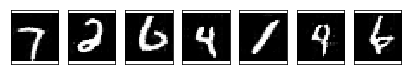

Epoch: 2/2.  Step: 2410.  Discriminator: 1.3718.  Generator: 0.6967.
Epoch: 2/2.  Step: 2420.  Discriminator: 1.4479.  Generator: 0.6232.
Epoch: 2/2.  Step: 2430.  Discriminator: 2.2418.  Generator: 0.1825.
Epoch: 2/2.  Step: 2440.  Discriminator: 1.4817.  Generator: 1.5421.
Epoch: 2/2.  Step: 2450.  Discriminator: 1.9982.  Generator: 0.3096.
Epoch: 2/2.  Step: 2460.  Discriminator: 1.5265.  Generator: 0.6055.
Epoch: 2/2.  Step: 2470.  Discriminator: 1.8822.  Generator: 0.3624.
Epoch: 2/2.  Step: 2480.  Discriminator: 1.3316.  Generator: 0.7846.
Epoch: 2/2.  Step: 2490.  Discriminator: 1.7428.  Generator: 0.3781.
Epoch: 2/2.  Step: 2500.  Discriminator: 2.1992.  Generator: 0.2306.


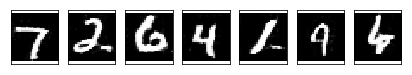

Epoch: 2/2.  Step: 2510.  Discriminator: 1.5952.  Generator: 0.7587.
Epoch: 2/2.  Step: 2520.  Discriminator: 1.5649.  Generator: 0.4644.
Epoch: 2/2.  Step: 2530.  Discriminator: 1.8123.  Generator: 0.4002.
Epoch: 2/2.  Step: 2540.  Discriminator: 1.7536.  Generator: 0.5331.
Epoch: 2/2.  Step: 2550.  Discriminator: 2.0525.  Generator: 0.3416.
Epoch: 2/2.  Step: 2560.  Discriminator: 1.8798.  Generator: 0.2609.
Epoch: 2/2.  Step: 2570.  Discriminator: 1.4676.  Generator: 0.5095.
Epoch: 2/2.  Step: 2580.  Discriminator: 1.3828.  Generator: 0.8169.
Epoch: 2/2.  Step: 2590.  Discriminator: 1.3700.  Generator: 0.7870.
Epoch: 2/2.  Step: 2600.  Discriminator: 1.3822.  Generator: 0.6925.


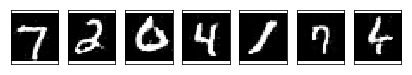

Epoch: 2/2.  Step: 2610.  Discriminator: 2.0039.  Generator: 0.2868.
Epoch: 2/2.  Step: 2620.  Discriminator: 2.1460.  Generator: 0.2636.
Epoch: 2/2.  Step: 2630.  Discriminator: 2.0256.  Generator: 0.2568.
Epoch: 2/2.  Step: 2640.  Discriminator: 2.1897.  Generator: 0.3310.
Epoch: 2/2.  Step: 2650.  Discriminator: 2.0919.  Generator: 0.2769.
Epoch: 2/2.  Step: 2660.  Discriminator: 1.6280.  Generator: 0.6502.
Epoch: 2/2.  Step: 2670.  Discriminator: 1.2297.  Generator: 0.7400.
Epoch: 2/2.  Step: 2680.  Discriminator: 1.2141.  Generator: 0.7636.
Epoch: 2/2.  Step: 2690.  Discriminator: 2.3021.  Generator: 0.2412.
Epoch: 2/2.  Step: 2700.  Discriminator: 3.0208.  Generator: 0.1193.


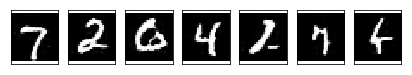

Epoch: 2/2.  Step: 2710.  Discriminator: 1.4736.  Generator: 0.7343.
Epoch: 2/2.  Step: 2720.  Discriminator: 1.6563.  Generator: 0.4490.
Epoch: 2/2.  Step: 2730.  Discriminator: 2.4199.  Generator: 0.2728.
Epoch: 2/2.  Step: 2740.  Discriminator: 1.2355.  Generator: 0.8654.
Epoch: 2/2.  Step: 2750.  Discriminator: 2.0034.  Generator: 0.2836.
Epoch: 2/2.  Step: 2760.  Discriminator: 1.6065.  Generator: 0.6031.
Epoch: 2/2.  Step: 2770.  Discriminator: 1.4773.  Generator: 0.9485.
Epoch: 2/2.  Step: 2780.  Discriminator: 1.4348.  Generator: 0.7987.
Epoch: 2/2.  Step: 2790.  Discriminator: 1.4921.  Generator: 0.6830.
Epoch: 2/2.  Step: 2800.  Discriminator: 1.8589.  Generator: 0.3044.


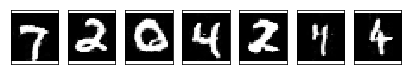

Epoch: 2/2.  Step: 2810.  Discriminator: 1.5718.  Generator: 0.6268.
Epoch: 2/2.  Step: 2820.  Discriminator: 1.2339.  Generator: 0.8531.
Epoch: 2/2.  Step: 2830.  Discriminator: 1.2194.  Generator: 0.5172.
Epoch: 2/2.  Step: 2840.  Discriminator: 1.2186.  Generator: 1.0206.
Epoch: 2/2.  Step: 2850.  Discriminator: 2.6437.  Generator: 0.1627.
Epoch: 2/2.  Step: 2860.  Discriminator: 1.8819.  Generator: 0.9652.
Epoch: 2/2.  Step: 2870.  Discriminator: 1.4978.  Generator: 0.6330.
Epoch: 2/2.  Step: 2880.  Discriminator: 0.9821.  Generator: 1.0274.
Epoch: 2/2.  Step: 2890.  Discriminator: 1.6183.  Generator: 0.4641.
Epoch: 2/2.  Step: 2900.  Discriminator: 1.6598.  Generator: 0.6260.


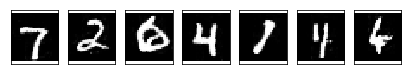

Epoch: 2/2.  Step: 2910.  Discriminator: 2.0245.  Generator: 0.2816.
Epoch: 2/2.  Step: 2920.  Discriminator: 1.7668.  Generator: 0.4800.
Epoch: 2/2.  Step: 2930.  Discriminator: 1.1381.  Generator: 0.8350.
Epoch: 2/2.  Step: 2940.  Discriminator: 2.4538.  Generator: 0.2224.
Epoch: 2/2.  Step: 2950.  Discriminator: 1.6473.  Generator: 0.4585.
Epoch: 2/2.  Step: 2960.  Discriminator: 2.3807.  Generator: 0.2013.
Epoch: 2/2.  Step: 2970.  Discriminator: 2.0672.  Generator: 0.3256.
Epoch: 2/2.  Step: 2980.  Discriminator: 2.1669.  Generator: 0.2285.
Epoch: 2/2.  Step: 2990.  Discriminator: 1.4213.  Generator: 0.8857.
Epoch: 2/2.  Step: 3000.  Discriminator: 1.3420.  Generator: 0.9783.


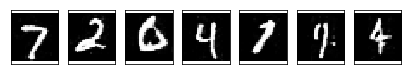

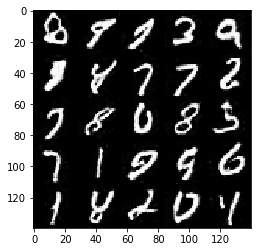

Epoch: 2/2.  Step: 3010.  Discriminator: 1.8695.  Generator: 0.3779.
Epoch: 2/2.  Step: 3020.  Discriminator: 1.5975.  Generator: 0.8469.
Epoch: 2/2.  Step: 3030.  Discriminator: 1.6139.  Generator: 0.7787.
Epoch: 2/2.  Step: 3040.  Discriminator: 1.4545.  Generator: 0.5619.
Epoch: 2/2.  Step: 3050.  Discriminator: 1.7694.  Generator: 0.4536.
Epoch: 2/2.  Step: 3060.  Discriminator: 1.5147.  Generator: 0.7046.
Epoch: 2/2.  Step: 3070.  Discriminator: 2.0177.  Generator: 0.2476.
Epoch: 2/2.  Step: 3080.  Discriminator: 1.8408.  Generator: 0.4707.
Epoch: 2/2.  Step: 3090.  Discriminator: 1.7168.  Generator: 0.5454.
Epoch: 2/2.  Step: 3100.  Discriminator: 1.9653.  Generator: 0.3677.


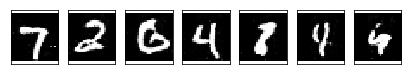

Epoch: 2/2.  Step: 3110.  Discriminator: 1.7718.  Generator: 0.4857.
Epoch: 2/2.  Step: 3120.  Discriminator: 1.1888.  Generator: 0.8510.
Epoch: 2/2.  Step: 3130.  Discriminator: 2.2372.  Generator: 0.2144.
Epoch: 2/2.  Step: 3140.  Discriminator: 2.0328.  Generator: 0.2303.
Epoch: 2/2.  Step: 3150.  Discriminator: 1.1840.  Generator: 1.2010.
Epoch: 2/2.  Step: 3160.  Discriminator: 1.8529.  Generator: 0.3773.
Epoch: 2/2.  Step: 3170.  Discriminator: 2.3340.  Generator: 0.2706.
Epoch: 2/2.  Step: 3180.  Discriminator: 1.6495.  Generator: 0.5063.
Epoch: 2/2.  Step: 3190.  Discriminator: 2.0550.  Generator: 0.4581.
Epoch: 2/2.  Step: 3200.  Discriminator: 1.6208.  Generator: 0.5718.


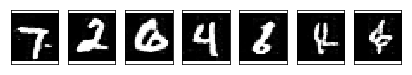

Epoch: 2/2.  Step: 3210.  Discriminator: 1.5208.  Generator: 0.6476.
Epoch: 2/2.  Step: 3220.  Discriminator: 1.7506.  Generator: 0.4125.
Epoch: 2/2.  Step: 3230.  Discriminator: 2.1634.  Generator: 0.2386.
Epoch: 2/2.  Step: 3240.  Discriminator: 1.7084.  Generator: 0.7637.
Epoch: 2/2.  Step: 3250.  Discriminator: 1.4541.  Generator: 0.6702.
Epoch: 2/2.  Step: 3260.  Discriminator: 1.9296.  Generator: 0.4124.
Epoch: 2/2.  Step: 3270.  Discriminator: 2.3077.  Generator: 0.2584.
Epoch: 2/2.  Step: 3280.  Discriminator: 2.0272.  Generator: 1.7577.
Epoch: 2/2.  Step: 3290.  Discriminator: 1.6679.  Generator: 0.5713.
Epoch: 2/2.  Step: 3300.  Discriminator: 1.5044.  Generator: 0.8289.


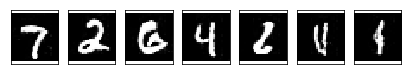

Epoch: 2/2.  Step: 3310.  Discriminator: 1.3482.  Generator: 0.6133.
Epoch: 2/2.  Step: 3320.  Discriminator: 1.2423.  Generator: 0.7529.
Epoch: 2/2.  Step: 3330.  Discriminator: 1.5582.  Generator: 1.0688.
Epoch: 2/2.  Step: 3340.  Discriminator: 1.3078.  Generator: 0.6273.
Epoch: 2/2.  Step: 3350.  Discriminator: 1.6345.  Generator: 0.3654.
Epoch: 2/2.  Step: 3360.  Discriminator: 1.4390.  Generator: 0.6392.
Epoch: 2/2.  Step: 3370.  Discriminator: 1.8283.  Generator: 0.4524.
Epoch: 2/2.  Step: 3380.  Discriminator: 1.8375.  Generator: 0.3506.
Epoch: 2/2.  Step: 3390.  Discriminator: 1.4872.  Generator: 0.4958.
Epoch: 2/2.  Step: 3400.  Discriminator: 1.3355.  Generator: 0.6636.


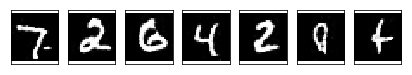

Epoch: 2/2.  Step: 3410.  Discriminator: 2.1759.  Generator: 0.2136.
Epoch: 2/2.  Step: 3420.  Discriminator: 1.4197.  Generator: 0.6129.
Epoch: 2/2.  Step: 3430.  Discriminator: 1.9957.  Generator: 0.2729.
Epoch: 2/2.  Step: 3440.  Discriminator: 1.5730.  Generator: 0.4661.
Epoch: 2/2.  Step: 3450.  Discriminator: 2.3711.  Generator: 0.1670.
Epoch: 2/2.  Step: 3460.  Discriminator: 1.7732.  Generator: 0.4943.
Epoch: 2/2.  Step: 3470.  Discriminator: 2.1747.  Generator: 0.2598.
Epoch: 2/2.  Step: 3480.  Discriminator: 1.2843.  Generator: 0.7591.
Epoch: 2/2.  Step: 3490.  Discriminator: 1.9606.  Generator: 0.4036.
Epoch: 2/2.  Step: 3500.  Discriminator: 1.4397.  Generator: 0.5106.


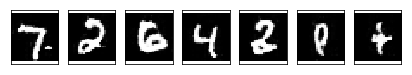

Epoch: 2/2.  Step: 3510.  Discriminator: 1.9634.  Generator: 0.3625.
Epoch: 2/2.  Step: 3520.  Discriminator: 1.4139.  Generator: 0.8258.
Epoch: 2/2.  Step: 3530.  Discriminator: 1.4786.  Generator: 1.5392.
Epoch: 2/2.  Step: 3540.  Discriminator: 1.1096.  Generator: 0.8180.
Epoch: 2/2.  Step: 3550.  Discriminator: 1.5150.  Generator: 0.5128.
Epoch: 2/2.  Step: 3560.  Discriminator: 1.4984.  Generator: 0.7297.
Epoch: 2/2.  Step: 3570.  Discriminator: 2.2168.  Generator: 0.2424.
Epoch: 2/2.  Step: 3580.  Discriminator: 1.9849.  Generator: 0.3372.
Epoch: 2/2.  Step: 3590.  Discriminator: 2.8342.  Generator: 0.2627.
Epoch: 2/2.  Step: 3600.  Discriminator: 1.2110.  Generator: 0.7453.


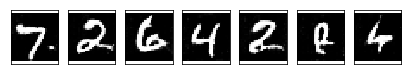

Epoch: 2/2.  Step: 3610.  Discriminator: 1.0195.  Generator: 1.1082.
Epoch: 2/2.  Step: 3620.  Discriminator: 1.5328.  Generator: 0.4952.
Epoch: 2/2.  Step: 3630.  Discriminator: 1.4338.  Generator: 0.6915.
Epoch: 2/2.  Step: 3640.  Discriminator: 1.8725.  Generator: 0.3479.
Epoch: 2/2.  Step: 3650.  Discriminator: 1.1639.  Generator: 1.0157.
Epoch: 2/2.  Step: 3660.  Discriminator: 2.8782.  Generator: 0.1438.
Epoch: 2/2.  Step: 3670.  Discriminator: 1.5317.  Generator: 0.4947.
Epoch: 2/2.  Step: 3680.  Discriminator: 2.0914.  Generator: 0.3487.
Epoch: 2/2.  Step: 3690.  Discriminator: 1.5426.  Generator: 0.4287.
Epoch: 2/2.  Step: 3700.  Discriminator: 1.9455.  Generator: 0.3866.


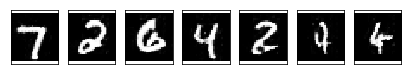

Epoch: 2/2.  Step: 3710.  Discriminator: 1.2573.  Generator: 0.8309.
Epoch: 2/2.  Step: 3720.  Discriminator: 2.0268.  Generator: 0.3900.
Epoch: 2/2.  Step: 3730.  Discriminator: 1.3928.  Generator: 0.6561.
Epoch: 2/2.  Step: 3740.  Discriminator: 1.9285.  Generator: 0.3845.
Epoch: 2/2.  Step: 3750.  Discriminator: 1.2061.  Generator: 0.8912.


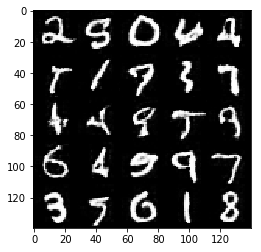

In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

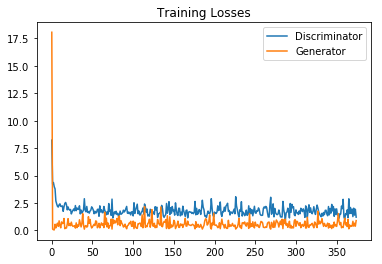

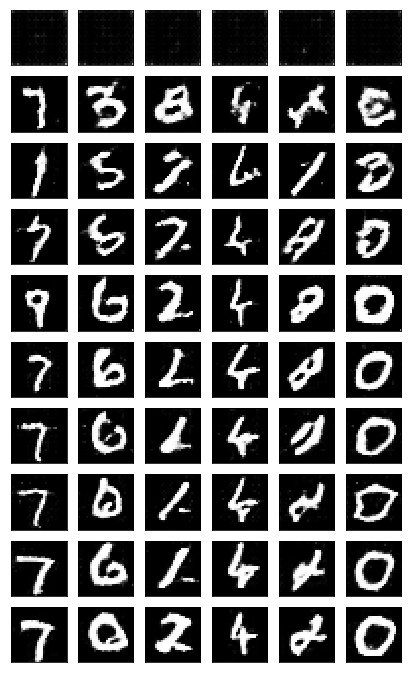

In [14]:
def plot_losses():
    with open ('train_losses.pkl', 'rb') as f:
        losses = pkl.load (f)

    fig, ax = plt.subplots()
    losses = np.array(losses)
    plt.plot(losses.T[0], label='Discriminator')
    plt.plot(losses.T[1], label='Generator')
    plt.title("Training Losses")
    plt.legend()
    
def show_samples():
    with open ('train_samples.pkl', 'rb') as f:
        samples = pkl.load (f)
    
    rows, cols = 10, 6
    fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

    for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
        for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
            ax.imshow(img.reshape((28,28)), cmap='Greys_r')
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)

plot_losses()
show_samples()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch: 1/2.  Step:   10.  Discriminator: 7.8527.  Generator: 0.0021.
Epoch: 1/2.  Step:   20.  Discriminator: 8.7659.  Generator: 0.0038.
Epoch: 1/2.  Step:   30.  Discriminator: 3.9056.  Generator: 0.2010.
Epoch: 1/2.  Step:   40.  Discriminator: 3.9579.  Generator: 0.4967.
Epoch: 1/2.  Step:   50.  Discriminator: 3.8386.  Generator: 0.1345.
Epoch: 1/2.  Step:   60.  Discriminator: 3.4133.  Generator: 0.3733.
Epoch: 1/2.  Step:   70.  Discriminator: 2.3448.  Generator: 0.3201.
Epoch: 1/2.  Step:   80.  Discriminator: 2.8008.  Generator: 0.2496.
Epoch: 1/2.  Step:   90.  Discriminator: 2.4458.  Generator: 0.4096.
Epoch: 1/2.  Step:  100.  Discriminator: 1.9274.  Generator: 0.7086.


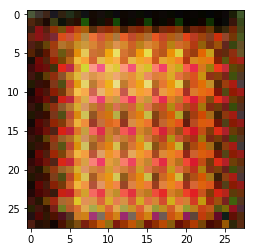

Epoch: 1/2.  Step:  110.  Discriminator: 1.3567.  Generator: 0.8283.
Epoch: 1/2.  Step:  120.  Discriminator: 2.2640.  Generator: 0.4860.
Epoch: 1/2.  Step:  130.  Discriminator: 1.8419.  Generator: 0.4968.
Epoch: 1/2.  Step:  140.  Discriminator: 1.8887.  Generator: 0.4560.
Epoch: 1/2.  Step:  150.  Discriminator: 1.9872.  Generator: 0.4919.
Epoch: 1/2.  Step:  160.  Discriminator: 1.6283.  Generator: 0.6667.
Epoch: 1/2.  Step:  170.  Discriminator: 1.7477.  Generator: 0.6158.
Epoch: 1/2.  Step:  180.  Discriminator: 1.7213.  Generator: 0.6226.
Epoch: 1/2.  Step:  190.  Discriminator: 1.6066.  Generator: 0.6958.
Epoch: 1/2.  Step:  200.  Discriminator: 1.7936.  Generator: 0.5765.


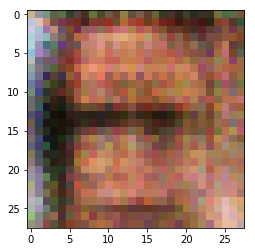

Epoch: 1/2.  Step:  210.  Discriminator: 1.8772.  Generator: 0.5324.
Epoch: 1/2.  Step:  220.  Discriminator: 1.7022.  Generator: 0.6345.
Epoch: 1/2.  Step:  230.  Discriminator: 1.7622.  Generator: 0.5854.
Epoch: 1/2.  Step:  240.  Discriminator: 1.5147.  Generator: 0.6449.
Epoch: 1/2.  Step:  250.  Discriminator: 1.6505.  Generator: 0.6875.
Epoch: 1/2.  Step:  260.  Discriminator: 1.9984.  Generator: 0.5689.
Epoch: 1/2.  Step:  270.  Discriminator: 1.6050.  Generator: 0.7490.
Epoch: 1/2.  Step:  280.  Discriminator: 1.8361.  Generator: 0.5855.
Epoch: 1/2.  Step:  290.  Discriminator: 1.6266.  Generator: 0.7124.
Epoch: 1/2.  Step:  300.  Discriminator: 1.9202.  Generator: 0.6182.


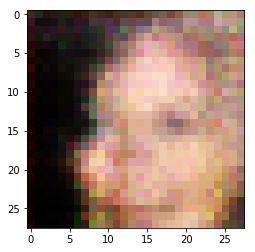

Epoch: 1/2.  Step:  310.  Discriminator: 1.7420.  Generator: 0.6663.
Epoch: 1/2.  Step:  320.  Discriminator: 1.6150.  Generator: 1.0262.
Epoch: 1/2.  Step:  330.  Discriminator: 1.4665.  Generator: 0.7349.
Epoch: 1/2.  Step:  340.  Discriminator: 1.9503.  Generator: 0.6635.
Epoch: 1/2.  Step:  350.  Discriminator: 1.6734.  Generator: 0.7130.
Epoch: 1/2.  Step:  360.  Discriminator: 1.4833.  Generator: 0.6432.
Epoch: 1/2.  Step:  370.  Discriminator: 1.5914.  Generator: 0.5608.
Epoch: 1/2.  Step:  380.  Discriminator: 1.3800.  Generator: 0.7615.
Epoch: 1/2.  Step:  390.  Discriminator: 1.5687.  Generator: 0.7893.
Epoch: 1/2.  Step:  400.  Discriminator: 1.7594.  Generator: 0.5600.


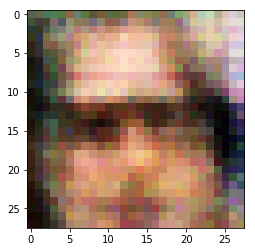

Epoch: 1/2.  Step:  410.  Discriminator: 1.6570.  Generator: 0.9580.
Epoch: 1/2.  Step:  420.  Discriminator: 1.5753.  Generator: 0.7660.
Epoch: 1/2.  Step:  430.  Discriminator: 1.9586.  Generator: 0.5722.
Epoch: 1/2.  Step:  440.  Discriminator: 1.5773.  Generator: 0.6600.
Epoch: 1/2.  Step:  450.  Discriminator: 1.7010.  Generator: 0.7059.
Epoch: 1/2.  Step:  460.  Discriminator: 1.5791.  Generator: 0.6925.
Epoch: 1/2.  Step:  470.  Discriminator: 1.6335.  Generator: 1.1487.
Epoch: 1/2.  Step:  480.  Discriminator: 1.4919.  Generator: 0.6898.
Epoch: 1/2.  Step:  490.  Discriminator: 1.7762.  Generator: 0.5270.
Epoch: 1/2.  Step:  500.  Discriminator: 1.5018.  Generator: 0.6581.


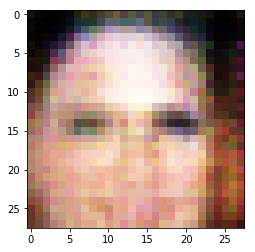

Epoch: 1/2.  Step:  510.  Discriminator: 1.6082.  Generator: 0.6493.
Epoch: 1/2.  Step:  520.  Discriminator: 1.5640.  Generator: 0.8417.
Epoch: 1/2.  Step:  530.  Discriminator: 1.6214.  Generator: 0.6803.
Epoch: 1/2.  Step:  540.  Discriminator: 1.7935.  Generator: 0.8599.
Epoch: 1/2.  Step:  550.  Discriminator: 1.7207.  Generator: 0.9660.
Epoch: 1/2.  Step:  560.  Discriminator: 1.5518.  Generator: 0.6578.
Epoch: 1/2.  Step:  570.  Discriminator: 1.6787.  Generator: 0.6364.
Epoch: 1/2.  Step:  580.  Discriminator: 1.5229.  Generator: 0.7364.
Epoch: 1/2.  Step:  590.  Discriminator: 1.5060.  Generator: 0.8885.
Epoch: 1/2.  Step:  600.  Discriminator: 1.6151.  Generator: 0.8810.


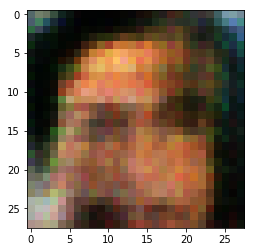

Epoch: 1/2.  Step:  610.  Discriminator: 1.4568.  Generator: 0.7872.
Epoch: 1/2.  Step:  620.  Discriminator: 1.7526.  Generator: 0.7156.
Epoch: 1/2.  Step:  630.  Discriminator: 1.4751.  Generator: 0.7805.
Epoch: 1/2.  Step:  640.  Discriminator: 1.5359.  Generator: 0.6945.
Epoch: 1/2.  Step:  650.  Discriminator: 1.7469.  Generator: 0.6656.
Epoch: 1/2.  Step:  660.  Discriminator: 1.6157.  Generator: 0.8619.
Epoch: 1/2.  Step:  670.  Discriminator: 1.6981.  Generator: 0.6280.
Epoch: 1/2.  Step:  680.  Discriminator: 1.6959.  Generator: 0.6175.
Epoch: 1/2.  Step:  690.  Discriminator: 1.5444.  Generator: 0.7473.
Epoch: 1/2.  Step:  700.  Discriminator: 1.4719.  Generator: 0.6915.


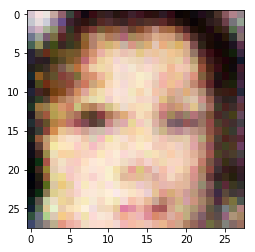

Epoch: 1/2.  Step:  710.  Discriminator: 1.8169.  Generator: 0.6273.
Epoch: 1/2.  Step:  720.  Discriminator: 1.7394.  Generator: 0.6009.
Epoch: 1/2.  Step:  730.  Discriminator: 1.5006.  Generator: 0.7422.
Epoch: 1/2.  Step:  740.  Discriminator: 1.4354.  Generator: 0.9062.
Epoch: 1/2.  Step:  750.  Discriminator: 1.7025.  Generator: 0.8882.
Epoch: 1/2.  Step:  760.  Discriminator: 1.5162.  Generator: 0.7794.
Epoch: 1/2.  Step:  770.  Discriminator: 1.4760.  Generator: 0.7725.
Epoch: 1/2.  Step:  780.  Discriminator: 1.5949.  Generator: 0.7598.
Epoch: 1/2.  Step:  790.  Discriminator: 1.6377.  Generator: 0.6282.
Epoch: 1/2.  Step:  800.  Discriminator: 1.7348.  Generator: 0.9910.


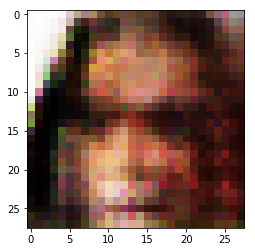

Epoch: 1/2.  Step:  810.  Discriminator: 1.4029.  Generator: 0.7725.
Epoch: 1/2.  Step:  820.  Discriminator: 1.6404.  Generator: 0.6764.
Epoch: 1/2.  Step:  830.  Discriminator: 1.4913.  Generator: 0.8506.
Epoch: 1/2.  Step:  840.  Discriminator: 1.5756.  Generator: 0.7705.
Epoch: 1/2.  Step:  850.  Discriminator: 1.4864.  Generator: 0.8358.
Epoch: 1/2.  Step:  860.  Discriminator: 1.6135.  Generator: 0.6086.
Epoch: 1/2.  Step:  870.  Discriminator: 1.3856.  Generator: 0.6799.
Epoch: 1/2.  Step:  880.  Discriminator: 1.4973.  Generator: 0.8150.
Epoch: 1/2.  Step:  890.  Discriminator: 1.5410.  Generator: 0.6801.
Epoch: 1/2.  Step:  900.  Discriminator: 1.5892.  Generator: 0.5857.


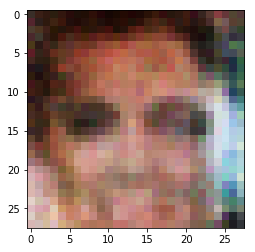

Epoch: 1/2.  Step:  910.  Discriminator: 1.4347.  Generator: 0.7417.
Epoch: 1/2.  Step:  920.  Discriminator: 1.5509.  Generator: 0.7820.
Epoch: 1/2.  Step:  930.  Discriminator: 1.5777.  Generator: 0.7901.
Epoch: 1/2.  Step:  940.  Discriminator: 1.3984.  Generator: 0.7176.
Epoch: 1/2.  Step:  950.  Discriminator: 1.6580.  Generator: 0.7238.
Epoch: 1/2.  Step:  960.  Discriminator: 1.4582.  Generator: 0.6672.
Epoch: 1/2.  Step:  970.  Discriminator: 1.4202.  Generator: 0.7763.
Epoch: 1/2.  Step:  980.  Discriminator: 1.5812.  Generator: 0.6442.
Epoch: 1/2.  Step:  990.  Discriminator: 1.4248.  Generator: 0.7181.
Epoch: 1/2.  Step: 1000.  Discriminator: 1.5396.  Generator: 0.6330.


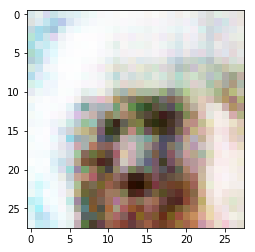

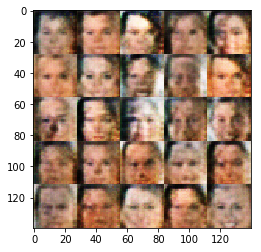

Epoch: 1/2.  Step: 1010.  Discriminator: 1.5470.  Generator: 0.8157.
Epoch: 1/2.  Step: 1020.  Discriminator: 1.4919.  Generator: 0.8070.
Epoch: 1/2.  Step: 1030.  Discriminator: 1.4573.  Generator: 0.8053.
Epoch: 1/2.  Step: 1040.  Discriminator: 1.4810.  Generator: 0.9029.
Epoch: 1/2.  Step: 1050.  Discriminator: 1.5107.  Generator: 0.7731.
Epoch: 1/2.  Step: 1060.  Discriminator: 1.6102.  Generator: 0.6728.
Epoch: 1/2.  Step: 1070.  Discriminator: 1.4305.  Generator: 0.7277.
Epoch: 1/2.  Step: 1080.  Discriminator: 1.4615.  Generator: 0.6274.
Epoch: 1/2.  Step: 1090.  Discriminator: 1.6126.  Generator: 0.6649.
Epoch: 1/2.  Step: 1100.  Discriminator: 1.4664.  Generator: 0.9161.


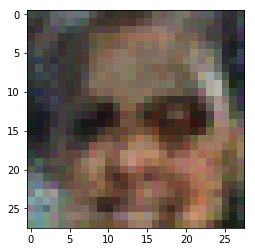

Epoch: 1/2.  Step: 1110.  Discriminator: 1.8002.  Generator: 0.5777.
Epoch: 1/2.  Step: 1120.  Discriminator: 1.6597.  Generator: 1.0043.
Epoch: 1/2.  Step: 1130.  Discriminator: 1.4823.  Generator: 0.7231.
Epoch: 1/2.  Step: 1140.  Discriminator: 1.4787.  Generator: 0.8147.
Epoch: 1/2.  Step: 1150.  Discriminator: 1.5053.  Generator: 0.8385.
Epoch: 1/2.  Step: 1160.  Discriminator: 1.5990.  Generator: 0.6642.
Epoch: 1/2.  Step: 1170.  Discriminator: 1.4187.  Generator: 0.7829.
Epoch: 1/2.  Step: 1180.  Discriminator: 1.5422.  Generator: 0.7972.
Epoch: 1/2.  Step: 1190.  Discriminator: 1.6262.  Generator: 0.6457.
Epoch: 1/2.  Step: 1200.  Discriminator: 1.4472.  Generator: 0.7532.


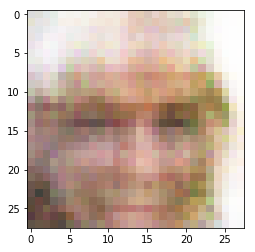

Epoch: 1/2.  Step: 1210.  Discriminator: 1.4479.  Generator: 0.7711.
Epoch: 1/2.  Step: 1220.  Discriminator: 1.5288.  Generator: 0.8581.
Epoch: 1/2.  Step: 1230.  Discriminator: 1.4984.  Generator: 0.7993.
Epoch: 1/2.  Step: 1240.  Discriminator: 1.4688.  Generator: 0.8146.
Epoch: 1/2.  Step: 1250.  Discriminator: 1.4505.  Generator: 0.7736.
Epoch: 1/2.  Step: 1260.  Discriminator: 1.3626.  Generator: 0.7083.
Epoch: 1/2.  Step: 1270.  Discriminator: 1.5106.  Generator: 0.9113.
Epoch: 1/2.  Step: 1280.  Discriminator: 1.5127.  Generator: 0.7515.
Epoch: 1/2.  Step: 1290.  Discriminator: 1.5001.  Generator: 0.6841.
Epoch: 1/2.  Step: 1300.  Discriminator: 1.4356.  Generator: 0.8294.


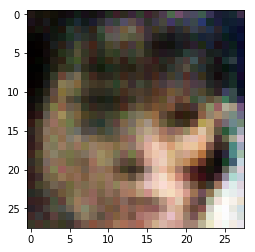

Epoch: 1/2.  Step: 1310.  Discriminator: 1.5852.  Generator: 0.8677.
Epoch: 1/2.  Step: 1320.  Discriminator: 1.5366.  Generator: 0.7453.
Epoch: 1/2.  Step: 1330.  Discriminator: 1.6852.  Generator: 0.6305.
Epoch: 1/2.  Step: 1340.  Discriminator: 1.5623.  Generator: 0.8269.
Epoch: 1/2.  Step: 1350.  Discriminator: 1.4731.  Generator: 0.9269.
Epoch: 1/2.  Step: 1360.  Discriminator: 1.7595.  Generator: 0.7237.
Epoch: 1/2.  Step: 1370.  Discriminator: 1.6698.  Generator: 0.6787.
Epoch: 1/2.  Step: 1380.  Discriminator: 1.7490.  Generator: 0.5727.
Epoch: 1/2.  Step: 1390.  Discriminator: 1.5082.  Generator: 0.6647.
Epoch: 1/2.  Step: 1400.  Discriminator: 1.4805.  Generator: 1.0100.


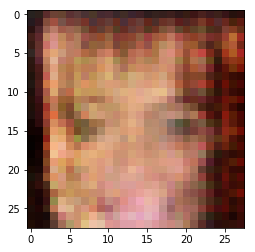

Epoch: 1/2.  Step: 1410.  Discriminator: 1.4330.  Generator: 0.7729.
Epoch: 1/2.  Step: 1420.  Discriminator: 1.4636.  Generator: 0.7073.
Epoch: 1/2.  Step: 1430.  Discriminator: 1.5122.  Generator: 0.7479.
Epoch: 1/2.  Step: 1440.  Discriminator: 1.6404.  Generator: 0.5143.
Epoch: 1/2.  Step: 1450.  Discriminator: 1.5574.  Generator: 0.6235.
Epoch: 1/2.  Step: 1460.  Discriminator: 1.5870.  Generator: 0.7416.
Epoch: 1/2.  Step: 1470.  Discriminator: 1.6090.  Generator: 0.6667.
Epoch: 1/2.  Step: 1480.  Discriminator: 1.4555.  Generator: 0.7719.
Epoch: 1/2.  Step: 1490.  Discriminator: 1.4950.  Generator: 0.7348.
Epoch: 1/2.  Step: 1500.  Discriminator: 1.5264.  Generator: 0.5991.


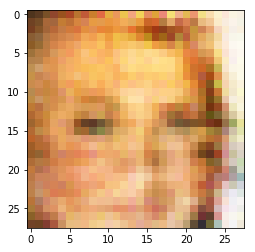

Epoch: 1/2.  Step: 1510.  Discriminator: 1.4418.  Generator: 0.7963.
Epoch: 1/2.  Step: 1520.  Discriminator: 1.5209.  Generator: 0.7639.
Epoch: 1/2.  Step: 1530.  Discriminator: 1.4825.  Generator: 0.6986.
Epoch: 1/2.  Step: 1540.  Discriminator: 1.5485.  Generator: 0.7626.
Epoch: 1/2.  Step: 1550.  Discriminator: 1.5091.  Generator: 0.7264.
Epoch: 1/2.  Step: 1560.  Discriminator: 1.4419.  Generator: 0.8103.
Epoch: 1/2.  Step: 1570.  Discriminator: 1.5137.  Generator: 1.1445.
Epoch: 1/2.  Step: 1580.  Discriminator: 1.5942.  Generator: 0.7048.
Epoch: 1/2.  Step: 1590.  Discriminator: 1.4100.  Generator: 0.7657.
Epoch: 1/2.  Step: 1600.  Discriminator: 1.4372.  Generator: 0.8096.


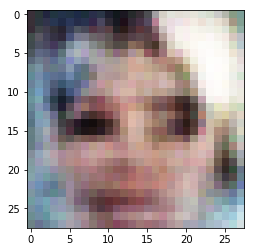

Epoch: 1/2.  Step: 1610.  Discriminator: 1.5757.  Generator: 0.6858.
Epoch: 1/2.  Step: 1620.  Discriminator: 1.4334.  Generator: 0.7012.
Epoch: 1/2.  Step: 1630.  Discriminator: 1.5260.  Generator: 0.6931.
Epoch: 1/2.  Step: 1640.  Discriminator: 1.7073.  Generator: 0.6121.
Epoch: 1/2.  Step: 1650.  Discriminator: 1.5217.  Generator: 0.7294.
Epoch: 1/2.  Step: 1660.  Discriminator: 1.5488.  Generator: 0.7867.
Epoch: 1/2.  Step: 1670.  Discriminator: 1.5354.  Generator: 0.8052.
Epoch: 1/2.  Step: 1680.  Discriminator: 1.3643.  Generator: 0.7708.
Epoch: 1/2.  Step: 1690.  Discriminator: 1.4233.  Generator: 0.7078.
Epoch: 1/2.  Step: 1700.  Discriminator: 1.4984.  Generator: 0.7326.


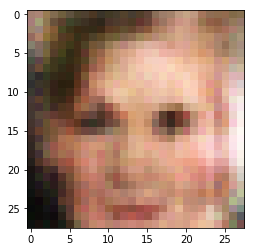

Epoch: 1/2.  Step: 1710.  Discriminator: 1.4785.  Generator: 0.7154.
Epoch: 1/2.  Step: 1720.  Discriminator: 1.5128.  Generator: 0.6200.
Epoch: 1/2.  Step: 1730.  Discriminator: 1.5177.  Generator: 0.7148.
Epoch: 1/2.  Step: 1740.  Discriminator: 1.4066.  Generator: 0.7075.
Epoch: 1/2.  Step: 1750.  Discriminator: 1.4551.  Generator: 0.7702.
Epoch: 1/2.  Step: 1760.  Discriminator: 1.4727.  Generator: 0.6807.
Epoch: 1/2.  Step: 1770.  Discriminator: 1.5806.  Generator: 0.7641.
Epoch: 1/2.  Step: 1780.  Discriminator: 1.4480.  Generator: 0.8875.
Epoch: 1/2.  Step: 1790.  Discriminator: 1.5144.  Generator: 0.6618.
Epoch: 1/2.  Step: 1800.  Discriminator: 1.5489.  Generator: 0.7626.


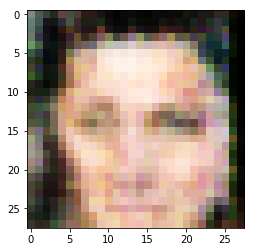

Epoch: 1/2.  Step: 1810.  Discriminator: 1.8138.  Generator: 0.6452.
Epoch: 1/2.  Step: 1820.  Discriminator: 1.5614.  Generator: 0.7361.
Epoch: 1/2.  Step: 1830.  Discriminator: 1.4881.  Generator: 0.8293.
Epoch: 1/2.  Step: 1840.  Discriminator: 1.4655.  Generator: 0.9072.
Epoch: 1/2.  Step: 1850.  Discriminator: 1.5212.  Generator: 0.6291.
Epoch: 1/2.  Step: 1860.  Discriminator: 1.5266.  Generator: 0.6810.
Epoch: 1/2.  Step: 1870.  Discriminator: 1.4519.  Generator: 0.7445.
Epoch: 1/2.  Step: 1880.  Discriminator: 1.5473.  Generator: 0.7921.
Epoch: 1/2.  Step: 1890.  Discriminator: 1.4186.  Generator: 0.7584.
Epoch: 1/2.  Step: 1900.  Discriminator: 1.4731.  Generator: 0.8185.


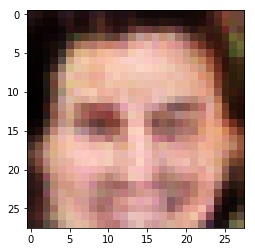

Epoch: 1/2.  Step: 1910.  Discriminator: 1.4597.  Generator: 0.6450.
Epoch: 1/2.  Step: 1920.  Discriminator: 1.4670.  Generator: 0.6906.
Epoch: 1/2.  Step: 1930.  Discriminator: 1.3964.  Generator: 0.6922.
Epoch: 1/2.  Step: 1940.  Discriminator: 1.4942.  Generator: 0.6530.
Epoch: 1/2.  Step: 1950.  Discriminator: 1.5485.  Generator: 0.6968.
Epoch: 1/2.  Step: 1960.  Discriminator: 1.3681.  Generator: 0.7622.
Epoch: 1/2.  Step: 1970.  Discriminator: 1.5482.  Generator: 0.7027.
Epoch: 1/2.  Step: 1980.  Discriminator: 1.4621.  Generator: 0.7046.
Epoch: 1/2.  Step: 1990.  Discriminator: 1.4501.  Generator: 0.7752.
Epoch: 1/2.  Step: 2000.  Discriminator: 1.4400.  Generator: 0.7830.


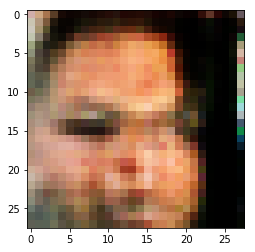

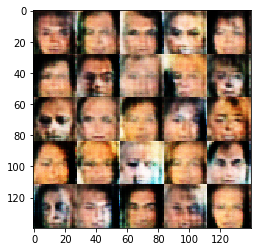

Epoch: 1/2.  Step: 2010.  Discriminator: 1.6011.  Generator: 0.5213.
Epoch: 1/2.  Step: 2020.  Discriminator: 1.5519.  Generator: 0.5811.
Epoch: 1/2.  Step: 2030.  Discriminator: 1.6259.  Generator: 0.6588.
Epoch: 1/2.  Step: 2040.  Discriminator: 1.4547.  Generator: 0.7394.
Epoch: 1/2.  Step: 2050.  Discriminator: 1.4739.  Generator: 0.7784.
Epoch: 1/2.  Step: 2060.  Discriminator: 1.4886.  Generator: 0.7658.
Epoch: 1/2.  Step: 2070.  Discriminator: 1.5232.  Generator: 0.8950.
Epoch: 1/2.  Step: 2080.  Discriminator: 1.4614.  Generator: 0.7753.
Epoch: 1/2.  Step: 2090.  Discriminator: 1.4936.  Generator: 0.7823.
Epoch: 1/2.  Step: 2100.  Discriminator: 1.4245.  Generator: 0.7299.


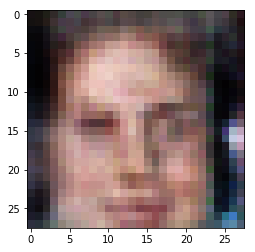

Epoch: 1/2.  Step: 2110.  Discriminator: 1.4320.  Generator: 0.6843.
Epoch: 1/2.  Step: 2120.  Discriminator: 1.5050.  Generator: 0.6484.
Epoch: 1/2.  Step: 2130.  Discriminator: 1.4829.  Generator: 0.7577.
Epoch: 1/2.  Step: 2140.  Discriminator: 1.4903.  Generator: 0.8042.
Epoch: 1/2.  Step: 2150.  Discriminator: 1.4601.  Generator: 0.8467.
Epoch: 1/2.  Step: 2160.  Discriminator: 1.3978.  Generator: 0.7710.
Epoch: 1/2.  Step: 2170.  Discriminator: 1.4581.  Generator: 0.8440.
Epoch: 1/2.  Step: 2180.  Discriminator: 1.4392.  Generator: 0.8686.
Epoch: 1/2.  Step: 2190.  Discriminator: 1.4505.  Generator: 0.8494.
Epoch: 1/2.  Step: 2200.  Discriminator: 1.5259.  Generator: 0.7056.


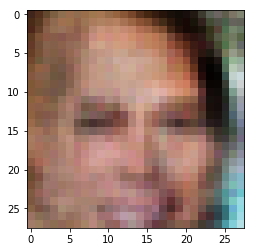

Epoch: 1/2.  Step: 2210.  Discriminator: 1.3990.  Generator: 0.8095.
Epoch: 1/2.  Step: 2220.  Discriminator: 1.5001.  Generator: 0.8143.
Epoch: 1/2.  Step: 2230.  Discriminator: 1.5453.  Generator: 0.8446.
Epoch: 1/2.  Step: 2240.  Discriminator: 1.4543.  Generator: 0.7713.
Epoch: 1/2.  Step: 2250.  Discriminator: 1.4089.  Generator: 0.7335.
Epoch: 1/2.  Step: 2260.  Discriminator: 1.5981.  Generator: 0.7954.
Epoch: 1/2.  Step: 2270.  Discriminator: 1.6139.  Generator: 1.0606.
Epoch: 1/2.  Step: 2280.  Discriminator: 1.4890.  Generator: 0.8134.
Epoch: 1/2.  Step: 2290.  Discriminator: 1.4976.  Generator: 0.8368.
Epoch: 1/2.  Step: 2300.  Discriminator: 1.4528.  Generator: 0.7156.


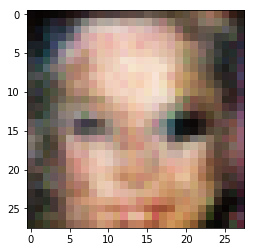

Epoch: 1/2.  Step: 2310.  Discriminator: 1.4990.  Generator: 0.7667.
Epoch: 1/2.  Step: 2320.  Discriminator: 1.4948.  Generator: 0.6615.
Epoch: 1/2.  Step: 2330.  Discriminator: 1.4648.  Generator: 0.6922.
Epoch: 1/2.  Step: 2340.  Discriminator: 1.5088.  Generator: 0.5995.
Epoch: 1/2.  Step: 2350.  Discriminator: 1.4651.  Generator: 0.6841.
Epoch: 1/2.  Step: 2360.  Discriminator: 1.6093.  Generator: 0.6617.
Epoch: 1/2.  Step: 2370.  Discriminator: 1.3743.  Generator: 0.8299.
Epoch: 1/2.  Step: 2380.  Discriminator: 1.4573.  Generator: 0.6992.
Epoch: 1/2.  Step: 2390.  Discriminator: 1.4724.  Generator: 0.6360.
Epoch: 1/2.  Step: 2400.  Discriminator: 1.3985.  Generator: 0.7571.


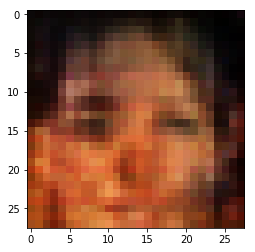

Epoch: 1/2.  Step: 2410.  Discriminator: 1.5236.  Generator: 0.7250.
Epoch: 1/2.  Step: 2420.  Discriminator: 1.4767.  Generator: 0.5602.
Epoch: 1/2.  Step: 2430.  Discriminator: 1.5411.  Generator: 0.6359.
Epoch: 1/2.  Step: 2440.  Discriminator: 1.5835.  Generator: 0.7391.
Epoch: 1/2.  Step: 2450.  Discriminator: 1.5566.  Generator: 0.7671.
Epoch: 1/2.  Step: 2460.  Discriminator: 1.4825.  Generator: 0.7372.
Epoch: 1/2.  Step: 2470.  Discriminator: 1.5458.  Generator: 0.6056.
Epoch: 1/2.  Step: 2480.  Discriminator: 1.5510.  Generator: 0.5480.
Epoch: 1/2.  Step: 2490.  Discriminator: 1.4299.  Generator: 0.7655.
Epoch: 1/2.  Step: 2500.  Discriminator: 1.5432.  Generator: 0.7240.


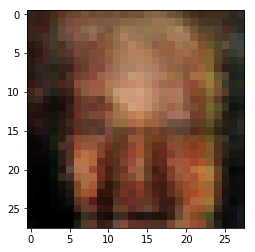

Epoch: 1/2.  Step: 2510.  Discriminator: 1.4481.  Generator: 0.7715.
Epoch: 1/2.  Step: 2520.  Discriminator: 1.4883.  Generator: 0.7785.
Epoch: 1/2.  Step: 2530.  Discriminator: 1.4242.  Generator: 0.7084.
Epoch: 1/2.  Step: 2540.  Discriminator: 1.5527.  Generator: 0.8788.
Epoch: 1/2.  Step: 2550.  Discriminator: 1.4717.  Generator: 0.7821.
Epoch: 1/2.  Step: 2560.  Discriminator: 1.4717.  Generator: 0.7136.
Epoch: 1/2.  Step: 2570.  Discriminator: 1.4505.  Generator: 0.6631.
Epoch: 1/2.  Step: 2580.  Discriminator: 1.4492.  Generator: 0.7732.
Epoch: 1/2.  Step: 2590.  Discriminator: 1.4980.  Generator: 0.7298.
Epoch: 1/2.  Step: 2600.  Discriminator: 1.4676.  Generator: 0.7111.


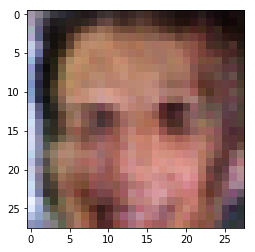

Epoch: 1/2.  Step: 2610.  Discriminator: 1.4497.  Generator: 0.9650.
Epoch: 1/2.  Step: 2620.  Discriminator: 1.5303.  Generator: 0.9278.
Epoch: 1/2.  Step: 2630.  Discriminator: 1.4354.  Generator: 0.8576.
Epoch: 1/2.  Step: 2640.  Discriminator: 1.4476.  Generator: 0.7105.
Epoch: 1/2.  Step: 2650.  Discriminator: 1.5181.  Generator: 0.7850.
Epoch: 1/2.  Step: 2660.  Discriminator: 1.4722.  Generator: 0.9409.
Epoch: 1/2.  Step: 2670.  Discriminator: 1.5717.  Generator: 0.6052.
Epoch: 1/2.  Step: 2680.  Discriminator: 1.4104.  Generator: 0.9040.
Epoch: 1/2.  Step: 2690.  Discriminator: 1.4911.  Generator: 0.8059.
Epoch: 1/2.  Step: 2700.  Discriminator: 1.4131.  Generator: 0.7013.


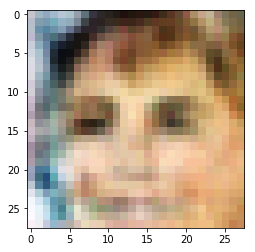

Epoch: 1/2.  Step: 2710.  Discriminator: 1.4825.  Generator: 0.7674.
Epoch: 1/2.  Step: 2720.  Discriminator: 1.6327.  Generator: 0.6641.
Epoch: 1/2.  Step: 2730.  Discriminator: 1.4424.  Generator: 0.7902.
Epoch: 1/2.  Step: 2740.  Discriminator: 1.5337.  Generator: 0.5967.
Epoch: 1/2.  Step: 2750.  Discriminator: 1.4389.  Generator: 0.8196.
Epoch: 1/2.  Step: 2760.  Discriminator: 1.5268.  Generator: 0.7537.
Epoch: 1/2.  Step: 2770.  Discriminator: 1.5097.  Generator: 0.7056.
Epoch: 1/2.  Step: 2780.  Discriminator: 1.5839.  Generator: 0.6567.
Epoch: 1/2.  Step: 2790.  Discriminator: 1.5134.  Generator: 0.8819.
Epoch: 1/2.  Step: 2800.  Discriminator: 1.4475.  Generator: 0.7654.


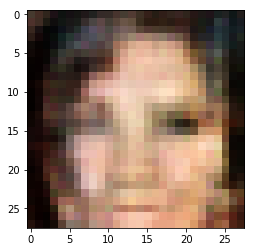

Epoch: 1/2.  Step: 2810.  Discriminator: 1.4454.  Generator: 0.7883.
Epoch: 1/2.  Step: 2820.  Discriminator: 1.4412.  Generator: 0.7800.
Epoch: 1/2.  Step: 2830.  Discriminator: 1.5687.  Generator: 0.5606.
Epoch: 1/2.  Step: 2840.  Discriminator: 1.4881.  Generator: 0.9499.
Epoch: 1/2.  Step: 2850.  Discriminator: 1.4806.  Generator: 0.7587.
Epoch: 1/2.  Step: 2860.  Discriminator: 1.5506.  Generator: 0.4934.
Epoch: 1/2.  Step: 2870.  Discriminator: 1.4013.  Generator: 0.7238.
Epoch: 1/2.  Step: 2880.  Discriminator: 1.5745.  Generator: 0.8706.
Epoch: 1/2.  Step: 2890.  Discriminator: 1.5490.  Generator: 0.7903.
Epoch: 1/2.  Step: 2900.  Discriminator: 1.5811.  Generator: 0.5639.


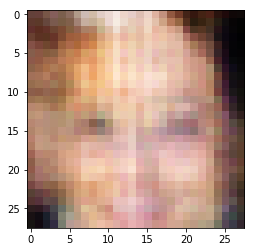

Epoch: 1/2.  Step: 2910.  Discriminator: 1.5408.  Generator: 0.6112.
Epoch: 1/2.  Step: 2920.  Discriminator: 1.4634.  Generator: 0.7265.
Epoch: 1/2.  Step: 2930.  Discriminator: 1.4554.  Generator: 0.7838.
Epoch: 1/2.  Step: 2940.  Discriminator: 1.4633.  Generator: 0.8257.
Epoch: 1/2.  Step: 2950.  Discriminator: 1.4883.  Generator: 1.0244.
Epoch: 1/2.  Step: 2960.  Discriminator: 1.4625.  Generator: 0.8557.
Epoch: 1/2.  Step: 2970.  Discriminator: 1.4568.  Generator: 0.5915.
Epoch: 1/2.  Step: 2980.  Discriminator: 1.3952.  Generator: 0.7165.
Epoch: 1/2.  Step: 2990.  Discriminator: 1.4706.  Generator: 0.8107.
Epoch: 1/2.  Step: 3000.  Discriminator: 1.3660.  Generator: 0.7790.


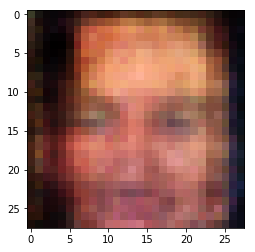

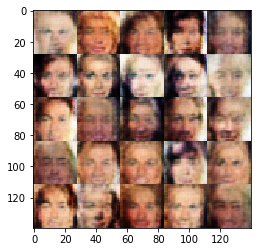

Epoch: 1/2.  Step: 3010.  Discriminator: 1.4740.  Generator: 0.6399.
Epoch: 1/2.  Step: 3020.  Discriminator: 1.5690.  Generator: 0.6645.
Epoch: 1/2.  Step: 3030.  Discriminator: 1.4577.  Generator: 0.7236.
Epoch: 1/2.  Step: 3040.  Discriminator: 1.4931.  Generator: 0.6562.
Epoch: 1/2.  Step: 3050.  Discriminator: 1.4019.  Generator: 0.7890.
Epoch: 1/2.  Step: 3060.  Discriminator: 1.4041.  Generator: 0.8202.
Epoch: 1/2.  Step: 3070.  Discriminator: 1.4790.  Generator: 0.8244.
Epoch: 1/2.  Step: 3080.  Discriminator: 1.3798.  Generator: 0.8663.
Epoch: 1/2.  Step: 3090.  Discriminator: 1.4919.  Generator: 0.7261.
Epoch: 1/2.  Step: 3100.  Discriminator: 1.4718.  Generator: 0.8703.


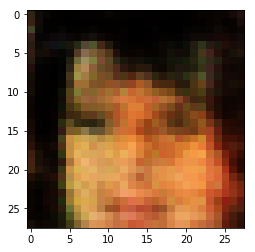

Epoch: 1/2.  Step: 3110.  Discriminator: 1.5369.  Generator: 0.8024.
Epoch: 1/2.  Step: 3120.  Discriminator: 1.7420.  Generator: 0.6559.
Epoch: 1/2.  Step: 3130.  Discriminator: 1.5110.  Generator: 0.7213.
Epoch: 1/2.  Step: 3140.  Discriminator: 1.4800.  Generator: 0.9167.
Epoch: 1/2.  Step: 3150.  Discriminator: 1.5446.  Generator: 0.6908.
Epoch: 1/2.  Step: 3160.  Discriminator: 1.4610.  Generator: 0.7789.
Epoch: 1/2.  Step: 3170.  Discriminator: 1.4708.  Generator: 0.7691.
Epoch: 1/2.  Step: 3180.  Discriminator: 1.4660.  Generator: 0.7639.
Epoch: 1/2.  Step: 3190.  Discriminator: 1.6457.  Generator: 0.6933.
Epoch: 1/2.  Step: 3200.  Discriminator: 1.4906.  Generator: 0.8076.


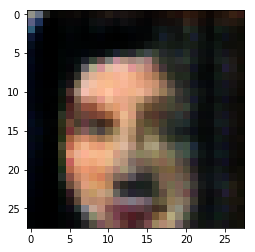

Epoch: 1/2.  Step: 3210.  Discriminator: 1.4688.  Generator: 0.7970.
Epoch: 1/2.  Step: 3220.  Discriminator: 1.5256.  Generator: 0.7794.
Epoch: 1/2.  Step: 3230.  Discriminator: 1.4912.  Generator: 0.7412.
Epoch: 1/2.  Step: 3240.  Discriminator: 1.5237.  Generator: 0.8336.
Epoch: 1/2.  Step: 3250.  Discriminator: 1.4319.  Generator: 0.7407.
Epoch: 1/2.  Step: 3260.  Discriminator: 1.4853.  Generator: 0.9650.
Epoch: 1/2.  Step: 3270.  Discriminator: 1.4373.  Generator: 0.8289.
Epoch: 1/2.  Step: 3280.  Discriminator: 1.4821.  Generator: 0.6943.
Epoch: 1/2.  Step: 3290.  Discriminator: 1.3947.  Generator: 0.6545.
Epoch: 1/2.  Step: 3300.  Discriminator: 1.4651.  Generator: 0.5787.


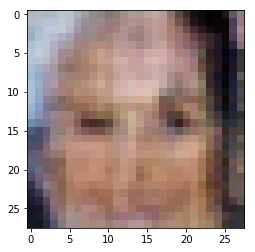

Epoch: 1/2.  Step: 3310.  Discriminator: 1.5056.  Generator: 0.9012.
Epoch: 1/2.  Step: 3320.  Discriminator: 1.5457.  Generator: 0.8408.
Epoch: 1/2.  Step: 3330.  Discriminator: 1.5297.  Generator: 0.6544.
Epoch: 1/2.  Step: 3340.  Discriminator: 1.5161.  Generator: 0.8668.
Epoch: 1/2.  Step: 3350.  Discriminator: 1.4378.  Generator: 0.8257.
Epoch: 1/2.  Step: 3360.  Discriminator: 1.4669.  Generator: 0.8578.
Epoch: 1/2.  Step: 3370.  Discriminator: 1.5041.  Generator: 0.6884.
Epoch: 1/2.  Step: 3380.  Discriminator: 1.3982.  Generator: 0.8785.
Epoch: 1/2.  Step: 3390.  Discriminator: 1.5141.  Generator: 0.6926.
Epoch: 1/2.  Step: 3400.  Discriminator: 1.4396.  Generator: 0.8122.


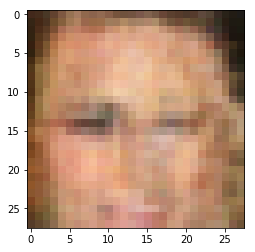

Epoch: 1/2.  Step: 3410.  Discriminator: 1.4421.  Generator: 0.7526.
Epoch: 1/2.  Step: 3420.  Discriminator: 1.4683.  Generator: 0.8889.
Epoch: 1/2.  Step: 3430.  Discriminator: 1.4284.  Generator: 0.7171.
Epoch: 1/2.  Step: 3440.  Discriminator: 1.5009.  Generator: 0.7040.
Epoch: 1/2.  Step: 3450.  Discriminator: 1.4546.  Generator: 0.8176.
Epoch: 1/2.  Step: 3460.  Discriminator: 1.6202.  Generator: 0.6776.
Epoch: 1/2.  Step: 3470.  Discriminator: 1.3855.  Generator: 0.6243.
Epoch: 1/2.  Step: 3480.  Discriminator: 1.5112.  Generator: 0.6887.
Epoch: 1/2.  Step: 3490.  Discriminator: 1.4019.  Generator: 0.7357.
Epoch: 1/2.  Step: 3500.  Discriminator: 1.5679.  Generator: 0.5810.


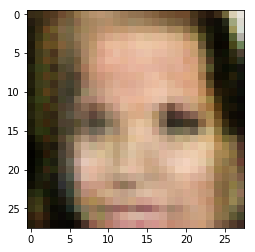

Epoch: 1/2.  Step: 3510.  Discriminator: 1.4951.  Generator: 0.6407.
Epoch: 1/2.  Step: 3520.  Discriminator: 1.5117.  Generator: 0.7771.
Epoch: 1/2.  Step: 3530.  Discriminator: 1.4488.  Generator: 0.7930.
Epoch: 1/2.  Step: 3540.  Discriminator: 1.5074.  Generator: 0.7037.
Epoch: 1/2.  Step: 3550.  Discriminator: 1.3525.  Generator: 0.6382.
Epoch: 1/2.  Step: 3560.  Discriminator: 1.5083.  Generator: 0.5879.
Epoch: 1/2.  Step: 3570.  Discriminator: 1.4051.  Generator: 0.7573.
Epoch: 1/2.  Step: 3580.  Discriminator: 1.4325.  Generator: 0.6724.
Epoch: 1/2.  Step: 3590.  Discriminator: 1.4638.  Generator: 0.8865.
Epoch: 1/2.  Step: 3600.  Discriminator: 1.4831.  Generator: 0.7080.


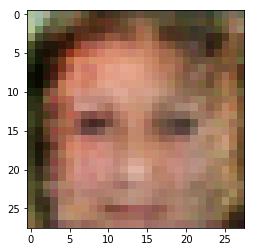

Epoch: 1/2.  Step: 3610.  Discriminator: 1.4444.  Generator: 0.7888.
Epoch: 1/2.  Step: 3620.  Discriminator: 1.4646.  Generator: 0.7481.
Epoch: 1/2.  Step: 3630.  Discriminator: 1.4391.  Generator: 0.6945.
Epoch: 1/2.  Step: 3640.  Discriminator: 1.6008.  Generator: 0.5543.
Epoch: 1/2.  Step: 3650.  Discriminator: 1.5621.  Generator: 0.6611.
Epoch: 1/2.  Step: 3660.  Discriminator: 1.4835.  Generator: 0.7026.
Epoch: 1/2.  Step: 3670.  Discriminator: 1.4373.  Generator: 0.8121.
Epoch: 1/2.  Step: 3680.  Discriminator: 1.4662.  Generator: 0.7993.
Epoch: 1/2.  Step: 3690.  Discriminator: 1.4306.  Generator: 0.6877.
Epoch: 1/2.  Step: 3700.  Discriminator: 1.4372.  Generator: 0.6176.


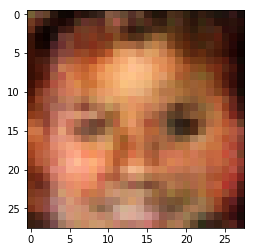

Epoch: 1/2.  Step: 3710.  Discriminator: 1.4078.  Generator: 0.7150.
Epoch: 1/2.  Step: 3720.  Discriminator: 1.4529.  Generator: 0.7424.
Epoch: 1/2.  Step: 3730.  Discriminator: 1.4794.  Generator: 0.8235.
Epoch: 1/2.  Step: 3740.  Discriminator: 1.4299.  Generator: 0.7773.
Epoch: 1/2.  Step: 3750.  Discriminator: 1.4543.  Generator: 0.8290.
Epoch: 1/2.  Step: 3760.  Discriminator: 1.4960.  Generator: 0.8122.
Epoch: 1/2.  Step: 3770.  Discriminator: 1.4408.  Generator: 0.7000.
Epoch: 1/2.  Step: 3780.  Discriminator: 1.4595.  Generator: 0.6668.
Epoch: 1/2.  Step: 3790.  Discriminator: 1.4386.  Generator: 0.7637.
Epoch: 1/2.  Step: 3800.  Discriminator: 1.4996.  Generator: 0.7083.


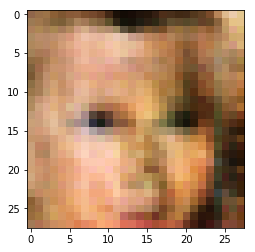

Epoch: 1/2.  Step: 3810.  Discriminator: 1.5240.  Generator: 0.7358.
Epoch: 1/2.  Step: 3820.  Discriminator: 1.4881.  Generator: 0.8511.
Epoch: 1/2.  Step: 3830.  Discriminator: 1.5859.  Generator: 0.7779.
Epoch: 1/2.  Step: 3840.  Discriminator: 1.4494.  Generator: 0.8905.
Epoch: 1/2.  Step: 3850.  Discriminator: 1.4868.  Generator: 0.8031.
Epoch: 1/2.  Step: 3860.  Discriminator: 1.5044.  Generator: 0.5804.
Epoch: 1/2.  Step: 3870.  Discriminator: 1.4376.  Generator: 0.6556.
Epoch: 1/2.  Step: 3880.  Discriminator: 1.5751.  Generator: 0.6076.
Epoch: 1/2.  Step: 3890.  Discriminator: 1.4999.  Generator: 0.7778.
Epoch: 1/2.  Step: 3900.  Discriminator: 1.4583.  Generator: 0.6595.


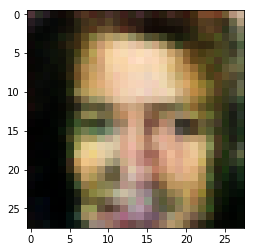

Epoch: 1/2.  Step: 3910.  Discriminator: 1.4660.  Generator: 0.8133.
Epoch: 1/2.  Step: 3920.  Discriminator: 1.7645.  Generator: 0.4697.
Epoch: 1/2.  Step: 3930.  Discriminator: 1.4436.  Generator: 0.6543.
Epoch: 1/2.  Step: 3940.  Discriminator: 1.4880.  Generator: 0.9507.
Epoch: 1/2.  Step: 3950.  Discriminator: 1.4850.  Generator: 0.7032.
Epoch: 1/2.  Step: 3960.  Discriminator: 1.5068.  Generator: 0.5583.
Epoch: 1/2.  Step: 3970.  Discriminator: 1.4217.  Generator: 0.7798.
Epoch: 1/2.  Step: 3980.  Discriminator: 1.4557.  Generator: 0.8499.
Epoch: 1/2.  Step: 3990.  Discriminator: 1.3805.  Generator: 0.6682.
Epoch: 1/2.  Step: 4000.  Discriminator: 1.4052.  Generator: 0.6918.


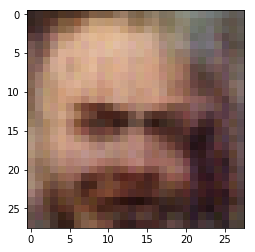

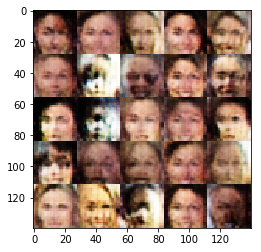

Epoch: 1/2.  Step: 4010.  Discriminator: 1.4562.  Generator: 0.6165.
Epoch: 1/2.  Step: 4020.  Discriminator: 1.4054.  Generator: 0.8461.
Epoch: 1/2.  Step: 4030.  Discriminator: 1.5770.  Generator: 0.6952.
Epoch: 1/2.  Step: 4040.  Discriminator: 1.4680.  Generator: 0.9413.
Epoch: 1/2.  Step: 4050.  Discriminator: 1.5300.  Generator: 0.7956.
Epoch: 1/2.  Step: 4060.  Discriminator: 1.4396.  Generator: 0.8792.
Epoch: 1/2.  Step: 4070.  Discriminator: 1.4895.  Generator: 0.8146.
Epoch: 1/2.  Step: 4080.  Discriminator: 1.5173.  Generator: 0.6158.
Epoch: 1/2.  Step: 4090.  Discriminator: 1.4138.  Generator: 0.7759.
Epoch: 1/2.  Step: 4100.  Discriminator: 1.5017.  Generator: 0.7177.


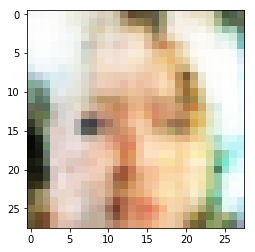

Epoch: 1/2.  Step: 4110.  Discriminator: 1.4877.  Generator: 0.9387.
Epoch: 1/2.  Step: 4120.  Discriminator: 1.4319.  Generator: 0.8274.
Epoch: 1/2.  Step: 4130.  Discriminator: 1.4828.  Generator: 0.6125.
Epoch: 1/2.  Step: 4140.  Discriminator: 1.4364.  Generator: 0.7258.
Epoch: 1/2.  Step: 4150.  Discriminator: 1.5073.  Generator: 0.8070.
Epoch: 1/2.  Step: 4160.  Discriminator: 1.3767.  Generator: 0.7879.
Epoch: 1/2.  Step: 4170.  Discriminator: 1.5201.  Generator: 0.7215.
Epoch: 1/2.  Step: 4180.  Discriminator: 1.5247.  Generator: 0.6541.
Epoch: 1/2.  Step: 4190.  Discriminator: 1.3946.  Generator: 0.8921.
Epoch: 1/2.  Step: 4200.  Discriminator: 1.4057.  Generator: 0.7354.


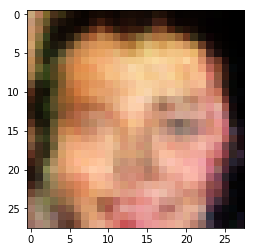

Epoch: 1/2.  Step: 4210.  Discriminator: 1.3330.  Generator: 0.7772.
Epoch: 1/2.  Step: 4220.  Discriminator: 1.4869.  Generator: 0.6979.
Epoch: 1/2.  Step: 4230.  Discriminator: 1.5006.  Generator: 0.7809.
Epoch: 1/2.  Step: 4240.  Discriminator: 1.4312.  Generator: 0.7357.
Epoch: 1/2.  Step: 4250.  Discriminator: 1.4280.  Generator: 0.7153.
Epoch: 1/2.  Step: 4260.  Discriminator: 1.3715.  Generator: 0.9043.
Epoch: 1/2.  Step: 4270.  Discriminator: 1.4562.  Generator: 0.8423.
Epoch: 1/2.  Step: 4280.  Discriminator: 1.4464.  Generator: 0.7523.
Epoch: 1/2.  Step: 4290.  Discriminator: 1.4786.  Generator: 0.6759.
Epoch: 1/2.  Step: 4300.  Discriminator: 1.4783.  Generator: 0.8238.


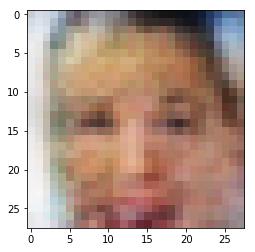

Epoch: 1/2.  Step: 4310.  Discriminator: 1.7809.  Generator: 0.5526.
Epoch: 1/2.  Step: 4320.  Discriminator: 1.4622.  Generator: 0.8871.
Epoch: 1/2.  Step: 4330.  Discriminator: 1.5056.  Generator: 0.7410.
Epoch: 1/2.  Step: 4340.  Discriminator: 1.4153.  Generator: 0.7987.
Epoch: 1/2.  Step: 4350.  Discriminator: 1.4637.  Generator: 0.9300.
Epoch: 1/2.  Step: 4360.  Discriminator: 1.4973.  Generator: 0.6093.
Epoch: 1/2.  Step: 4370.  Discriminator: 1.5433.  Generator: 0.6295.
Epoch: 1/2.  Step: 4380.  Discriminator: 1.5011.  Generator: 0.5939.
Epoch: 1/2.  Step: 4390.  Discriminator: 1.4732.  Generator: 0.6627.
Epoch: 1/2.  Step: 4400.  Discriminator: 1.4260.  Generator: 0.8304.


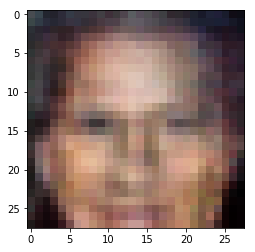

Epoch: 1/2.  Step: 4410.  Discriminator: 1.4163.  Generator: 0.8028.
Epoch: 1/2.  Step: 4420.  Discriminator: 1.4320.  Generator: 0.7181.
Epoch: 1/2.  Step: 4430.  Discriminator: 1.4294.  Generator: 0.7349.
Epoch: 1/2.  Step: 4440.  Discriminator: 1.4634.  Generator: 0.7866.
Epoch: 1/2.  Step: 4450.  Discriminator: 1.4010.  Generator: 0.8195.
Epoch: 1/2.  Step: 4460.  Discriminator: 1.4384.  Generator: 0.8200.
Epoch: 1/2.  Step: 4470.  Discriminator: 1.4126.  Generator: 0.7694.
Epoch: 1/2.  Step: 4480.  Discriminator: 1.5204.  Generator: 1.0091.
Epoch: 1/2.  Step: 4490.  Discriminator: 1.4594.  Generator: 0.7319.
Epoch: 1/2.  Step: 4500.  Discriminator: 1.4457.  Generator: 0.6695.


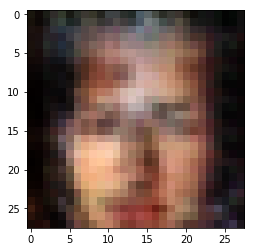

Epoch: 1/2.  Step: 4510.  Discriminator: 1.4770.  Generator: 1.0189.
Epoch: 1/2.  Step: 4520.  Discriminator: 1.4494.  Generator: 0.7857.
Epoch: 1/2.  Step: 4530.  Discriminator: 1.4822.  Generator: 0.8050.
Epoch: 1/2.  Step: 4540.  Discriminator: 1.3848.  Generator: 0.7598.
Epoch: 1/2.  Step: 4550.  Discriminator: 1.4229.  Generator: 0.7897.
Epoch: 1/2.  Step: 4560.  Discriminator: 1.4652.  Generator: 0.8517.
Epoch: 1/2.  Step: 4570.  Discriminator: 1.4446.  Generator: 0.8260.
Epoch: 1/2.  Step: 4580.  Discriminator: 1.4727.  Generator: 0.8105.
Epoch: 1/2.  Step: 4590.  Discriminator: 1.4270.  Generator: 0.6557.
Epoch: 1/2.  Step: 4600.  Discriminator: 1.3974.  Generator: 0.6372.


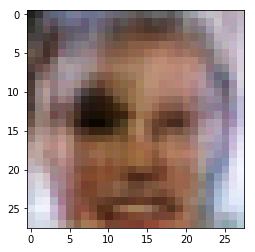

Epoch: 1/2.  Step: 4610.  Discriminator: 1.4254.  Generator: 0.6355.
Epoch: 1/2.  Step: 4620.  Discriminator: 1.4203.  Generator: 0.7755.
Epoch: 1/2.  Step: 4630.  Discriminator: 1.3990.  Generator: 0.7862.
Epoch: 1/2.  Step: 4640.  Discriminator: 1.4407.  Generator: 0.8073.
Epoch: 1/2.  Step: 4650.  Discriminator: 1.6256.  Generator: 0.6696.
Epoch: 1/2.  Step: 4660.  Discriminator: 1.4441.  Generator: 0.7582.
Epoch: 1/2.  Step: 4670.  Discriminator: 1.4549.  Generator: 0.5664.
Epoch: 1/2.  Step: 4680.  Discriminator: 1.4379.  Generator: 0.8607.
Epoch: 1/2.  Step: 4690.  Discriminator: 1.4828.  Generator: 0.7879.
Epoch: 1/2.  Step: 4700.  Discriminator: 1.4233.  Generator: 0.8877.


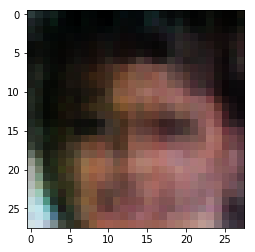

Epoch: 1/2.  Step: 4710.  Discriminator: 1.4428.  Generator: 0.7989.
Epoch: 1/2.  Step: 4720.  Discriminator: 1.4033.  Generator: 0.8781.
Epoch: 1/2.  Step: 4730.  Discriminator: 1.4082.  Generator: 0.7156.
Epoch: 1/2.  Step: 4740.  Discriminator: 1.4496.  Generator: 0.6824.
Epoch: 1/2.  Step: 4750.  Discriminator: 1.3956.  Generator: 0.7065.
Epoch: 1/2.  Step: 4760.  Discriminator: 1.4731.  Generator: 0.7230.
Epoch: 1/2.  Step: 4770.  Discriminator: 1.4361.  Generator: 0.8247.
Epoch: 1/2.  Step: 4780.  Discriminator: 1.5336.  Generator: 0.5616.
Epoch: 1/2.  Step: 4790.  Discriminator: 1.4067.  Generator: 0.7243.
Epoch: 1/2.  Step: 4800.  Discriminator: 1.4981.  Generator: 0.6866.


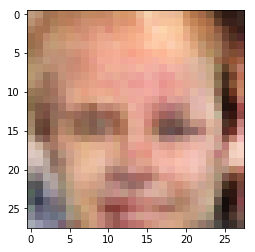

Epoch: 1/2.  Step: 4810.  Discriminator: 1.3683.  Generator: 0.9103.
Epoch: 1/2.  Step: 4820.  Discriminator: 1.3900.  Generator: 0.7012.
Epoch: 1/2.  Step: 4830.  Discriminator: 1.3518.  Generator: 0.7342.
Epoch: 1/2.  Step: 4840.  Discriminator: 1.4869.  Generator: 0.7911.
Epoch: 1/2.  Step: 4850.  Discriminator: 1.3547.  Generator: 0.8626.
Epoch: 1/2.  Step: 4860.  Discriminator: 1.5111.  Generator: 0.5530.
Epoch: 1/2.  Step: 4870.  Discriminator: 1.4545.  Generator: 0.6146.
Epoch: 1/2.  Step: 4880.  Discriminator: 1.4105.  Generator: 0.8527.
Epoch: 1/2.  Step: 4890.  Discriminator: 1.4500.  Generator: 0.8295.
Epoch: 1/2.  Step: 4900.  Discriminator: 1.5100.  Generator: 0.7653.


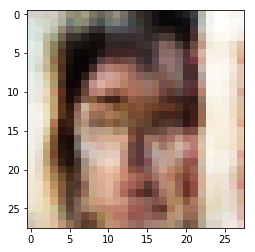

Epoch: 1/2.  Step: 4910.  Discriminator: 1.5099.  Generator: 0.7064.
Epoch: 1/2.  Step: 4920.  Discriminator: 1.4338.  Generator: 0.8324.
Epoch: 1/2.  Step: 4930.  Discriminator: 1.3907.  Generator: 0.7491.
Epoch: 1/2.  Step: 4940.  Discriminator: 1.4206.  Generator: 0.5628.
Epoch: 1/2.  Step: 4950.  Discriminator: 1.3794.  Generator: 0.6756.
Epoch: 1/2.  Step: 4960.  Discriminator: 1.4495.  Generator: 0.7914.
Epoch: 1/2.  Step: 4970.  Discriminator: 1.3875.  Generator: 0.7583.
Epoch: 1/2.  Step: 4980.  Discriminator: 1.5274.  Generator: 0.7246.
Epoch: 1/2.  Step: 4990.  Discriminator: 1.5295.  Generator: 0.7606.
Epoch: 1/2.  Step: 5000.  Discriminator: 1.4859.  Generator: 0.6067.


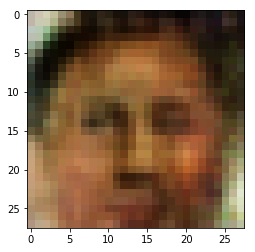

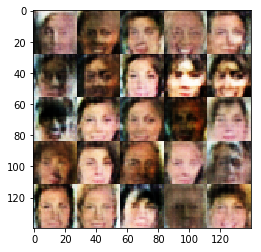

Epoch: 1/2.  Step: 5010.  Discriminator: 1.4428.  Generator: 0.7398.
Epoch: 1/2.  Step: 5020.  Discriminator: 1.4096.  Generator: 0.8494.
Epoch: 1/2.  Step: 5030.  Discriminator: 1.4218.  Generator: 0.8268.
Epoch: 1/2.  Step: 5040.  Discriminator: 1.4750.  Generator: 0.7832.
Epoch: 1/2.  Step: 5050.  Discriminator: 1.4445.  Generator: 0.5689.
Epoch: 1/2.  Step: 5060.  Discriminator: 1.3767.  Generator: 0.8003.
Epoch: 1/2.  Step: 5070.  Discriminator: 1.4690.  Generator: 0.8033.
Epoch: 1/2.  Step: 5080.  Discriminator: 1.4783.  Generator: 0.7961.
Epoch: 1/2.  Step: 5090.  Discriminator: 1.4408.  Generator: 0.8323.
Epoch: 1/2.  Step: 5100.  Discriminator: 1.3919.  Generator: 0.8049.


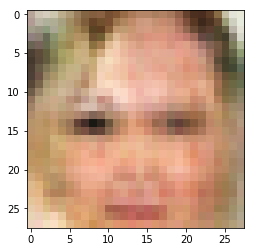

Epoch: 1/2.  Step: 5110.  Discriminator: 1.4336.  Generator: 0.7857.
Epoch: 1/2.  Step: 5120.  Discriminator: 1.3832.  Generator: 0.8463.
Epoch: 1/2.  Step: 5130.  Discriminator: 1.4940.  Generator: 0.7431.
Epoch: 1/2.  Step: 5140.  Discriminator: 1.4535.  Generator: 0.6376.
Epoch: 1/2.  Step: 5150.  Discriminator: 1.4246.  Generator: 1.0493.
Epoch: 1/2.  Step: 5160.  Discriminator: 1.4572.  Generator: 0.5931.
Epoch: 1/2.  Step: 5170.  Discriminator: 1.5574.  Generator: 0.7698.
Epoch: 1/2.  Step: 5180.  Discriminator: 1.5282.  Generator: 0.6410.
Epoch: 1/2.  Step: 5190.  Discriminator: 1.4857.  Generator: 0.8077.
Epoch: 1/2.  Step: 5200.  Discriminator: 1.5409.  Generator: 0.5916.


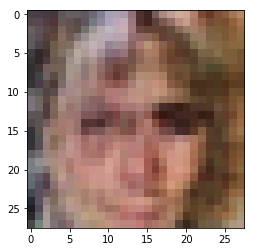

Epoch: 1/2.  Step: 5210.  Discriminator: 1.4730.  Generator: 0.8631.
Epoch: 1/2.  Step: 5220.  Discriminator: 1.4308.  Generator: 0.8845.
Epoch: 1/2.  Step: 5230.  Discriminator: 1.3884.  Generator: 0.7744.
Epoch: 1/2.  Step: 5240.  Discriminator: 1.4500.  Generator: 0.7415.
Epoch: 1/2.  Step: 5250.  Discriminator: 1.4237.  Generator: 0.8429.
Epoch: 1/2.  Step: 5260.  Discriminator: 1.4493.  Generator: 0.7779.
Epoch: 1/2.  Step: 5270.  Discriminator: 1.4813.  Generator: 0.6995.
Epoch: 1/2.  Step: 5280.  Discriminator: 1.4605.  Generator: 0.7960.
Epoch: 1/2.  Step: 5290.  Discriminator: 1.4080.  Generator: 0.6276.
Epoch: 1/2.  Step: 5300.  Discriminator: 1.4402.  Generator: 0.8650.


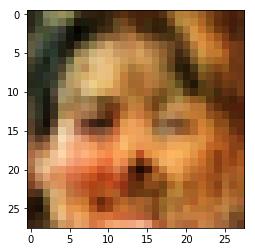

Epoch: 1/2.  Step: 5310.  Discriminator: 1.4099.  Generator: 1.0469.
Epoch: 1/2.  Step: 5320.  Discriminator: 1.4176.  Generator: 0.6213.
Epoch: 1/2.  Step: 5330.  Discriminator: 1.4341.  Generator: 0.7202.
Epoch: 1/2.  Step: 5340.  Discriminator: 1.4208.  Generator: 0.7144.
Epoch: 1/2.  Step: 5350.  Discriminator: 1.4484.  Generator: 0.7897.
Epoch: 1/2.  Step: 5360.  Discriminator: 1.4406.  Generator: 0.8936.
Epoch: 1/2.  Step: 5370.  Discriminator: 1.4878.  Generator: 0.8764.
Epoch: 1/2.  Step: 5380.  Discriminator: 1.5313.  Generator: 0.6274.
Epoch: 1/2.  Step: 5390.  Discriminator: 1.5813.  Generator: 0.6733.
Epoch: 1/2.  Step: 5400.  Discriminator: 1.4321.  Generator: 0.8058.


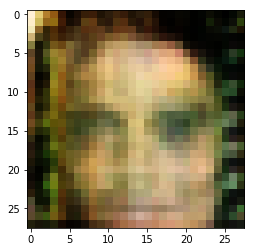

Epoch: 1/2.  Step: 5410.  Discriminator: 1.3785.  Generator: 0.7213.
Epoch: 1/2.  Step: 5420.  Discriminator: 1.4115.  Generator: 0.8822.
Epoch: 1/2.  Step: 5430.  Discriminator: 1.4372.  Generator: 0.6363.
Epoch: 1/2.  Step: 5440.  Discriminator: 1.3943.  Generator: 0.8326.
Epoch: 1/2.  Step: 5450.  Discriminator: 1.4218.  Generator: 0.7209.
Epoch: 1/2.  Step: 5460.  Discriminator: 1.4650.  Generator: 0.7529.
Epoch: 1/2.  Step: 5470.  Discriminator: 1.4236.  Generator: 0.7259.
Epoch: 1/2.  Step: 5480.  Discriminator: 1.4704.  Generator: 0.5572.
Epoch: 1/2.  Step: 5490.  Discriminator: 1.4657.  Generator: 0.6577.
Epoch: 1/2.  Step: 5500.  Discriminator: 1.4057.  Generator: 0.8780.


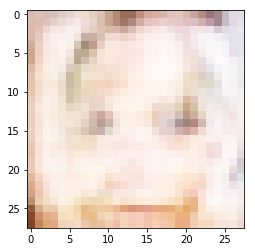

Epoch: 1/2.  Step: 5510.  Discriminator: 1.3968.  Generator: 0.7979.
Epoch: 1/2.  Step: 5520.  Discriminator: 1.4259.  Generator: 0.8005.
Epoch: 1/2.  Step: 5530.  Discriminator: 1.4536.  Generator: 0.7718.
Epoch: 1/2.  Step: 5540.  Discriminator: 1.4086.  Generator: 0.8245.
Epoch: 1/2.  Step: 5550.  Discriminator: 1.5355.  Generator: 0.7023.
Epoch: 1/2.  Step: 5560.  Discriminator: 1.4793.  Generator: 0.6663.
Epoch: 1/2.  Step: 5570.  Discriminator: 1.4797.  Generator: 0.7532.
Epoch: 1/2.  Step: 5580.  Discriminator: 1.4270.  Generator: 0.7967.
Epoch: 1/2.  Step: 5590.  Discriminator: 1.3687.  Generator: 0.8175.
Epoch: 1/2.  Step: 5600.  Discriminator: 1.4294.  Generator: 0.8017.


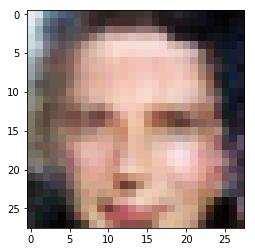

Epoch: 1/2.  Step: 5610.  Discriminator: 1.3637.  Generator: 0.7127.
Epoch: 1/2.  Step: 5620.  Discriminator: 1.3991.  Generator: 0.8582.
Epoch: 1/2.  Step: 5630.  Discriminator: 1.5190.  Generator: 0.6923.
Epoch: 1/2.  Step: 5640.  Discriminator: 1.3920.  Generator: 0.8347.
Epoch: 1/2.  Step: 5650.  Discriminator: 1.3894.  Generator: 0.8091.
Epoch: 1/2.  Step: 5660.  Discriminator: 1.4231.  Generator: 0.7188.
Epoch: 1/2.  Step: 5670.  Discriminator: 1.4447.  Generator: 0.7899.
Epoch: 1/2.  Step: 5680.  Discriminator: 1.5270.  Generator: 0.7311.
Epoch: 1/2.  Step: 5690.  Discriminator: 1.3808.  Generator: 0.9057.
Epoch: 1/2.  Step: 5700.  Discriminator: 1.4438.  Generator: 0.7389.


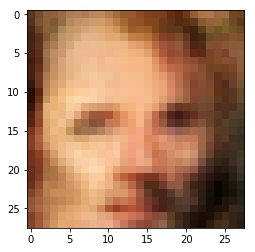

Epoch: 1/2.  Step: 5710.  Discriminator: 1.4849.  Generator: 0.9603.
Epoch: 1/2.  Step: 5720.  Discriminator: 1.4003.  Generator: 0.8393.
Epoch: 1/2.  Step: 5730.  Discriminator: 1.4911.  Generator: 0.9264.
Epoch: 1/2.  Step: 5740.  Discriminator: 1.4313.  Generator: 0.7791.
Epoch: 1/2.  Step: 5750.  Discriminator: 1.4592.  Generator: 0.6825.
Epoch: 1/2.  Step: 5760.  Discriminator: 1.4383.  Generator: 0.6997.
Epoch: 1/2.  Step: 5770.  Discriminator: 1.5442.  Generator: 0.6477.
Epoch: 1/2.  Step: 5780.  Discriminator: 1.4394.  Generator: 0.7076.
Epoch: 1/2.  Step: 5790.  Discriminator: 1.4451.  Generator: 0.8244.
Epoch: 1/2.  Step: 5800.  Discriminator: 1.4777.  Generator: 0.7766.


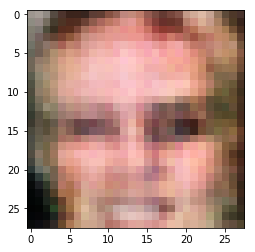

Epoch: 1/2.  Step: 5810.  Discriminator: 1.4149.  Generator: 0.7372.
Epoch: 1/2.  Step: 5820.  Discriminator: 1.4792.  Generator: 0.7341.
Epoch: 1/2.  Step: 5830.  Discriminator: 1.5032.  Generator: 0.6421.
Epoch: 1/2.  Step: 5840.  Discriminator: 1.4294.  Generator: 0.8099.
Epoch: 1/2.  Step: 5850.  Discriminator: 1.4111.  Generator: 0.9127.
Epoch: 1/2.  Step: 5860.  Discriminator: 1.3673.  Generator: 0.7909.
Epoch: 1/2.  Step: 5870.  Discriminator: 1.5649.  Generator: 1.0463.
Epoch: 1/2.  Step: 5880.  Discriminator: 1.4361.  Generator: 0.8587.
Epoch: 1/2.  Step: 5890.  Discriminator: 1.4085.  Generator: 0.6834.
Epoch: 1/2.  Step: 5900.  Discriminator: 1.3787.  Generator: 0.7651.


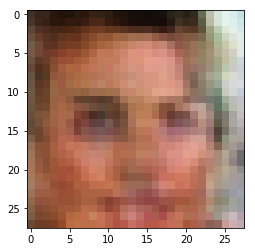

Epoch: 1/2.  Step: 5910.  Discriminator: 1.5721.  Generator: 0.5976.
Epoch: 1/2.  Step: 5920.  Discriminator: 1.4729.  Generator: 0.6979.
Epoch: 1/2.  Step: 5930.  Discriminator: 1.4439.  Generator: 0.7015.
Epoch: 1/2.  Step: 5940.  Discriminator: 1.5125.  Generator: 1.0108.
Epoch: 1/2.  Step: 5950.  Discriminator: 1.4738.  Generator: 0.6492.
Epoch: 1/2.  Step: 5960.  Discriminator: 1.3693.  Generator: 0.9113.
Epoch: 1/2.  Step: 5970.  Discriminator: 1.4587.  Generator: 0.7810.
Epoch: 1/2.  Step: 5980.  Discriminator: 1.4236.  Generator: 0.6417.
Epoch: 1/2.  Step: 5990.  Discriminator: 1.4267.  Generator: 0.8167.
Epoch: 1/2.  Step: 6000.  Discriminator: 1.3606.  Generator: 0.7707.


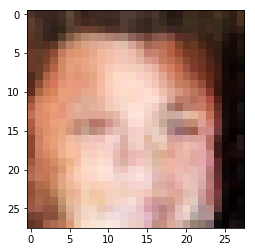

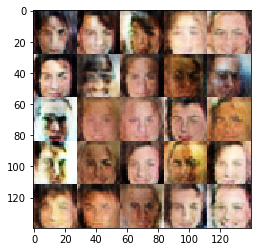

Epoch: 1/2.  Step: 6010.  Discriminator: 1.4101.  Generator: 0.8098.
Epoch: 1/2.  Step: 6020.  Discriminator: 1.4064.  Generator: 0.7562.
Epoch: 1/2.  Step: 6030.  Discriminator: 1.4358.  Generator: 0.8092.
Epoch: 1/2.  Step: 6040.  Discriminator: 1.4411.  Generator: 0.8528.
Epoch: 1/2.  Step: 6050.  Discriminator: 1.4724.  Generator: 0.6221.
Epoch: 1/2.  Step: 6060.  Discriminator: 1.4235.  Generator: 0.9164.
Epoch: 1/2.  Step: 6070.  Discriminator: 1.4418.  Generator: 0.7312.
Epoch: 1/2.  Step: 6080.  Discriminator: 1.4580.  Generator: 0.8076.
Epoch: 1/2.  Step: 6090.  Discriminator: 1.4825.  Generator: 0.6414.
Epoch: 1/2.  Step: 6100.  Discriminator: 1.3793.  Generator: 0.8128.


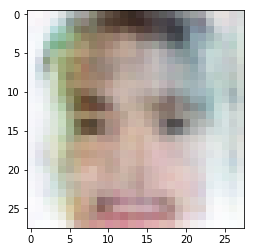

Epoch: 1/2.  Step: 6110.  Discriminator: 1.4979.  Generator: 0.7034.
Epoch: 1/2.  Step: 6120.  Discriminator: 1.4498.  Generator: 0.6755.
Epoch: 1/2.  Step: 6130.  Discriminator: 1.3924.  Generator: 0.7909.
Epoch: 1/2.  Step: 6140.  Discriminator: 1.4793.  Generator: 0.9383.
Epoch: 1/2.  Step: 6150.  Discriminator: 1.4408.  Generator: 0.7851.
Epoch: 1/2.  Step: 6160.  Discriminator: 1.4204.  Generator: 0.9765.
Epoch: 1/2.  Step: 6170.  Discriminator: 1.4544.  Generator: 0.7231.
Epoch: 1/2.  Step: 6180.  Discriminator: 1.4475.  Generator: 0.7838.
Epoch: 1/2.  Step: 6190.  Discriminator: 1.4127.  Generator: 0.8587.
Epoch: 1/2.  Step: 6200.  Discriminator: 1.4850.  Generator: 0.9165.


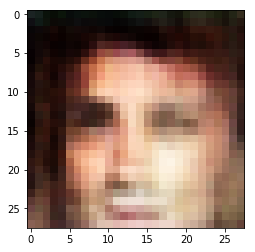

Epoch: 1/2.  Step: 6210.  Discriminator: 1.3980.  Generator: 0.7333.
Epoch: 1/2.  Step: 6220.  Discriminator: 1.4080.  Generator: 0.6835.
Epoch: 1/2.  Step: 6230.  Discriminator: 1.4520.  Generator: 0.6940.
Epoch: 1/2.  Step: 6240.  Discriminator: 1.5022.  Generator: 0.7380.
Epoch: 1/2.  Step: 6250.  Discriminator: 1.4115.  Generator: 0.7102.
Epoch: 1/2.  Step: 6260.  Discriminator: 1.3850.  Generator: 0.7508.
Epoch: 1/2.  Step: 6270.  Discriminator: 1.4256.  Generator: 0.7999.
Epoch: 1/2.  Step: 6280.  Discriminator: 1.4423.  Generator: 0.7254.
Epoch: 1/2.  Step: 6290.  Discriminator: 1.4315.  Generator: 0.7576.
Epoch: 1/2.  Step: 6300.  Discriminator: 1.4019.  Generator: 0.9347.


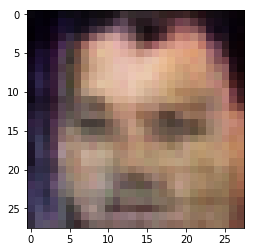

Epoch: 1/2.  Step: 6310.  Discriminator: 1.3804.  Generator: 0.8005.
Epoch: 1/2.  Step: 6320.  Discriminator: 1.4651.  Generator: 0.8452.
Epoch: 1/2.  Step: 6330.  Discriminator: 1.4768.  Generator: 0.7446.
Epoch: 2/2.  Step: 6340.  Discriminator: 1.4785.  Generator: 0.8549.
Epoch: 2/2.  Step: 6350.  Discriminator: 1.3867.  Generator: 0.6456.
Epoch: 2/2.  Step: 6360.  Discriminator: 1.3988.  Generator: 0.7836.
Epoch: 2/2.  Step: 6370.  Discriminator: 1.3898.  Generator: 0.7645.
Epoch: 2/2.  Step: 6380.  Discriminator: 1.5070.  Generator: 0.8489.
Epoch: 2/2.  Step: 6390.  Discriminator: 1.4116.  Generator: 0.8290.
Epoch: 2/2.  Step: 6400.  Discriminator: 1.4475.  Generator: 0.7745.


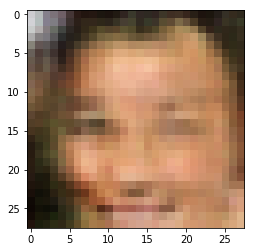

Epoch: 2/2.  Step: 6410.  Discriminator: 1.4727.  Generator: 0.7557.
Epoch: 2/2.  Step: 6420.  Discriminator: 1.4627.  Generator: 0.6350.
Epoch: 2/2.  Step: 6430.  Discriminator: 1.4570.  Generator: 0.8742.
Epoch: 2/2.  Step: 6440.  Discriminator: 1.6005.  Generator: 0.5767.
Epoch: 2/2.  Step: 6450.  Discriminator: 1.3923.  Generator: 0.7939.
Epoch: 2/2.  Step: 6460.  Discriminator: 1.4887.  Generator: 0.9106.
Epoch: 2/2.  Step: 6470.  Discriminator: 1.4332.  Generator: 0.8254.
Epoch: 2/2.  Step: 6480.  Discriminator: 1.3835.  Generator: 0.7651.
Epoch: 2/2.  Step: 6490.  Discriminator: 1.3741.  Generator: 0.7829.
Epoch: 2/2.  Step: 6500.  Discriminator: 1.4046.  Generator: 0.7230.


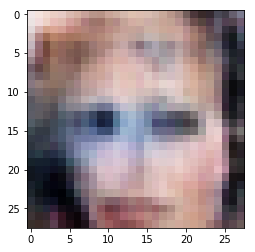

Epoch: 2/2.  Step: 6510.  Discriminator: 1.5176.  Generator: 0.8990.
Epoch: 2/2.  Step: 6520.  Discriminator: 1.4199.  Generator: 0.7772.
Epoch: 2/2.  Step: 6530.  Discriminator: 1.4626.  Generator: 0.7632.
Epoch: 2/2.  Step: 6540.  Discriminator: 1.3856.  Generator: 0.8471.
Epoch: 2/2.  Step: 6550.  Discriminator: 1.4699.  Generator: 0.8114.
Epoch: 2/2.  Step: 6560.  Discriminator: 1.4274.  Generator: 0.7522.
Epoch: 2/2.  Step: 6570.  Discriminator: 1.5283.  Generator: 0.6797.
Epoch: 2/2.  Step: 6580.  Discriminator: 1.4037.  Generator: 0.8642.
Epoch: 2/2.  Step: 6590.  Discriminator: 1.3319.  Generator: 0.6932.
Epoch: 2/2.  Step: 6600.  Discriminator: 1.4616.  Generator: 0.6269.


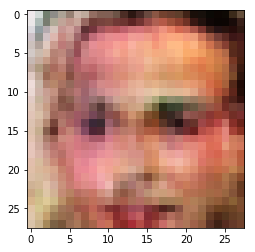

Epoch: 2/2.  Step: 6610.  Discriminator: 1.4574.  Generator: 0.7733.
Epoch: 2/2.  Step: 6620.  Discriminator: 1.4617.  Generator: 0.7584.
Epoch: 2/2.  Step: 6630.  Discriminator: 1.4532.  Generator: 0.7654.
Epoch: 2/2.  Step: 6640.  Discriminator: 1.4342.  Generator: 0.7442.
Epoch: 2/2.  Step: 6650.  Discriminator: 1.4898.  Generator: 0.6987.
Epoch: 2/2.  Step: 6660.  Discriminator: 1.4108.  Generator: 0.7799.
Epoch: 2/2.  Step: 6670.  Discriminator: 1.4665.  Generator: 0.6887.
Epoch: 2/2.  Step: 6680.  Discriminator: 1.3546.  Generator: 0.6908.
Epoch: 2/2.  Step: 6690.  Discriminator: 1.5015.  Generator: 0.7078.
Epoch: 2/2.  Step: 6700.  Discriminator: 1.5155.  Generator: 0.6243.


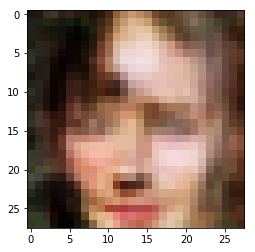

Epoch: 2/2.  Step: 6710.  Discriminator: 1.4402.  Generator: 0.7567.
Epoch: 2/2.  Step: 6720.  Discriminator: 1.3857.  Generator: 0.8169.
Epoch: 2/2.  Step: 6730.  Discriminator: 1.4114.  Generator: 0.8059.
Epoch: 2/2.  Step: 6740.  Discriminator: 1.4975.  Generator: 0.6694.
Epoch: 2/2.  Step: 6750.  Discriminator: 1.4015.  Generator: 0.8892.
Epoch: 2/2.  Step: 6760.  Discriminator: 1.3930.  Generator: 0.7707.
Epoch: 2/2.  Step: 6770.  Discriminator: 1.5181.  Generator: 0.7979.
Epoch: 2/2.  Step: 6780.  Discriminator: 1.5373.  Generator: 0.7933.
Epoch: 2/2.  Step: 6790.  Discriminator: 1.4227.  Generator: 0.5833.
Epoch: 2/2.  Step: 6800.  Discriminator: 1.4334.  Generator: 0.8631.


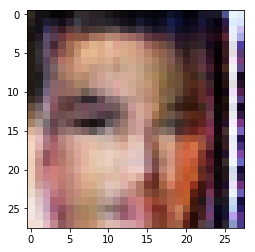

Epoch: 2/2.  Step: 6810.  Discriminator: 1.5277.  Generator: 0.6429.
Epoch: 2/2.  Step: 6820.  Discriminator: 1.4303.  Generator: 0.7875.
Epoch: 2/2.  Step: 6830.  Discriminator: 1.3876.  Generator: 0.6457.
Epoch: 2/2.  Step: 6840.  Discriminator: 1.4338.  Generator: 0.5685.
Epoch: 2/2.  Step: 6850.  Discriminator: 1.4249.  Generator: 0.8697.
Epoch: 2/2.  Step: 6860.  Discriminator: 1.4346.  Generator: 0.6996.
Epoch: 2/2.  Step: 6870.  Discriminator: 1.5291.  Generator: 0.7183.
Epoch: 2/2.  Step: 6880.  Discriminator: 1.4004.  Generator: 0.7442.
Epoch: 2/2.  Step: 6890.  Discriminator: 1.4330.  Generator: 0.7099.
Epoch: 2/2.  Step: 6900.  Discriminator: 1.4410.  Generator: 0.7940.


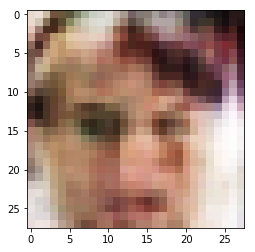

Epoch: 2/2.  Step: 6910.  Discriminator: 1.4219.  Generator: 0.7835.
Epoch: 2/2.  Step: 6920.  Discriminator: 1.4345.  Generator: 0.7129.
Epoch: 2/2.  Step: 6930.  Discriminator: 1.5161.  Generator: 1.2304.
Epoch: 2/2.  Step: 6940.  Discriminator: 1.4043.  Generator: 0.7859.
Epoch: 2/2.  Step: 6950.  Discriminator: 1.4523.  Generator: 0.8254.
Epoch: 2/2.  Step: 6960.  Discriminator: 1.4203.  Generator: 0.6653.
Epoch: 2/2.  Step: 6970.  Discriminator: 1.4298.  Generator: 0.8082.
Epoch: 2/2.  Step: 6980.  Discriminator: 1.4474.  Generator: 0.8286.
Epoch: 2/2.  Step: 6990.  Discriminator: 1.4061.  Generator: 0.6993.
Epoch: 2/2.  Step: 7000.  Discriminator: 1.5027.  Generator: 0.8047.


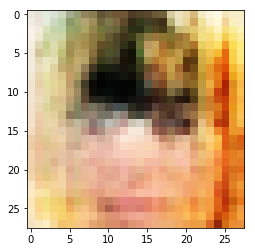

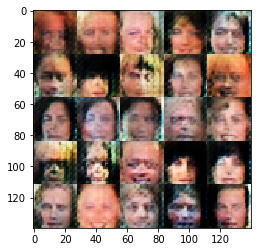

Epoch: 2/2.  Step: 7010.  Discriminator: 1.4580.  Generator: 0.7677.
Epoch: 2/2.  Step: 7020.  Discriminator: 1.4495.  Generator: 0.7311.
Epoch: 2/2.  Step: 7030.  Discriminator: 1.4536.  Generator: 0.7635.
Epoch: 2/2.  Step: 7040.  Discriminator: 1.4208.  Generator: 0.8021.
Epoch: 2/2.  Step: 7050.  Discriminator: 1.4215.  Generator: 0.6785.
Epoch: 2/2.  Step: 7060.  Discriminator: 1.4632.  Generator: 0.6743.
Epoch: 2/2.  Step: 7070.  Discriminator: 1.4272.  Generator: 0.8505.
Epoch: 2/2.  Step: 7080.  Discriminator: 1.4292.  Generator: 0.7393.
Epoch: 2/2.  Step: 7090.  Discriminator: 1.3769.  Generator: 0.8728.
Epoch: 2/2.  Step: 7100.  Discriminator: 1.4022.  Generator: 0.7684.


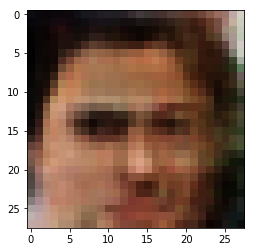

Epoch: 2/2.  Step: 7110.  Discriminator: 1.4197.  Generator: 0.6209.
Epoch: 2/2.  Step: 7120.  Discriminator: 1.4305.  Generator: 0.8169.
Epoch: 2/2.  Step: 7130.  Discriminator: 1.6018.  Generator: 0.5338.
Epoch: 2/2.  Step: 7140.  Discriminator: 1.4331.  Generator: 0.9026.
Epoch: 2/2.  Step: 7150.  Discriminator: 1.4352.  Generator: 0.7277.
Epoch: 2/2.  Step: 7160.  Discriminator: 1.4134.  Generator: 0.7242.
Epoch: 2/2.  Step: 7170.  Discriminator: 1.4724.  Generator: 0.8793.
Epoch: 2/2.  Step: 7180.  Discriminator: 1.4850.  Generator: 0.7746.
Epoch: 2/2.  Step: 7190.  Discriminator: 1.4164.  Generator: 0.6170.
Epoch: 2/2.  Step: 7200.  Discriminator: 1.4533.  Generator: 0.7471.


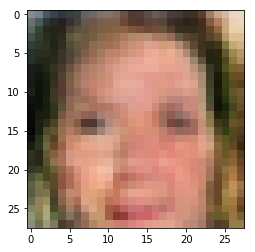

Epoch: 2/2.  Step: 7210.  Discriminator: 1.4045.  Generator: 0.8462.
Epoch: 2/2.  Step: 7220.  Discriminator: 1.4918.  Generator: 0.8450.
Epoch: 2/2.  Step: 7230.  Discriminator: 1.4595.  Generator: 0.7048.
Epoch: 2/2.  Step: 7240.  Discriminator: 1.3842.  Generator: 0.8678.
Epoch: 2/2.  Step: 7250.  Discriminator: 1.4099.  Generator: 0.8171.
Epoch: 2/2.  Step: 7260.  Discriminator: 1.3780.  Generator: 0.7605.
Epoch: 2/2.  Step: 7270.  Discriminator: 1.4477.  Generator: 0.9170.
Epoch: 2/2.  Step: 7280.  Discriminator: 1.3498.  Generator: 0.9090.
Epoch: 2/2.  Step: 7290.  Discriminator: 1.4238.  Generator: 0.8003.
Epoch: 2/2.  Step: 7300.  Discriminator: 1.4626.  Generator: 0.7775.


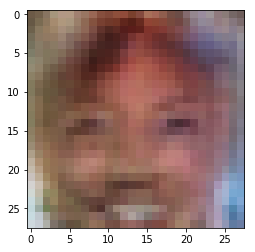

Epoch: 2/2.  Step: 7310.  Discriminator: 1.4802.  Generator: 0.8055.
Epoch: 2/2.  Step: 7320.  Discriminator: 1.4486.  Generator: 0.7263.
Epoch: 2/2.  Step: 7330.  Discriminator: 1.4640.  Generator: 0.6757.
Epoch: 2/2.  Step: 7340.  Discriminator: 1.4364.  Generator: 0.8172.
Epoch: 2/2.  Step: 7350.  Discriminator: 1.4428.  Generator: 0.7957.
Epoch: 2/2.  Step: 7360.  Discriminator: 1.5952.  Generator: 0.4192.
Epoch: 2/2.  Step: 7370.  Discriminator: 1.4327.  Generator: 0.8197.
Epoch: 2/2.  Step: 7380.  Discriminator: 1.4293.  Generator: 0.6935.
Epoch: 2/2.  Step: 7390.  Discriminator: 1.4470.  Generator: 0.6666.
Epoch: 2/2.  Step: 7400.  Discriminator: 1.4354.  Generator: 0.7001.


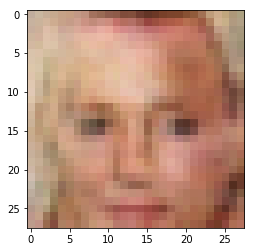

Epoch: 2/2.  Step: 7410.  Discriminator: 1.4079.  Generator: 0.7022.
Epoch: 2/2.  Step: 7420.  Discriminator: 1.4840.  Generator: 0.6589.
Epoch: 2/2.  Step: 7430.  Discriminator: 1.4722.  Generator: 0.7450.
Epoch: 2/2.  Step: 7440.  Discriminator: 1.3954.  Generator: 0.7222.
Epoch: 2/2.  Step: 7450.  Discriminator: 1.6387.  Generator: 0.7549.
Epoch: 2/2.  Step: 7460.  Discriminator: 1.4199.  Generator: 0.7732.
Epoch: 2/2.  Step: 7470.  Discriminator: 1.5175.  Generator: 0.6840.
Epoch: 2/2.  Step: 7480.  Discriminator: 1.4710.  Generator: 0.7951.
Epoch: 2/2.  Step: 7490.  Discriminator: 1.4161.  Generator: 0.7229.
Epoch: 2/2.  Step: 7500.  Discriminator: 1.4522.  Generator: 0.7361.


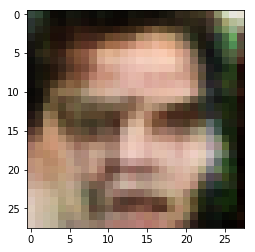

Epoch: 2/2.  Step: 7510.  Discriminator: 1.4183.  Generator: 0.7846.
Epoch: 2/2.  Step: 7520.  Discriminator: 1.3512.  Generator: 0.7462.
Epoch: 2/2.  Step: 7530.  Discriminator: 1.3860.  Generator: 0.9035.
Epoch: 2/2.  Step: 7540.  Discriminator: 1.4061.  Generator: 0.6699.
Epoch: 2/2.  Step: 7550.  Discriminator: 1.4484.  Generator: 0.7244.
Epoch: 2/2.  Step: 7560.  Discriminator: 1.4844.  Generator: 0.6413.
Epoch: 2/2.  Step: 7570.  Discriminator: 1.3243.  Generator: 0.7437.
Epoch: 2/2.  Step: 7580.  Discriminator: 1.4331.  Generator: 0.7315.
Epoch: 2/2.  Step: 7590.  Discriminator: 1.4545.  Generator: 0.7705.
Epoch: 2/2.  Step: 7600.  Discriminator: 1.3456.  Generator: 0.8478.


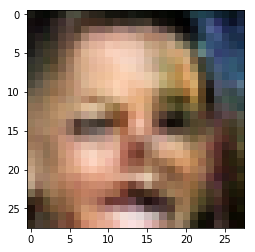

Epoch: 2/2.  Step: 7610.  Discriminator: 1.4686.  Generator: 0.9118.
Epoch: 2/2.  Step: 7620.  Discriminator: 1.4054.  Generator: 0.6610.
Epoch: 2/2.  Step: 7630.  Discriminator: 1.4733.  Generator: 0.8872.
Epoch: 2/2.  Step: 7640.  Discriminator: 1.4579.  Generator: 0.7591.
Epoch: 2/2.  Step: 7650.  Discriminator: 1.4420.  Generator: 0.8133.
Epoch: 2/2.  Step: 7660.  Discriminator: 1.5102.  Generator: 0.5791.
Epoch: 2/2.  Step: 7670.  Discriminator: 1.3712.  Generator: 0.8545.
Epoch: 2/2.  Step: 7680.  Discriminator: 1.3950.  Generator: 0.6888.
Epoch: 2/2.  Step: 7690.  Discriminator: 1.4559.  Generator: 0.8372.
Epoch: 2/2.  Step: 7700.  Discriminator: 1.4184.  Generator: 0.7988.


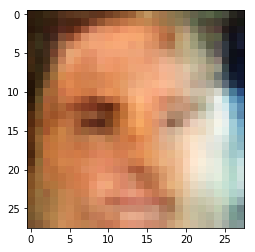

Epoch: 2/2.  Step: 7710.  Discriminator: 1.4403.  Generator: 0.7875.
Epoch: 2/2.  Step: 7720.  Discriminator: 1.4321.  Generator: 0.6791.
Epoch: 2/2.  Step: 7730.  Discriminator: 1.5489.  Generator: 0.7505.
Epoch: 2/2.  Step: 7740.  Discriminator: 1.3925.  Generator: 0.7477.
Epoch: 2/2.  Step: 7750.  Discriminator: 1.4427.  Generator: 0.8923.
Epoch: 2/2.  Step: 7760.  Discriminator: 1.4319.  Generator: 0.7669.
Epoch: 2/2.  Step: 7770.  Discriminator: 1.3832.  Generator: 0.6901.
Epoch: 2/2.  Step: 7780.  Discriminator: 1.5367.  Generator: 0.6824.
Epoch: 2/2.  Step: 7790.  Discriminator: 1.4881.  Generator: 0.7875.
Epoch: 2/2.  Step: 7800.  Discriminator: 1.4840.  Generator: 0.6678.


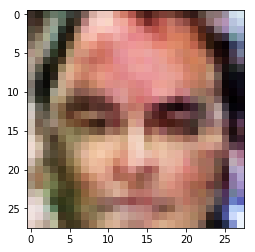

Epoch: 2/2.  Step: 7810.  Discriminator: 1.4011.  Generator: 0.5806.
Epoch: 2/2.  Step: 7820.  Discriminator: 1.3663.  Generator: 0.7484.
Epoch: 2/2.  Step: 7830.  Discriminator: 1.4216.  Generator: 0.8585.
Epoch: 2/2.  Step: 7840.  Discriminator: 1.3856.  Generator: 0.7814.
Epoch: 2/2.  Step: 7850.  Discriminator: 1.5110.  Generator: 0.8710.
Epoch: 2/2.  Step: 7860.  Discriminator: 1.3734.  Generator: 0.8802.
Epoch: 2/2.  Step: 7870.  Discriminator: 1.4154.  Generator: 0.8990.
Epoch: 2/2.  Step: 7880.  Discriminator: 1.4096.  Generator: 0.8254.
Epoch: 2/2.  Step: 7890.  Discriminator: 1.4710.  Generator: 0.8163.
Epoch: 2/2.  Step: 7900.  Discriminator: 1.3973.  Generator: 0.7307.


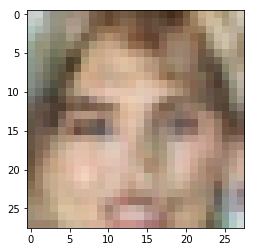

Epoch: 2/2.  Step: 7910.  Discriminator: 1.4446.  Generator: 0.8012.
Epoch: 2/2.  Step: 7920.  Discriminator: 1.4308.  Generator: 0.8851.
Epoch: 2/2.  Step: 7930.  Discriminator: 1.4192.  Generator: 0.8306.
Epoch: 2/2.  Step: 7940.  Discriminator: 1.3839.  Generator: 0.6408.
Epoch: 2/2.  Step: 7950.  Discriminator: 1.4889.  Generator: 0.8119.
Epoch: 2/2.  Step: 7960.  Discriminator: 1.5761.  Generator: 0.5631.
Epoch: 2/2.  Step: 7970.  Discriminator: 1.4163.  Generator: 0.8521.
Epoch: 2/2.  Step: 7980.  Discriminator: 1.4993.  Generator: 0.5758.
Epoch: 2/2.  Step: 7990.  Discriminator: 1.4443.  Generator: 0.7177.
Epoch: 2/2.  Step: 8000.  Discriminator: 1.4253.  Generator: 0.7438.


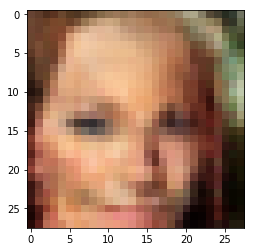

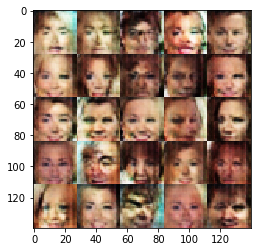

Epoch: 2/2.  Step: 8010.  Discriminator: 1.4925.  Generator: 0.8256.
Epoch: 2/2.  Step: 8020.  Discriminator: 1.4089.  Generator: 0.7646.
Epoch: 2/2.  Step: 8030.  Discriminator: 1.4513.  Generator: 0.6883.
Epoch: 2/2.  Step: 8040.  Discriminator: 1.4627.  Generator: 0.6848.
Epoch: 2/2.  Step: 8050.  Discriminator: 1.4714.  Generator: 0.7050.
Epoch: 2/2.  Step: 8060.  Discriminator: 1.3797.  Generator: 0.7774.
Epoch: 2/2.  Step: 8070.  Discriminator: 1.4190.  Generator: 0.5585.
Epoch: 2/2.  Step: 8080.  Discriminator: 1.4302.  Generator: 0.8737.
Epoch: 2/2.  Step: 8090.  Discriminator: 1.3902.  Generator: 0.8132.
Epoch: 2/2.  Step: 8100.  Discriminator: 1.4105.  Generator: 0.8068.


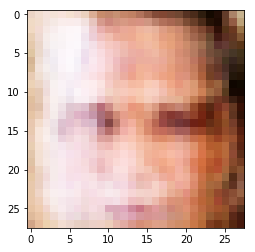

Epoch: 2/2.  Step: 8110.  Discriminator: 1.4679.  Generator: 0.9749.
Epoch: 2/2.  Step: 8120.  Discriminator: 1.3592.  Generator: 0.7850.
Epoch: 2/2.  Step: 8130.  Discriminator: 1.3861.  Generator: 0.8425.
Epoch: 2/2.  Step: 8140.  Discriminator: 1.3905.  Generator: 0.7947.
Epoch: 2/2.  Step: 8150.  Discriminator: 1.4907.  Generator: 0.6190.
Epoch: 2/2.  Step: 8160.  Discriminator: 1.4635.  Generator: 0.6870.
Epoch: 2/2.  Step: 8170.  Discriminator: 1.4276.  Generator: 0.7626.
Epoch: 2/2.  Step: 8180.  Discriminator: 1.4627.  Generator: 0.7381.
Epoch: 2/2.  Step: 8190.  Discriminator: 1.4119.  Generator: 0.8530.
Epoch: 2/2.  Step: 8200.  Discriminator: 1.4359.  Generator: 0.7846.


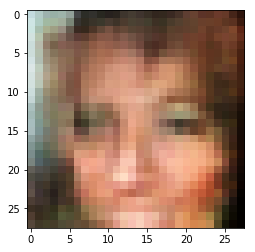

Epoch: 2/2.  Step: 8210.  Discriminator: 1.3807.  Generator: 0.6433.
Epoch: 2/2.  Step: 8220.  Discriminator: 1.4353.  Generator: 0.9919.
Epoch: 2/2.  Step: 8230.  Discriminator: 1.3797.  Generator: 0.7620.
Epoch: 2/2.  Step: 8240.  Discriminator: 1.5278.  Generator: 0.6019.
Epoch: 2/2.  Step: 8250.  Discriminator: 1.4172.  Generator: 0.8807.
Epoch: 2/2.  Step: 8260.  Discriminator: 1.4126.  Generator: 0.9050.
Epoch: 2/2.  Step: 8270.  Discriminator: 1.4230.  Generator: 0.8634.
Epoch: 2/2.  Step: 8280.  Discriminator: 1.4600.  Generator: 0.6993.
Epoch: 2/2.  Step: 8290.  Discriminator: 1.4088.  Generator: 0.8120.
Epoch: 2/2.  Step: 8300.  Discriminator: 1.4421.  Generator: 0.7864.


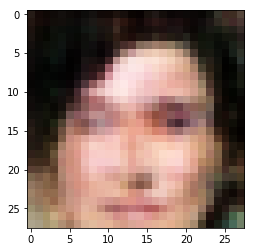

Epoch: 2/2.  Step: 8310.  Discriminator: 1.4336.  Generator: 0.6841.
Epoch: 2/2.  Step: 8320.  Discriminator: 1.4547.  Generator: 0.7982.
Epoch: 2/2.  Step: 8330.  Discriminator: 1.4017.  Generator: 0.8438.
Epoch: 2/2.  Step: 8340.  Discriminator: 1.3893.  Generator: 0.8121.
Epoch: 2/2.  Step: 8350.  Discriminator: 1.3970.  Generator: 0.7102.
Epoch: 2/2.  Step: 8360.  Discriminator: 1.4831.  Generator: 0.7526.
Epoch: 2/2.  Step: 8370.  Discriminator: 1.3624.  Generator: 0.6664.
Epoch: 2/2.  Step: 8380.  Discriminator: 1.4662.  Generator: 0.7489.
Epoch: 2/2.  Step: 8390.  Discriminator: 1.4735.  Generator: 0.6473.
Epoch: 2/2.  Step: 8400.  Discriminator: 1.4524.  Generator: 0.7766.


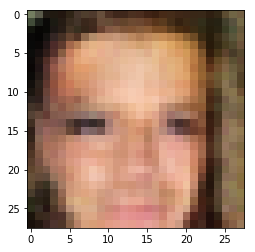

Epoch: 2/2.  Step: 8410.  Discriminator: 1.3798.  Generator: 0.8348.
Epoch: 2/2.  Step: 8420.  Discriminator: 1.3687.  Generator: 0.8031.
Epoch: 2/2.  Step: 8430.  Discriminator: 1.4421.  Generator: 0.6754.
Epoch: 2/2.  Step: 8440.  Discriminator: 1.4584.  Generator: 0.7388.
Epoch: 2/2.  Step: 8450.  Discriminator: 1.4276.  Generator: 0.8062.
Epoch: 2/2.  Step: 8460.  Discriminator: 1.3736.  Generator: 0.6890.
Epoch: 2/2.  Step: 8470.  Discriminator: 1.4484.  Generator: 0.7540.
Epoch: 2/2.  Step: 8480.  Discriminator: 1.4365.  Generator: 0.9286.
Epoch: 2/2.  Step: 8490.  Discriminator: 1.5327.  Generator: 0.5847.
Epoch: 2/2.  Step: 8500.  Discriminator: 1.3898.  Generator: 0.8370.


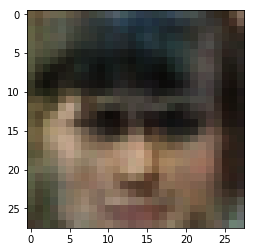

Epoch: 2/2.  Step: 8510.  Discriminator: 1.4377.  Generator: 0.7391.
Epoch: 2/2.  Step: 8520.  Discriminator: 1.4991.  Generator: 0.7623.
Epoch: 2/2.  Step: 8530.  Discriminator: 1.4109.  Generator: 0.7409.
Epoch: 2/2.  Step: 8540.  Discriminator: 1.3523.  Generator: 0.7154.
Epoch: 2/2.  Step: 8550.  Discriminator: 1.4391.  Generator: 0.8458.
Epoch: 2/2.  Step: 8560.  Discriminator: 1.4740.  Generator: 0.7201.
Epoch: 2/2.  Step: 8570.  Discriminator: 1.3601.  Generator: 0.7376.
Epoch: 2/2.  Step: 8580.  Discriminator: 1.3910.  Generator: 0.8941.
Epoch: 2/2.  Step: 8590.  Discriminator: 1.5039.  Generator: 0.9454.
Epoch: 2/2.  Step: 8600.  Discriminator: 1.3915.  Generator: 0.6305.


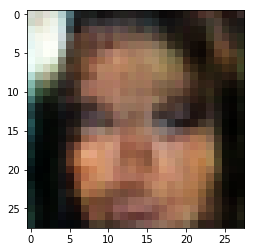

Epoch: 2/2.  Step: 8610.  Discriminator: 1.4069.  Generator: 0.7305.
Epoch: 2/2.  Step: 8620.  Discriminator: 1.4647.  Generator: 0.7607.
Epoch: 2/2.  Step: 8630.  Discriminator: 1.4708.  Generator: 0.8215.
Epoch: 2/2.  Step: 8640.  Discriminator: 1.3835.  Generator: 0.7506.
Epoch: 2/2.  Step: 8650.  Discriminator: 1.4541.  Generator: 0.7935.
Epoch: 2/2.  Step: 8660.  Discriminator: 1.3720.  Generator: 0.7790.
Epoch: 2/2.  Step: 8670.  Discriminator: 1.3901.  Generator: 0.7645.
Epoch: 2/2.  Step: 8680.  Discriminator: 1.3489.  Generator: 0.8918.
Epoch: 2/2.  Step: 8690.  Discriminator: 1.4293.  Generator: 0.6472.
Epoch: 2/2.  Step: 8700.  Discriminator: 1.4139.  Generator: 0.8520.


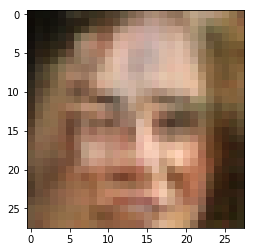

Epoch: 2/2.  Step: 8710.  Discriminator: 1.4507.  Generator: 0.5939.
Epoch: 2/2.  Step: 8720.  Discriminator: 1.4124.  Generator: 0.7521.
Epoch: 2/2.  Step: 8730.  Discriminator: 1.3647.  Generator: 0.8601.
Epoch: 2/2.  Step: 8740.  Discriminator: 1.4209.  Generator: 0.7664.
Epoch: 2/2.  Step: 8750.  Discriminator: 1.3787.  Generator: 0.9025.
Epoch: 2/2.  Step: 8760.  Discriminator: 1.4242.  Generator: 0.9116.
Epoch: 2/2.  Step: 8770.  Discriminator: 1.4182.  Generator: 0.7954.
Epoch: 2/2.  Step: 8780.  Discriminator: 1.4981.  Generator: 0.7803.
Epoch: 2/2.  Step: 8790.  Discriminator: 1.4703.  Generator: 0.8297.
Epoch: 2/2.  Step: 8800.  Discriminator: 1.4055.  Generator: 0.7867.


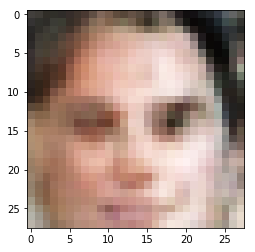

Epoch: 2/2.  Step: 8810.  Discriminator: 1.4484.  Generator: 0.7064.
Epoch: 2/2.  Step: 8820.  Discriminator: 1.4440.  Generator: 0.8355.
Epoch: 2/2.  Step: 8830.  Discriminator: 1.4242.  Generator: 0.6102.
Epoch: 2/2.  Step: 8840.  Discriminator: 1.3995.  Generator: 0.8736.
Epoch: 2/2.  Step: 8850.  Discriminator: 1.4588.  Generator: 0.8185.
Epoch: 2/2.  Step: 8860.  Discriminator: 1.4600.  Generator: 0.7054.
Epoch: 2/2.  Step: 8870.  Discriminator: 1.4257.  Generator: 0.6732.
Epoch: 2/2.  Step: 8880.  Discriminator: 1.4529.  Generator: 0.7500.
Epoch: 2/2.  Step: 8890.  Discriminator: 1.3909.  Generator: 0.7538.
Epoch: 2/2.  Step: 8900.  Discriminator: 1.4549.  Generator: 0.7413.


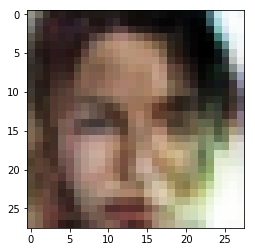

Epoch: 2/2.  Step: 8910.  Discriminator: 1.3966.  Generator: 0.8447.
Epoch: 2/2.  Step: 8920.  Discriminator: 1.4840.  Generator: 0.7884.
Epoch: 2/2.  Step: 8930.  Discriminator: 1.4864.  Generator: 0.8875.
Epoch: 2/2.  Step: 8940.  Discriminator: 1.4463.  Generator: 0.8495.
Epoch: 2/2.  Step: 8950.  Discriminator: 1.3993.  Generator: 0.7049.
Epoch: 2/2.  Step: 8960.  Discriminator: 1.4628.  Generator: 0.9000.
Epoch: 2/2.  Step: 8970.  Discriminator: 1.4679.  Generator: 0.7623.
Epoch: 2/2.  Step: 8980.  Discriminator: 1.4401.  Generator: 1.0116.
Epoch: 2/2.  Step: 8990.  Discriminator: 1.3935.  Generator: 0.6443.
Epoch: 2/2.  Step: 9000.  Discriminator: 1.4078.  Generator: 0.8756.


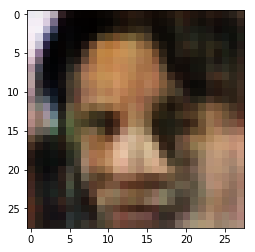

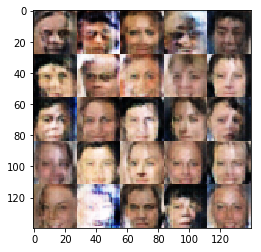

Epoch: 2/2.  Step: 9010.  Discriminator: 1.4385.  Generator: 0.8278.
Epoch: 2/2.  Step: 9020.  Discriminator: 1.4462.  Generator: 0.6200.
Epoch: 2/2.  Step: 9030.  Discriminator: 1.4616.  Generator: 0.7803.
Epoch: 2/2.  Step: 9040.  Discriminator: 1.4415.  Generator: 0.8094.
Epoch: 2/2.  Step: 9050.  Discriminator: 1.4454.  Generator: 0.8338.
Epoch: 2/2.  Step: 9060.  Discriminator: 1.4262.  Generator: 0.7887.
Epoch: 2/2.  Step: 9070.  Discriminator: 1.4061.  Generator: 0.8957.
Epoch: 2/2.  Step: 9080.  Discriminator: 1.3841.  Generator: 0.8286.
Epoch: 2/2.  Step: 9090.  Discriminator: 1.4449.  Generator: 0.7527.
Epoch: 2/2.  Step: 9100.  Discriminator: 1.4665.  Generator: 0.8174.


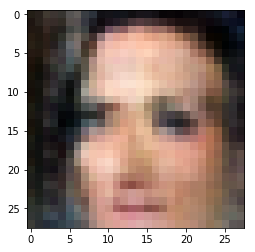

Epoch: 2/2.  Step: 9110.  Discriminator: 1.4050.  Generator: 0.7809.
Epoch: 2/2.  Step: 9120.  Discriminator: 1.5252.  Generator: 0.7624.
Epoch: 2/2.  Step: 9130.  Discriminator: 1.3719.  Generator: 0.6945.
Epoch: 2/2.  Step: 9140.  Discriminator: 1.4449.  Generator: 0.6738.
Epoch: 2/2.  Step: 9150.  Discriminator: 1.4422.  Generator: 0.7493.
Epoch: 2/2.  Step: 9160.  Discriminator: 1.4026.  Generator: 0.7457.
Epoch: 2/2.  Step: 9170.  Discriminator: 1.4400.  Generator: 0.9074.
Epoch: 2/2.  Step: 9180.  Discriminator: 1.4266.  Generator: 0.8863.
Epoch: 2/2.  Step: 9190.  Discriminator: 1.3755.  Generator: 0.7580.
Epoch: 2/2.  Step: 9200.  Discriminator: 1.4392.  Generator: 0.9165.


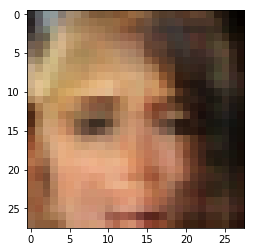

Epoch: 2/2.  Step: 9210.  Discriminator: 1.4675.  Generator: 0.8417.
Epoch: 2/2.  Step: 9220.  Discriminator: 1.3714.  Generator: 0.9188.
Epoch: 2/2.  Step: 9230.  Discriminator: 1.3873.  Generator: 0.7088.
Epoch: 2/2.  Step: 9240.  Discriminator: 1.4297.  Generator: 0.6774.
Epoch: 2/2.  Step: 9250.  Discriminator: 1.4178.  Generator: 0.8465.
Epoch: 2/2.  Step: 9260.  Discriminator: 1.3901.  Generator: 0.7404.
Epoch: 2/2.  Step: 9270.  Discriminator: 1.4864.  Generator: 0.6593.
Epoch: 2/2.  Step: 9280.  Discriminator: 1.4184.  Generator: 0.7602.
Epoch: 2/2.  Step: 9290.  Discriminator: 1.4723.  Generator: 0.6474.
Epoch: 2/2.  Step: 9300.  Discriminator: 1.3604.  Generator: 0.7808.


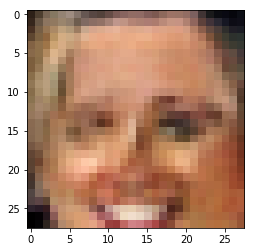

Epoch: 2/2.  Step: 9310.  Discriminator: 1.4316.  Generator: 0.8420.
Epoch: 2/2.  Step: 9320.  Discriminator: 1.3699.  Generator: 0.6846.
Epoch: 2/2.  Step: 9330.  Discriminator: 1.4122.  Generator: 0.7384.
Epoch: 2/2.  Step: 9340.  Discriminator: 1.4296.  Generator: 0.9733.
Epoch: 2/2.  Step: 9350.  Discriminator: 1.3948.  Generator: 0.7844.
Epoch: 2/2.  Step: 9360.  Discriminator: 1.4087.  Generator: 0.8142.
Epoch: 2/2.  Step: 9370.  Discriminator: 1.4296.  Generator: 0.7924.
Epoch: 2/2.  Step: 9380.  Discriminator: 1.3418.  Generator: 0.7594.
Epoch: 2/2.  Step: 9390.  Discriminator: 1.4383.  Generator: 0.8517.
Epoch: 2/2.  Step: 9400.  Discriminator: 1.4344.  Generator: 0.7519.


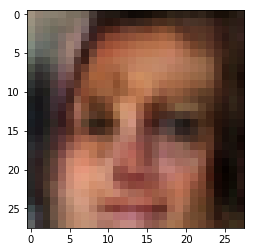

Epoch: 2/2.  Step: 9410.  Discriminator: 1.3960.  Generator: 0.7593.
Epoch: 2/2.  Step: 9420.  Discriminator: 1.3976.  Generator: 0.7672.
Epoch: 2/2.  Step: 9430.  Discriminator: 1.3891.  Generator: 0.6774.
Epoch: 2/2.  Step: 9440.  Discriminator: 1.3900.  Generator: 0.7819.
Epoch: 2/2.  Step: 9450.  Discriminator: 1.3494.  Generator: 0.7655.
Epoch: 2/2.  Step: 9460.  Discriminator: 1.3996.  Generator: 0.7201.
Epoch: 2/2.  Step: 9470.  Discriminator: 1.4065.  Generator: 0.6511.
Epoch: 2/2.  Step: 9480.  Discriminator: 1.3840.  Generator: 0.8390.
Epoch: 2/2.  Step: 9490.  Discriminator: 1.4140.  Generator: 0.8071.
Epoch: 2/2.  Step: 9500.  Discriminator: 1.4942.  Generator: 0.7422.


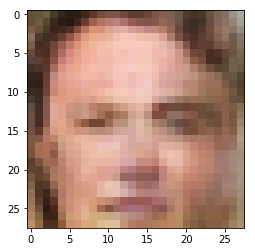

Epoch: 2/2.  Step: 9510.  Discriminator: 1.4043.  Generator: 0.7282.
Epoch: 2/2.  Step: 9520.  Discriminator: 1.4326.  Generator: 0.8403.
Epoch: 2/2.  Step: 9530.  Discriminator: 1.3568.  Generator: 0.8798.
Epoch: 2/2.  Step: 9540.  Discriminator: 1.4583.  Generator: 0.6708.
Epoch: 2/2.  Step: 9550.  Discriminator: 1.4645.  Generator: 0.6478.
Epoch: 2/2.  Step: 9560.  Discriminator: 1.4022.  Generator: 0.7801.
Epoch: 2/2.  Step: 9570.  Discriminator: 1.4294.  Generator: 0.7681.
Epoch: 2/2.  Step: 9580.  Discriminator: 1.4145.  Generator: 0.7349.
Epoch: 2/2.  Step: 9590.  Discriminator: 1.4753.  Generator: 0.8363.
Epoch: 2/2.  Step: 9600.  Discriminator: 1.3673.  Generator: 0.6757.


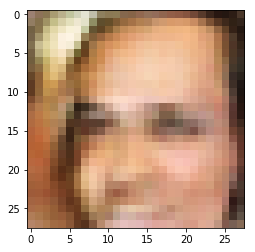

Epoch: 2/2.  Step: 9610.  Discriminator: 1.4508.  Generator: 0.7372.
Epoch: 2/2.  Step: 9620.  Discriminator: 1.4972.  Generator: 0.6208.
Epoch: 2/2.  Step: 9630.  Discriminator: 1.4477.  Generator: 0.7074.
Epoch: 2/2.  Step: 9640.  Discriminator: 1.4546.  Generator: 0.6643.
Epoch: 2/2.  Step: 9650.  Discriminator: 1.4189.  Generator: 0.6776.
Epoch: 2/2.  Step: 9660.  Discriminator: 1.4193.  Generator: 0.8744.
Epoch: 2/2.  Step: 9670.  Discriminator: 1.4222.  Generator: 0.7214.
Epoch: 2/2.  Step: 9680.  Discriminator: 1.4302.  Generator: 0.7212.
Epoch: 2/2.  Step: 9690.  Discriminator: 1.3929.  Generator: 0.7580.
Epoch: 2/2.  Step: 9700.  Discriminator: 1.4322.  Generator: 1.0115.


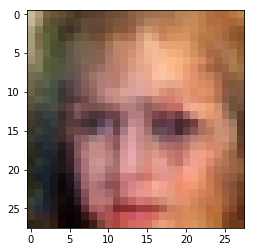

Epoch: 2/2.  Step: 9710.  Discriminator: 1.6036.  Generator: 0.5276.
Epoch: 2/2.  Step: 9720.  Discriminator: 1.3907.  Generator: 0.7235.
Epoch: 2/2.  Step: 9730.  Discriminator: 1.4158.  Generator: 0.8225.
Epoch: 2/2.  Step: 9740.  Discriminator: 1.4313.  Generator: 0.7700.
Epoch: 2/2.  Step: 9750.  Discriminator: 1.4054.  Generator: 0.6654.
Epoch: 2/2.  Step: 9760.  Discriminator: 1.4284.  Generator: 0.8878.
Epoch: 2/2.  Step: 9770.  Discriminator: 1.4546.  Generator: 0.6664.
Epoch: 2/2.  Step: 9780.  Discriminator: 1.4487.  Generator: 0.8577.
Epoch: 2/2.  Step: 9790.  Discriminator: 1.4693.  Generator: 0.6813.
Epoch: 2/2.  Step: 9800.  Discriminator: 1.3699.  Generator: 0.8182.


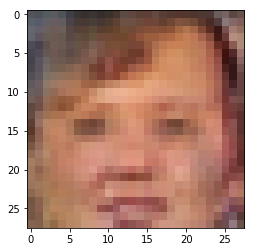

Epoch: 2/2.  Step: 9810.  Discriminator: 1.4153.  Generator: 0.7949.
Epoch: 2/2.  Step: 9820.  Discriminator: 1.3801.  Generator: 0.7166.
Epoch: 2/2.  Step: 9830.  Discriminator: 1.5863.  Generator: 0.5021.
Epoch: 2/2.  Step: 9840.  Discriminator: 1.3979.  Generator: 0.8045.
Epoch: 2/2.  Step: 9850.  Discriminator: 1.3294.  Generator: 0.7774.
Epoch: 2/2.  Step: 9860.  Discriminator: 1.3580.  Generator: 0.7679.
Epoch: 2/2.  Step: 9870.  Discriminator: 1.4442.  Generator: 0.8588.
Epoch: 2/2.  Step: 9880.  Discriminator: 1.4378.  Generator: 0.5759.
Epoch: 2/2.  Step: 9890.  Discriminator: 1.4907.  Generator: 0.8016.
Epoch: 2/2.  Step: 9900.  Discriminator: 1.4724.  Generator: 0.8326.


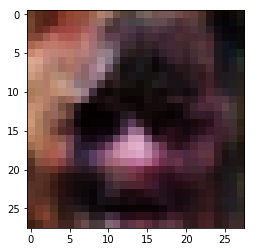

Epoch: 2/2.  Step: 9910.  Discriminator: 1.3798.  Generator: 0.7674.
Epoch: 2/2.  Step: 9920.  Discriminator: 1.4314.  Generator: 0.6991.
Epoch: 2/2.  Step: 9930.  Discriminator: 1.4691.  Generator: 0.6891.
Epoch: 2/2.  Step: 9940.  Discriminator: 1.3960.  Generator: 0.8077.
Epoch: 2/2.  Step: 9950.  Discriminator: 1.4616.  Generator: 0.6777.
Epoch: 2/2.  Step: 9960.  Discriminator: 1.4376.  Generator: 0.6540.
Epoch: 2/2.  Step: 9970.  Discriminator: 1.3843.  Generator: 0.7598.
Epoch: 2/2.  Step: 9980.  Discriminator: 1.3692.  Generator: 0.8539.
Epoch: 2/2.  Step: 9990.  Discriminator: 1.3403.  Generator: 0.7294.
Epoch: 2/2.  Step: 10000.  Discriminator: 1.4218.  Generator: 0.7394.


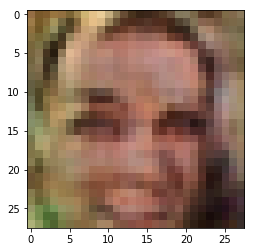

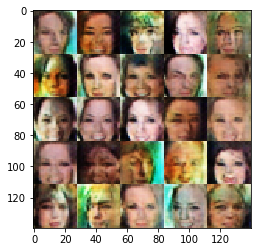

Epoch: 2/2.  Step: 10010.  Discriminator: 1.3955.  Generator: 0.7167.
Epoch: 2/2.  Step: 10020.  Discriminator: 1.4066.  Generator: 0.7952.
Epoch: 2/2.  Step: 10030.  Discriminator: 1.4705.  Generator: 0.7343.
Epoch: 2/2.  Step: 10040.  Discriminator: 1.3967.  Generator: 0.8222.
Epoch: 2/2.  Step: 10050.  Discriminator: 1.4270.  Generator: 0.6741.
Epoch: 2/2.  Step: 10060.  Discriminator: 1.4528.  Generator: 0.7210.
Epoch: 2/2.  Step: 10070.  Discriminator: 1.4120.  Generator: 0.7020.
Epoch: 2/2.  Step: 10080.  Discriminator: 1.4150.  Generator: 0.8169.
Epoch: 2/2.  Step: 10090.  Discriminator: 1.3968.  Generator: 0.8306.
Epoch: 2/2.  Step: 10100.  Discriminator: 1.4347.  Generator: 0.6880.


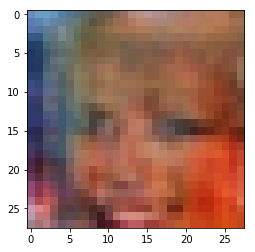

Epoch: 2/2.  Step: 10110.  Discriminator: 1.4401.  Generator: 0.7104.
Epoch: 2/2.  Step: 10120.  Discriminator: 1.3833.  Generator: 0.8880.
Epoch: 2/2.  Step: 10130.  Discriminator: 1.3831.  Generator: 0.6752.
Epoch: 2/2.  Step: 10140.  Discriminator: 1.3665.  Generator: 0.6818.
Epoch: 2/2.  Step: 10150.  Discriminator: 1.3727.  Generator: 0.9533.
Epoch: 2/2.  Step: 10160.  Discriminator: 1.5541.  Generator: 0.6033.
Epoch: 2/2.  Step: 10170.  Discriminator: 1.4596.  Generator: 0.7782.
Epoch: 2/2.  Step: 10180.  Discriminator: 1.3976.  Generator: 0.7761.
Epoch: 2/2.  Step: 10190.  Discriminator: 1.4577.  Generator: 0.7226.
Epoch: 2/2.  Step: 10200.  Discriminator: 1.4234.  Generator: 0.7651.


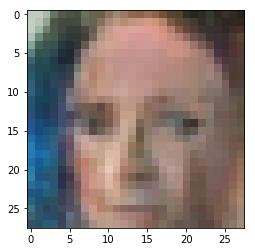

Epoch: 2/2.  Step: 10210.  Discriminator: 1.4018.  Generator: 0.7312.
Epoch: 2/2.  Step: 10220.  Discriminator: 1.3835.  Generator: 0.7524.
Epoch: 2/2.  Step: 10230.  Discriminator: 1.4722.  Generator: 0.8199.
Epoch: 2/2.  Step: 10240.  Discriminator: 1.5746.  Generator: 0.5747.
Epoch: 2/2.  Step: 10250.  Discriminator: 1.4188.  Generator: 0.7562.
Epoch: 2/2.  Step: 10260.  Discriminator: 1.5357.  Generator: 0.5779.
Epoch: 2/2.  Step: 10270.  Discriminator: 1.4424.  Generator: 0.7977.
Epoch: 2/2.  Step: 10280.  Discriminator: 1.3437.  Generator: 0.7346.
Epoch: 2/2.  Step: 10290.  Discriminator: 1.4017.  Generator: 0.7670.
Epoch: 2/2.  Step: 10300.  Discriminator: 1.3816.  Generator: 0.6809.


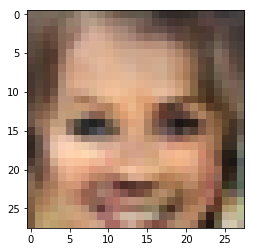

Epoch: 2/2.  Step: 10310.  Discriminator: 1.4797.  Generator: 0.7978.
Epoch: 2/2.  Step: 10320.  Discriminator: 1.4150.  Generator: 0.8203.
Epoch: 2/2.  Step: 10330.  Discriminator: 1.3715.  Generator: 0.6889.
Epoch: 2/2.  Step: 10340.  Discriminator: 1.3991.  Generator: 0.7148.
Epoch: 2/2.  Step: 10350.  Discriminator: 1.4201.  Generator: 0.8526.
Epoch: 2/2.  Step: 10360.  Discriminator: 1.4059.  Generator: 0.6896.
Epoch: 2/2.  Step: 10370.  Discriminator: 1.4344.  Generator: 0.5535.
Epoch: 2/2.  Step: 10380.  Discriminator: 1.3894.  Generator: 0.7696.
Epoch: 2/2.  Step: 10390.  Discriminator: 1.4359.  Generator: 0.7608.
Epoch: 2/2.  Step: 10400.  Discriminator: 1.4211.  Generator: 0.8028.


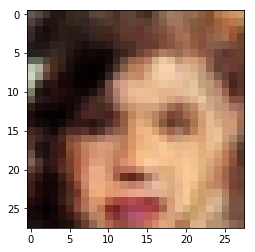

Epoch: 2/2.  Step: 10410.  Discriminator: 1.4739.  Generator: 0.7197.
Epoch: 2/2.  Step: 10420.  Discriminator: 1.4179.  Generator: 0.7629.
Epoch: 2/2.  Step: 10430.  Discriminator: 1.4023.  Generator: 0.7502.
Epoch: 2/2.  Step: 10440.  Discriminator: 1.4281.  Generator: 0.7714.
Epoch: 2/2.  Step: 10450.  Discriminator: 1.3866.  Generator: 0.8159.
Epoch: 2/2.  Step: 10460.  Discriminator: 1.4576.  Generator: 0.7973.
Epoch: 2/2.  Step: 10470.  Discriminator: 1.4464.  Generator: 0.6826.
Epoch: 2/2.  Step: 10480.  Discriminator: 1.4212.  Generator: 0.6573.
Epoch: 2/2.  Step: 10490.  Discriminator: 1.3960.  Generator: 0.8139.
Epoch: 2/2.  Step: 10500.  Discriminator: 1.4417.  Generator: 0.6587.


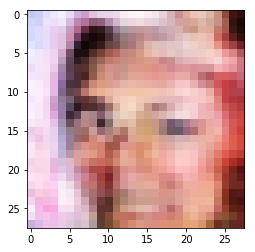

Epoch: 2/2.  Step: 10510.  Discriminator: 1.4172.  Generator: 0.7944.
Epoch: 2/2.  Step: 10520.  Discriminator: 1.4277.  Generator: 0.7597.
Epoch: 2/2.  Step: 10530.  Discriminator: 1.3578.  Generator: 0.7462.
Epoch: 2/2.  Step: 10540.  Discriminator: 1.4807.  Generator: 0.7764.
Epoch: 2/2.  Step: 10550.  Discriminator: 1.4817.  Generator: 0.6248.
Epoch: 2/2.  Step: 10560.  Discriminator: 1.3822.  Generator: 0.7897.
Epoch: 2/2.  Step: 10570.  Discriminator: 1.4296.  Generator: 0.6385.
Epoch: 2/2.  Step: 10580.  Discriminator: 1.4550.  Generator: 0.9788.
Epoch: 2/2.  Step: 10590.  Discriminator: 1.4520.  Generator: 0.7773.
Epoch: 2/2.  Step: 10600.  Discriminator: 1.4995.  Generator: 0.5770.


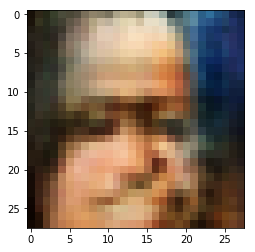

Epoch: 2/2.  Step: 10610.  Discriminator: 1.3504.  Generator: 0.8785.
Epoch: 2/2.  Step: 10620.  Discriminator: 1.4929.  Generator: 0.6696.
Epoch: 2/2.  Step: 10630.  Discriminator: 1.4162.  Generator: 0.7863.
Epoch: 2/2.  Step: 10640.  Discriminator: 1.3964.  Generator: 0.8331.
Epoch: 2/2.  Step: 10650.  Discriminator: 1.3567.  Generator: 0.7401.
Epoch: 2/2.  Step: 10660.  Discriminator: 1.4387.  Generator: 0.6780.
Epoch: 2/2.  Step: 10670.  Discriminator: 1.4022.  Generator: 0.9008.
Epoch: 2/2.  Step: 10680.  Discriminator: 1.4438.  Generator: 0.8516.
Epoch: 2/2.  Step: 10690.  Discriminator: 1.4583.  Generator: 0.6149.
Epoch: 2/2.  Step: 10700.  Discriminator: 1.4847.  Generator: 0.8480.


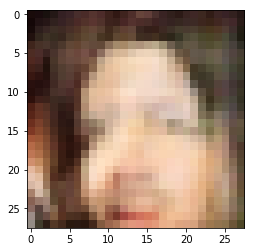

Epoch: 2/2.  Step: 10710.  Discriminator: 1.4182.  Generator: 0.6485.
Epoch: 2/2.  Step: 10720.  Discriminator: 1.4630.  Generator: 0.6303.
Epoch: 2/2.  Step: 10730.  Discriminator: 1.4732.  Generator: 0.7987.
Epoch: 2/2.  Step: 10740.  Discriminator: 1.3822.  Generator: 0.5883.
Epoch: 2/2.  Step: 10750.  Discriminator: 1.5008.  Generator: 0.8247.
Epoch: 2/2.  Step: 10760.  Discriminator: 1.3546.  Generator: 0.6852.
Epoch: 2/2.  Step: 10770.  Discriminator: 1.4768.  Generator: 0.7155.
Epoch: 2/2.  Step: 10780.  Discriminator: 1.3942.  Generator: 0.7240.
Epoch: 2/2.  Step: 10790.  Discriminator: 1.4827.  Generator: 0.6832.
Epoch: 2/2.  Step: 10800.  Discriminator: 1.4547.  Generator: 0.9158.


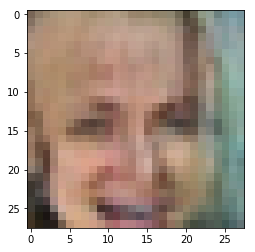

Epoch: 2/2.  Step: 10810.  Discriminator: 1.4357.  Generator: 0.7499.
Epoch: 2/2.  Step: 10820.  Discriminator: 1.3783.  Generator: 0.8770.
Epoch: 2/2.  Step: 10830.  Discriminator: 1.3958.  Generator: 0.7688.
Epoch: 2/2.  Step: 10840.  Discriminator: 1.5102.  Generator: 0.6041.
Epoch: 2/2.  Step: 10850.  Discriminator: 1.3946.  Generator: 0.7924.
Epoch: 2/2.  Step: 10860.  Discriminator: 1.4841.  Generator: 0.6895.
Epoch: 2/2.  Step: 10870.  Discriminator: 1.4858.  Generator: 0.7803.
Epoch: 2/2.  Step: 10880.  Discriminator: 1.4223.  Generator: 0.8948.
Epoch: 2/2.  Step: 10890.  Discriminator: 1.4042.  Generator: 0.6323.
Epoch: 2/2.  Step: 10900.  Discriminator: 1.3678.  Generator: 0.8063.


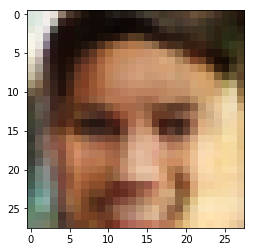

Epoch: 2/2.  Step: 10910.  Discriminator: 1.5103.  Generator: 0.6250.
Epoch: 2/2.  Step: 10920.  Discriminator: 1.4604.  Generator: 0.7011.
Epoch: 2/2.  Step: 10930.  Discriminator: 1.4296.  Generator: 0.8368.
Epoch: 2/2.  Step: 10940.  Discriminator: 1.3845.  Generator: 0.7512.
Epoch: 2/2.  Step: 10950.  Discriminator: 1.4720.  Generator: 0.7917.
Epoch: 2/2.  Step: 10960.  Discriminator: 1.4205.  Generator: 0.6749.
Epoch: 2/2.  Step: 10970.  Discriminator: 1.3930.  Generator: 0.8011.
Epoch: 2/2.  Step: 10980.  Discriminator: 1.4628.  Generator: 0.6705.
Epoch: 2/2.  Step: 10990.  Discriminator: 1.5008.  Generator: 0.6775.
Epoch: 2/2.  Step: 11000.  Discriminator: 1.4568.  Generator: 0.6232.


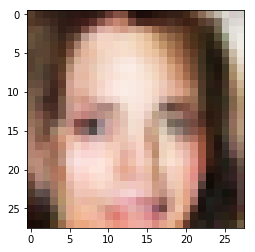

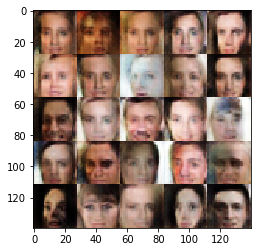

Epoch: 2/2.  Step: 11010.  Discriminator: 1.4206.  Generator: 0.7431.
Epoch: 2/2.  Step: 11020.  Discriminator: 1.3731.  Generator: 0.8605.
Epoch: 2/2.  Step: 11030.  Discriminator: 1.4729.  Generator: 0.6343.
Epoch: 2/2.  Step: 11040.  Discriminator: 1.4029.  Generator: 0.6565.
Epoch: 2/2.  Step: 11050.  Discriminator: 1.4654.  Generator: 0.8432.
Epoch: 2/2.  Step: 11060.  Discriminator: 1.4450.  Generator: 0.8982.
Epoch: 2/2.  Step: 11070.  Discriminator: 1.4929.  Generator: 0.7252.
Epoch: 2/2.  Step: 11080.  Discriminator: 1.3827.  Generator: 0.8177.
Epoch: 2/2.  Step: 11090.  Discriminator: 1.5019.  Generator: 0.7226.
Epoch: 2/2.  Step: 11100.  Discriminator: 1.3899.  Generator: 0.7057.


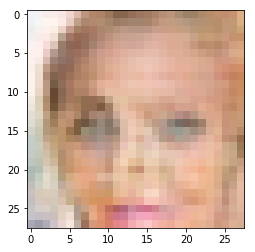

Epoch: 2/2.  Step: 11110.  Discriminator: 1.4951.  Generator: 0.7773.
Epoch: 2/2.  Step: 11120.  Discriminator: 1.3716.  Generator: 0.6945.
Epoch: 2/2.  Step: 11130.  Discriminator: 1.4540.  Generator: 0.8134.
Epoch: 2/2.  Step: 11140.  Discriminator: 1.5039.  Generator: 0.5702.
Epoch: 2/2.  Step: 11150.  Discriminator: 1.4464.  Generator: 0.6235.
Epoch: 2/2.  Step: 11160.  Discriminator: 1.4620.  Generator: 0.8401.
Epoch: 2/2.  Step: 11170.  Discriminator: 1.3794.  Generator: 0.7804.
Epoch: 2/2.  Step: 11180.  Discriminator: 1.4267.  Generator: 0.8375.
Epoch: 2/2.  Step: 11190.  Discriminator: 1.3909.  Generator: 0.8110.
Epoch: 2/2.  Step: 11200.  Discriminator: 1.4427.  Generator: 0.6481.


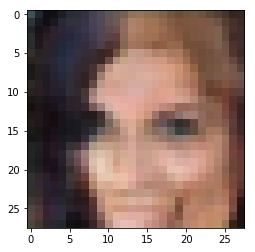

Epoch: 2/2.  Step: 11210.  Discriminator: 1.4665.  Generator: 0.8017.
Epoch: 2/2.  Step: 11220.  Discriminator: 1.5036.  Generator: 0.5392.
Epoch: 2/2.  Step: 11230.  Discriminator: 1.4144.  Generator: 0.6571.
Epoch: 2/2.  Step: 11240.  Discriminator: 1.4204.  Generator: 0.8134.
Epoch: 2/2.  Step: 11250.  Discriminator: 1.4997.  Generator: 0.6531.
Epoch: 2/2.  Step: 11260.  Discriminator: 1.3876.  Generator: 0.7132.
Epoch: 2/2.  Step: 11270.  Discriminator: 1.4471.  Generator: 0.8722.
Epoch: 2/2.  Step: 11280.  Discriminator: 1.4758.  Generator: 0.5464.
Epoch: 2/2.  Step: 11290.  Discriminator: 1.3908.  Generator: 0.6326.
Epoch: 2/2.  Step: 11300.  Discriminator: 1.3819.  Generator: 0.6962.


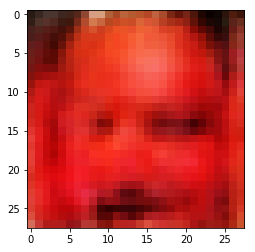

Epoch: 2/2.  Step: 11310.  Discriminator: 1.3872.  Generator: 0.7376.
Epoch: 2/2.  Step: 11320.  Discriminator: 1.5028.  Generator: 0.6085.
Epoch: 2/2.  Step: 11330.  Discriminator: 1.4389.  Generator: 0.7278.
Epoch: 2/2.  Step: 11340.  Discriminator: 1.4462.  Generator: 0.7912.
Epoch: 2/2.  Step: 11350.  Discriminator: 1.3451.  Generator: 0.7498.
Epoch: 2/2.  Step: 11360.  Discriminator: 1.5473.  Generator: 0.6424.
Epoch: 2/2.  Step: 11370.  Discriminator: 1.4457.  Generator: 0.7381.
Epoch: 2/2.  Step: 11380.  Discriminator: 1.3740.  Generator: 0.6874.
Epoch: 2/2.  Step: 11390.  Discriminator: 1.4608.  Generator: 0.9430.
Epoch: 2/2.  Step: 11400.  Discriminator: 1.4210.  Generator: 0.9059.


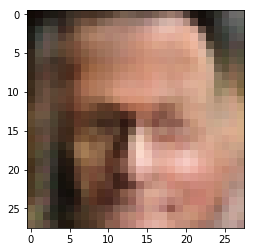

Epoch: 2/2.  Step: 11410.  Discriminator: 1.3602.  Generator: 0.7802.
Epoch: 2/2.  Step: 11420.  Discriminator: 1.3462.  Generator: 0.7545.
Epoch: 2/2.  Step: 11430.  Discriminator: 1.4000.  Generator: 0.6455.
Epoch: 2/2.  Step: 11440.  Discriminator: 1.4124.  Generator: 0.7807.
Epoch: 2/2.  Step: 11450.  Discriminator: 1.4085.  Generator: 0.6468.
Epoch: 2/2.  Step: 11460.  Discriminator: 1.4023.  Generator: 0.6928.
Epoch: 2/2.  Step: 11470.  Discriminator: 1.4987.  Generator: 0.6986.
Epoch: 2/2.  Step: 11480.  Discriminator: 1.3678.  Generator: 0.8374.
Epoch: 2/2.  Step: 11490.  Discriminator: 1.3603.  Generator: 0.7804.
Epoch: 2/2.  Step: 11500.  Discriminator: 1.4347.  Generator: 0.6882.


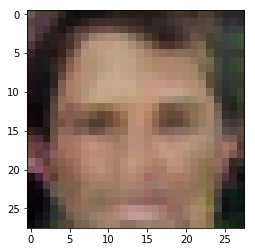

Epoch: 2/2.  Step: 11510.  Discriminator: 1.4430.  Generator: 0.7660.
Epoch: 2/2.  Step: 11520.  Discriminator: 1.4687.  Generator: 0.6593.
Epoch: 2/2.  Step: 11530.  Discriminator: 1.3769.  Generator: 0.6348.
Epoch: 2/2.  Step: 11540.  Discriminator: 1.5038.  Generator: 0.7477.
Epoch: 2/2.  Step: 11550.  Discriminator: 1.4465.  Generator: 0.8380.
Epoch: 2/2.  Step: 11560.  Discriminator: 1.4263.  Generator: 0.7426.
Epoch: 2/2.  Step: 11570.  Discriminator: 1.4354.  Generator: 0.6322.
Epoch: 2/2.  Step: 11580.  Discriminator: 1.4616.  Generator: 0.7317.
Epoch: 2/2.  Step: 11590.  Discriminator: 1.4376.  Generator: 0.7199.
Epoch: 2/2.  Step: 11600.  Discriminator: 1.4354.  Generator: 0.6806.


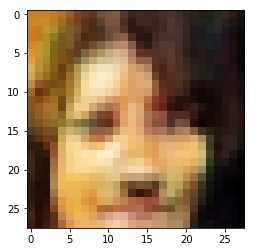

Epoch: 2/2.  Step: 11610.  Discriminator: 1.5332.  Generator: 0.5962.
Epoch: 2/2.  Step: 11620.  Discriminator: 1.4240.  Generator: 0.7391.
Epoch: 2/2.  Step: 11630.  Discriminator: 1.4624.  Generator: 0.6982.
Epoch: 2/2.  Step: 11640.  Discriminator: 1.4560.  Generator: 0.7282.
Epoch: 2/2.  Step: 11650.  Discriminator: 1.4278.  Generator: 0.8311.
Epoch: 2/2.  Step: 11660.  Discriminator: 1.3829.  Generator: 0.6883.
Epoch: 2/2.  Step: 11670.  Discriminator: 1.4540.  Generator: 0.7430.
Epoch: 2/2.  Step: 11680.  Discriminator: 1.3528.  Generator: 0.7849.
Epoch: 2/2.  Step: 11690.  Discriminator: 1.3933.  Generator: 0.7556.
Epoch: 2/2.  Step: 11700.  Discriminator: 1.3642.  Generator: 0.7380.


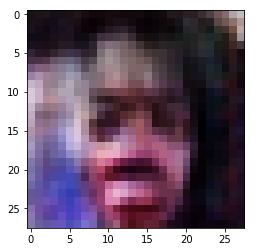

Epoch: 2/2.  Step: 11710.  Discriminator: 1.4377.  Generator: 0.7543.
Epoch: 2/2.  Step: 11720.  Discriminator: 1.4159.  Generator: 0.7330.
Epoch: 2/2.  Step: 11730.  Discriminator: 1.4653.  Generator: 0.7538.
Epoch: 2/2.  Step: 11740.  Discriminator: 1.4194.  Generator: 0.7812.
Epoch: 2/2.  Step: 11750.  Discriminator: 1.3658.  Generator: 0.7415.
Epoch: 2/2.  Step: 11760.  Discriminator: 1.4437.  Generator: 0.7874.
Epoch: 2/2.  Step: 11770.  Discriminator: 1.4172.  Generator: 0.7529.
Epoch: 2/2.  Step: 11780.  Discriminator: 1.4336.  Generator: 0.7693.
Epoch: 2/2.  Step: 11790.  Discriminator: 1.3975.  Generator: 0.7536.
Epoch: 2/2.  Step: 11800.  Discriminator: 1.3668.  Generator: 0.6782.


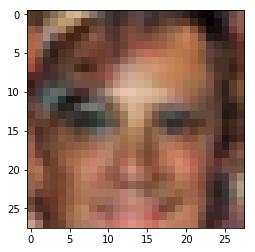

Epoch: 2/2.  Step: 11810.  Discriminator: 1.4012.  Generator: 0.8073.
Epoch: 2/2.  Step: 11820.  Discriminator: 1.4118.  Generator: 0.7663.
Epoch: 2/2.  Step: 11830.  Discriminator: 1.4164.  Generator: 0.7389.
Epoch: 2/2.  Step: 11840.  Discriminator: 1.4488.  Generator: 0.7340.
Epoch: 2/2.  Step: 11850.  Discriminator: 1.4680.  Generator: 0.6745.
Epoch: 2/2.  Step: 11860.  Discriminator: 1.4184.  Generator: 0.8372.
Epoch: 2/2.  Step: 11870.  Discriminator: 1.4222.  Generator: 0.8641.
Epoch: 2/2.  Step: 11880.  Discriminator: 1.5150.  Generator: 0.7474.
Epoch: 2/2.  Step: 11890.  Discriminator: 1.4212.  Generator: 0.7430.
Epoch: 2/2.  Step: 11900.  Discriminator: 1.3886.  Generator: 0.6567.


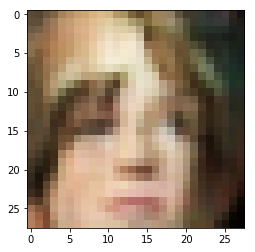

Epoch: 2/2.  Step: 11910.  Discriminator: 1.4819.  Generator: 0.7380.
Epoch: 2/2.  Step: 11920.  Discriminator: 1.4383.  Generator: 0.6742.
Epoch: 2/2.  Step: 11930.  Discriminator: 1.3969.  Generator: 0.8528.
Epoch: 2/2.  Step: 11940.  Discriminator: 1.5175.  Generator: 0.8107.
Epoch: 2/2.  Step: 11950.  Discriminator: 1.3939.  Generator: 0.7160.
Epoch: 2/2.  Step: 11960.  Discriminator: 1.4301.  Generator: 0.7394.
Epoch: 2/2.  Step: 11970.  Discriminator: 1.4119.  Generator: 0.8601.
Epoch: 2/2.  Step: 11980.  Discriminator: 1.4231.  Generator: 0.8084.
Epoch: 2/2.  Step: 11990.  Discriminator: 1.3977.  Generator: 0.8187.
Epoch: 2/2.  Step: 12000.  Discriminator: 1.4233.  Generator: 0.8174.


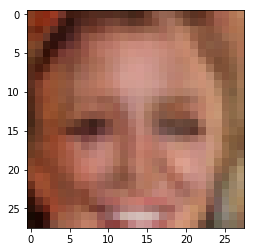

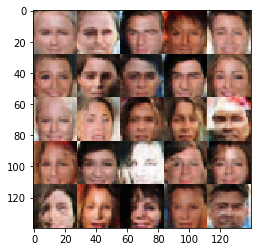

Epoch: 2/2.  Step: 12010.  Discriminator: 1.5198.  Generator: 0.6564.
Epoch: 2/2.  Step: 12020.  Discriminator: 1.3848.  Generator: 0.8678.
Epoch: 2/2.  Step: 12030.  Discriminator: 1.4275.  Generator: 0.7880.
Epoch: 2/2.  Step: 12040.  Discriminator: 1.4419.  Generator: 0.6302.
Epoch: 2/2.  Step: 12050.  Discriminator: 1.4482.  Generator: 0.7735.
Epoch: 2/2.  Step: 12060.  Discriminator: 1.4245.  Generator: 0.8363.
Epoch: 2/2.  Step: 12070.  Discriminator: 1.4290.  Generator: 0.7190.
Epoch: 2/2.  Step: 12080.  Discriminator: 1.3912.  Generator: 0.7139.
Epoch: 2/2.  Step: 12090.  Discriminator: 1.4134.  Generator: 0.8360.
Epoch: 2/2.  Step: 12100.  Discriminator: 1.3999.  Generator: 0.8961.


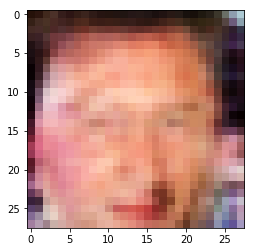

Epoch: 2/2.  Step: 12110.  Discriminator: 1.4183.  Generator: 0.8998.
Epoch: 2/2.  Step: 12120.  Discriminator: 1.4462.  Generator: 0.6691.
Epoch: 2/2.  Step: 12130.  Discriminator: 1.4689.  Generator: 0.7948.
Epoch: 2/2.  Step: 12140.  Discriminator: 1.4005.  Generator: 0.7038.
Epoch: 2/2.  Step: 12150.  Discriminator: 1.3951.  Generator: 0.7500.
Epoch: 2/2.  Step: 12160.  Discriminator: 1.4248.  Generator: 0.6731.
Epoch: 2/2.  Step: 12170.  Discriminator: 1.4786.  Generator: 0.7082.
Epoch: 2/2.  Step: 12180.  Discriminator: 1.3530.  Generator: 0.7898.
Epoch: 2/2.  Step: 12190.  Discriminator: 1.4039.  Generator: 0.8391.
Epoch: 2/2.  Step: 12200.  Discriminator: 1.4430.  Generator: 0.6819.


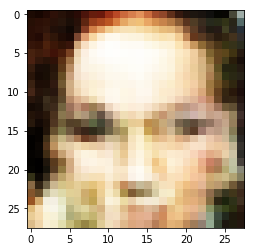

Epoch: 2/2.  Step: 12210.  Discriminator: 1.4621.  Generator: 0.6677.
Epoch: 2/2.  Step: 12220.  Discriminator: 1.4141.  Generator: 0.8006.
Epoch: 2/2.  Step: 12230.  Discriminator: 1.4280.  Generator: 0.7705.
Epoch: 2/2.  Step: 12240.  Discriminator: 1.3775.  Generator: 0.8062.
Epoch: 2/2.  Step: 12250.  Discriminator: 1.3980.  Generator: 0.6861.
Epoch: 2/2.  Step: 12260.  Discriminator: 1.4634.  Generator: 0.6150.
Epoch: 2/2.  Step: 12270.  Discriminator: 1.4074.  Generator: 0.7852.
Epoch: 2/2.  Step: 12280.  Discriminator: 1.4537.  Generator: 0.8097.
Epoch: 2/2.  Step: 12290.  Discriminator: 1.4230.  Generator: 0.7847.
Epoch: 2/2.  Step: 12300.  Discriminator: 1.4565.  Generator: 0.7502.


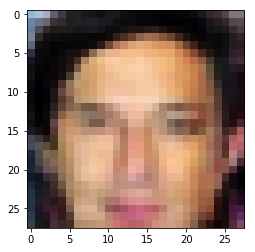

Epoch: 2/2.  Step: 12310.  Discriminator: 1.3930.  Generator: 0.7699.
Epoch: 2/2.  Step: 12320.  Discriminator: 1.4199.  Generator: 0.7568.
Epoch: 2/2.  Step: 12330.  Discriminator: 1.3980.  Generator: 0.8042.
Epoch: 2/2.  Step: 12340.  Discriminator: 1.4616.  Generator: 0.7133.
Epoch: 2/2.  Step: 12350.  Discriminator: 1.4716.  Generator: 0.7055.
Epoch: 2/2.  Step: 12360.  Discriminator: 1.5829.  Generator: 0.5767.
Epoch: 2/2.  Step: 12370.  Discriminator: 1.3840.  Generator: 0.7806.
Epoch: 2/2.  Step: 12380.  Discriminator: 1.4186.  Generator: 0.8264.
Epoch: 2/2.  Step: 12390.  Discriminator: 1.4147.  Generator: 0.6347.
Epoch: 2/2.  Step: 12400.  Discriminator: 1.4544.  Generator: 0.7742.


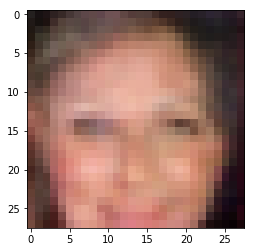

Epoch: 2/2.  Step: 12410.  Discriminator: 1.4205.  Generator: 0.7161.
Epoch: 2/2.  Step: 12420.  Discriminator: 1.4584.  Generator: 0.6832.
Epoch: 2/2.  Step: 12430.  Discriminator: 1.4614.  Generator: 0.6142.
Epoch: 2/2.  Step: 12440.  Discriminator: 1.4620.  Generator: 0.7549.
Epoch: 2/2.  Step: 12450.  Discriminator: 1.4617.  Generator: 0.7698.
Epoch: 2/2.  Step: 12460.  Discriminator: 1.5089.  Generator: 0.7570.
Epoch: 2/2.  Step: 12470.  Discriminator: 1.4346.  Generator: 0.8836.
Epoch: 2/2.  Step: 12480.  Discriminator: 1.4424.  Generator: 0.6628.
Epoch: 2/2.  Step: 12490.  Discriminator: 1.4068.  Generator: 0.8065.
Epoch: 2/2.  Step: 12500.  Discriminator: 1.4933.  Generator: 0.6422.


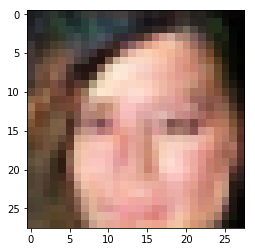

Epoch: 2/2.  Step: 12510.  Discriminator: 1.4391.  Generator: 0.6718.
Epoch: 2/2.  Step: 12520.  Discriminator: 1.4972.  Generator: 0.9201.
Epoch: 2/2.  Step: 12530.  Discriminator: 1.4602.  Generator: 0.8012.
Epoch: 2/2.  Step: 12540.  Discriminator: 1.4176.  Generator: 0.7674.
Epoch: 2/2.  Step: 12550.  Discriminator: 1.4388.  Generator: 0.7424.
Epoch: 2/2.  Step: 12560.  Discriminator: 1.4060.  Generator: 0.8769.
Epoch: 2/2.  Step: 12570.  Discriminator: 1.3899.  Generator: 0.7010.
Epoch: 2/2.  Step: 12580.  Discriminator: 1.4309.  Generator: 0.7393.
Epoch: 2/2.  Step: 12590.  Discriminator: 1.3895.  Generator: 0.8215.
Epoch: 2/2.  Step: 12600.  Discriminator: 1.4216.  Generator: 0.7548.


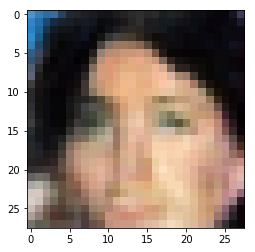

Epoch: 2/2.  Step: 12610.  Discriminator: 1.5132.  Generator: 0.8546.
Epoch: 2/2.  Step: 12620.  Discriminator: 1.4263.  Generator: 0.7401.
Epoch: 2/2.  Step: 12630.  Discriminator: 1.4718.  Generator: 0.6742.
Epoch: 2/2.  Step: 12640.  Discriminator: 1.4414.  Generator: 0.7635.
Epoch: 2/2.  Step: 12650.  Discriminator: 1.3586.  Generator: 0.6674.
Epoch: 2/2.  Step: 12660.  Discriminator: 1.4528.  Generator: 0.6745.


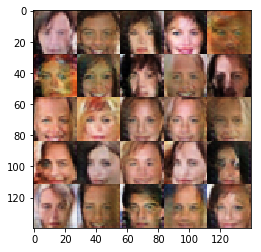

In [17]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

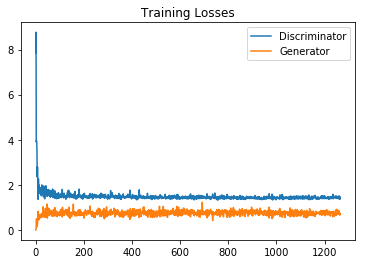

In [18]:
plot_losses()
#show_samples()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.